# Artificial neural networks
Many concepts and text taken from:
- Information Theory, Inference, and Learning Algorithms, by David J.C. MacKay
- Introduction to the theory of neural computation, by J. hertz, A. Krogh, and R. G. Palmer

Even as machines known as “deep neural networks” have learned to converse, drive cars, beat video games and Go champions, dream, paint pictures and help make scientific discoveries, they have also confounded their human creators, who never expected so-called “deep-learning” algorithms to work so well. No underlying principle has guided the design of these learning systems, other than vague inspiration drawn from the architecture of the brain (and no one really understands how that operates either). Therefore, guided by intuition, and powered by supercomputers, we see astounding progress in areas such as voice and image recognition, but at the core of it, we do not understand how these "black boxes" do what they do.

Our adult brains, which boast several hundred trillion connections between 86 billion neurons, in all likelihood employ a bag of tricks to enhance generalization, going beyond the basic image and sound-recognition learning procedures that occur during infancy and that may in many ways resemble deep learning.
However, children don’t need to see thousands of examples of a character and compress their mental representation over an extended period of time before they’re able to recognize other instances of that letter and write it themselves,  sometimes, a single letter suffices!



Three motivations underlie work in this broad and interdisciplinary field:

**Biology**. The task of understanding how the brain works is one of the out- standing unsolved problems in science. Some neural network models are intended to shed light on the way in which computation and memory are performed by brains.

**Engineering**. Many researchers would like to create machines that can ‘learn’, perform ‘pattern recognition’ or ‘discover patterns in data’.

**Complex systems**. A third motivation for being interested in neural networks is that they are complex adaptive systems whose properties are interesting in their own right.

Each time we describe a neural network algorithm we will typically specify three things: 

**Architecture**. The architecture specifies what variables are involved in the network and their topological relationships – for example, the variables involved in a neural net might be the weights of the connections between the neurons, along with the activities of the neurons.

**Activity rule**. Most neural network models have short time-scale dynamics: local rules define how the activities of the neurons change in response to each other. Typically the activity rule depends on the weights (the parameters) in the network.

**Learning rule**. The learning rule specifies the way in which the neural network’s weights change with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of target values supplied by a teacher and on the current value of the weights.

Neural network algorithms can be roughly divided into two classes:

**Supervised neural networks** are given data in the form of inputs and targets, the targets being a teacher’s specification of what the neural network’s response to the input should be.

**Unsupervised neural networks** are given data in an undivided form (simply a set of examples $\{x\}$). Some learning algorithms are intended simply to memorize these data in such a way that the examples can be recalled in the future. Other algorithms are intended to ‘generalize’, to discover ‘patterns’ in the data, or extract the underlying ‘features’ from them.
Some unsupervised algorithms are able to make predictions – for example, some algorithms can ‘fill in’ missing variables in an example x – and so can also be viewed as supervised networks.

## A single neuron

While the behavior of a large network of neurons is complex and intricate, we can easily understand the basic guiding principles by looking at a single neuron. Same as most complex systems, the behavior of the whole cannot be easily understood by knowing how a single component of the network operates. However, this will give us very valuable information and guide our intuition.

We will study a single neuron for two reasons. First, many neural network models are built out of single neurons, so it is good to understand them in detail. And second, a single neuron is itself capable of ‘learning’ – indeed, various standard statistical methods can be viewed in terms of single neurons – so this model will serve as a first example of a supervised neural network.

### Definition of a single neuron

**Architecture**. A single neuron has a number $I$ of inputs $x_i$ and one output which we will here call $y$. (See figure below) Associated with each input is a weight $w_i (i = 1,\cdots, I)$. There may be an additional parameter $w_0$ of the neuron called a bias which we may view as being the weight associated with an input $x_0$ which is permanently set to $1$. The single neuron is a feedforward device – the connections are directed from the inputs to the output of the neuron.

**Activity rule**. The activity rule has two steps.

1. First, in response to the imposed inputs x, we compute the activation of the neuron, $$ a =   \sum_i w_ix_i, $$ where the sum is over $i = 0,\cdots,I$ if there is a bias and $i = 1,\cdots,I$ otherwise.

2. Second, the output $y$ is set as a function $f(a)$ of the activation. The output is also called the activity of the neuron, not to be confused with the activation $a$. There are several possible activation functions; here are the most popular (We only list deterministic activation functions):
    
    (i) Linear: $$y(a) = a.$$ As we shall see, this is just a linear least squares fit!
    
    (ii) Sigmoid (logistic function): $$ y(a) = \frac{1}{1+e^{-a}} $$
    
    (iii) Sigmoid: $$ y(a) = \tanh(a) $$
    
    (iv) Threshold (step) function: $$ y(a) = \Theta(a) $$
    
<img src="figures/neuron.png" style="width: 250px;"/>
#### Single neuron with weights $w$ and bias $w_0$


### Basic neural network concepts

A neural network implements a function $y(\bf{x; w})$; the ‘output’ of the network, $y$, is a nonlinear function of the ‘inputs’ $x$; this function is parameterized by ‘weights’ $\bf{w}$.
We will study a single neuron which produces an output between 0 and 1 as the following function of $\bf{x}$:

$$ \frac{1}{1+e^{-\bf{w}\cdot\bf{x}}} $$

### Input space and weight space

For convenience let us study the case where the input vector x and the parameter vector w are both two-dimensional: ${\bf x} = ({x}_1, {x}_2), {\bf w} = ({w}_1, {w}_2)$. Then we can spell out the function performed by the neuron thus:
$$ \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2)}} $$

We now introduce the idea of weight space, that is, the parameter space of the network. In this case, there are two parameters $w_1$ and $w_2$, so the weight space is two dimensional. Thus each point in $w$ space corresponds to a function of $x$.

Now, the central idea of supervised neural networks is this: Given examples of a relationship between an input vector $\bf{x}$, and a target $t$, we hope to make the neural network ‘learn’ a model of the relationship between $\bf{x}$ and $t$. A successfully trained network will, for any given $\bf{x}$, give an output $y$ that is close (in some sense) to the target value $t$. Training the network involves searching in the weight space of the network for a value of $\bf{w}$ that produces a function that fits the provided training data well.

Typically an objective function or error function is defined, as a function of $\bf{w}$, to measure how well the network with weights set to $\bf{w}$ solves the task. The objective function is a sum of terms, one for each input/target pair ${\bf{x}, t}$, measuring how close the output $y(\bf{x; w})$ is to the target $t$. The training process is an exercise in function minimization – i.e., adjusting $\bf{w}$ in such a way as to find a $\bf{w}$ that minimizes the objective function. Many function-minimization algorithms make use not only of the objective function, but also its gradient with respect to the parameters $\bf{w}$. For general feedforward neural networks the backpropagation algorithm efficiently evaluates the gradient of the output $y$ with respect to the parameters $\bf{w}$, and thence the gradient of the objective function with respect to $\bf{w}$.

<img src="figures/weight_space.png" style="width: 600px;"/>
#### Output of a neuron in weight space


### Linear separability

Notice that the activation function defined a hyperplane that passes through the origin. The neuron is basically
dividing space into two regions, one in which the answer is 1 and one in which the answer is 0.
It is possible to shift this plane away from the origin by adding a constant $w_0$ which is called "bias" or "threshold".
What if there is not such a hyperplane separating ones and zeroes? Then the problem has no answer! This condition is referred-to as "linear separability".

Let us restate the solution with bias as:
$$ \sum_i w_i x_i + w_0 = 0,$$
or
$$ {\bf w}\cdot{\bf x} = -w_0. $$
This corresponds to a plane in $(N-1)$-dimensional space separated by a distance $w_0$ from the origin. 

#### Examples:
- Boolean AND function is linearly separable
- Boolean XOR is not linearly separable



### Training the single neuron as a binary classifier

We assume we have a data set of inputs $\{{\bf x}^{(n)}\}^N_{n=1}$ with binary labels $\{t^{(n)}\}^N_{n=1}$, and a neuron whose output $y(\bf{x; w})$ is bounded between 0 and 1. We can then write down the following error function:

<!-- 
$$E({\bf w}) = -\sum_{n=1}^N t^{(n)} \ln{y({\bf x}^{(n)}; {\bf w})} + (1 − t^{(n)}) \ln{(1 − y({\bf x}^{(n)}; {\bf w})}) $$
-->

$$ E({\bf w}) = \sum_{n=1}^N (y({\bf x}^{(n)};{\bf w}) - t^{(n)})^2$$

Each term in this objective function may be recognized as the error of one outcome and, as expected, is positive definite. The objective function is bounded below by zero and only attains this value if $y({\bf x}^{(n)}; {\bf w}) = t^{(n)}$ for all $n$.
We now differentiate this objective function with respect to $\bf{w}$:

<!-- $$ e_j^{(n)} = \frac{\partial E}{\partial w_j} = −\sum_{n=1}^N (t^{(n)} − y^{(n)})x^{(n)}$$
-->

$$ g_j^{(n)} = \frac{\partial E}{\partial w_j} = 2\sum_{n=1}^N (t^{(n)} − y^{(n)})\frac{\partial y}{\partial w_j}({\bf x}^{(n)}; {\bf w}) x_j^{(n)} $$

Notice that the quantity $e^{(n)} ≡ t^{(n)} − y^{(n)}$ is the error on example $n$ - the difference between the target and the output.

**Learning rule (gradient descent)**. The teacher supplies a real target value $t$ between $(0,1)$ which says what the correct answer is for the given input. We compute the error signal with the correction due to the derivative:
$$e=(t−y)dy/dw$$
then adjust the weights w in a direction that would reduce the magnitude
of this error:
$$\Delta w_i = \eta e x_i,$$ 
where $\eta$ is the ‘learning rate’. This corresponds to sliding downhill on the surface defined by $E$ in $w$-space. We can approximate the bottom of the $E$-curve with arbitrary accuracy, unless we get trapped in a local minimum (more about gradient descent later). Commonly $\eta$ is set by trial and error to a constant value or to a decreasing function of simulation time. 

Let's suppose we want to fit a straight line $y=w_{1}+w_{2}x$ to a training set of two-dimensional points $ (x_{1},y_{1}),\ldots ,(x_{n},y_{n})$ using least squares. The objective function to be minimized is:

$$
\begin{aligned}
E(w)=\sum _{i=1}^{n}E_{i}(w)=\sum _{i=1}^{n}\left(w_{1}+w_{2}x_{i}-y_{i}\right)^{2}.
\end{aligned}
$$

The last line in the above pseudocode for this specific problem will become:

$$
\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}:={\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}}-\eta {\begin{bmatrix}2(w_{1}+w_{2}x_{i}-y_{i})\\2x_{i}(w_{1}+w_{2}x_{i}-y_{i})\end{bmatrix}}.
$$


The following code trains a single network with the activation function:
$$ \frac{1}{1+e^{-(w_1 x_1 + w_2 x_2 + w_0)}} $$

Note that when the input $v$ for the function `sigmoid` is a vector or Numpy array, Numpy automatically applies the function sigmoid elementwise, that is, in vectorized form. This is called "vectorizing" the function.

In [1]:
import numpy as np

def sigmoid(v):
    return 1./(1.+np.exp(-v))

def sigmoid_prime(v):
    return sigmoid(v)*(1.-sigmoid(v))

N=10   # Number of targets
I=2    # dimension of the weight space
x = np.zeros(shape=(N,I)) # Matrix containing all the input vectors
t = np.zeros(N)           # array containing the target values
w = np.zeros(I)           # array containing the weights

### We enter the values by hand here
### We fix x[0] = 1 for the bias w[0]
x = np.array([[1,2,3],[1,3,2],[1,5,3],[1,3,5],[1,5.5,4],[1,7,4],[1,5,6],[1,8,6],[1,9,7],[1,9.5,5]])
t = np.array([0,0,0,0,0,1,1,1,1,1])
w = np.array([1.,1.,1.])

niter = 8000
ni = np.zeros(niter)
err = np.zeros(niter)
w1 = np.zeros(niter)
w2 = np.zeros(niter)


eta = 0.01                # learning rate
alpha = 0.0               # weight decay rate
for i in range(niter):
    a = np.dot(x,w)       # a is a 1-d array
    y = sigmoid(a)        # y is an array with all the sigmoid values
    yp = sigmoid_prime(a) # yp is an array with all the derivative values
    e = (t - y)*yp        # compute error
    g = -np.dot(np.transpose(x),e)
    w = w - eta*(g + alpha * w)
    ni[i] = i
    err[i] = abs(np.sum(e))
    w1[i] = w[1]
    w2[i] = w[2]

    
print (sigmoid(w[0]+w[1]*x[1,1]+w[2]*x[1,2]))
print (sigmoid(w[0]+w[1]*x[8,1]+w[2]*x[8,2]))

print (w)

0.0486552777062
0.976778286805
[-6.03005545  0.62004     0.59840962]


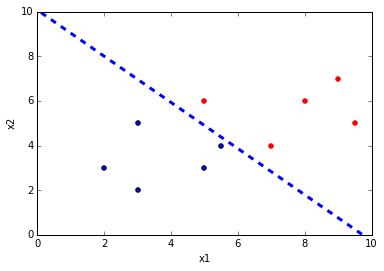

In [2]:
%matplotlib inline
from matplotlib import pyplot

def plane(w,x):
    return (-w[0]-x*w[1])/w[2]

x0 = np.array([-10,10])
y0 = np.array(plane(w,x0))

pyplot.plot(x0,y0,linestyle='--', lw=3);
pyplot.scatter(x[:5,1],x[:5,2]);
pyplot.scatter(x[5:,1],x[5:,2],color="red");
pyplot.xlim(0,10)
pyplot.ylim(0,10)


pyplot.ylabel("x2")
pyplot.xlabel("x1");

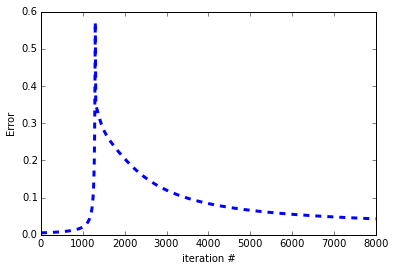

In [3]:
pyplot.plot(ni,err,linestyle='--', lw=3);
pyplot.ylabel("Error")
pyplot.xlabel("iteration #");

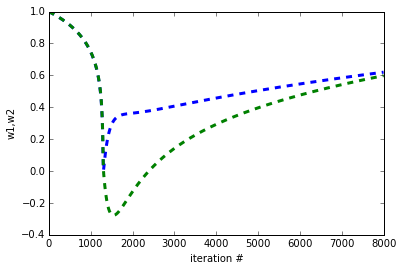

In [4]:
pyplot.plot(ni,w1,linestyle='--', lw=3);
pyplot.plot(ni,w2,linestyle='--', lw=3);
pyplot.ylabel("w1,w2")
pyplot.xlabel("iteration #");

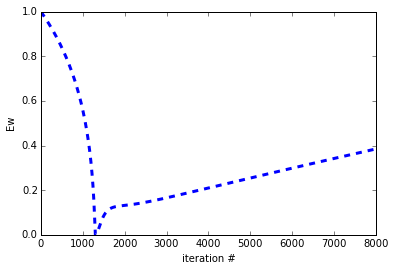

In [5]:
pyplot.plot(ni,0.5*(w1**2+w1**2),linestyle='--', lw=3);
pyplot.ylabel("Ew")
pyplot.xlabel("iteration #");


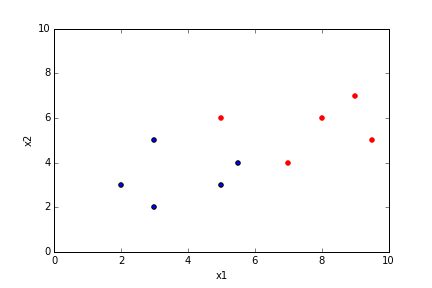
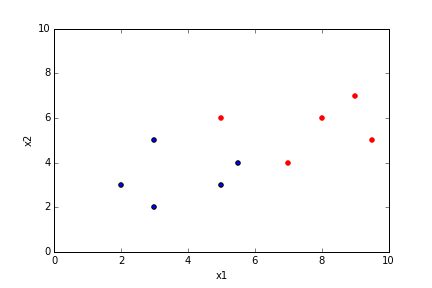
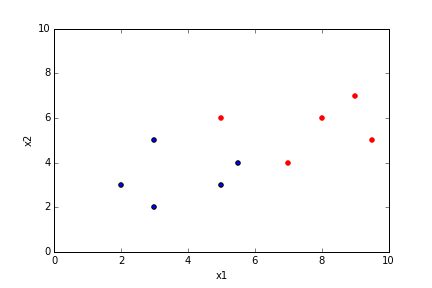
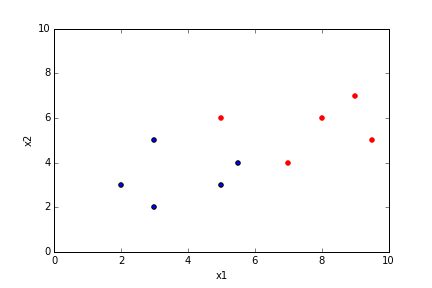
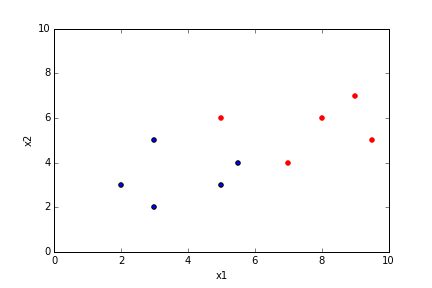
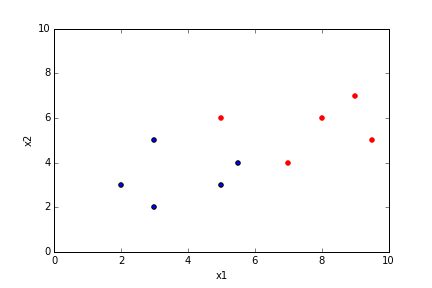
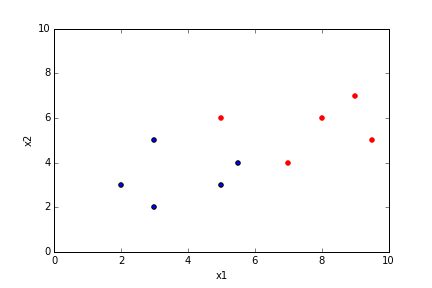
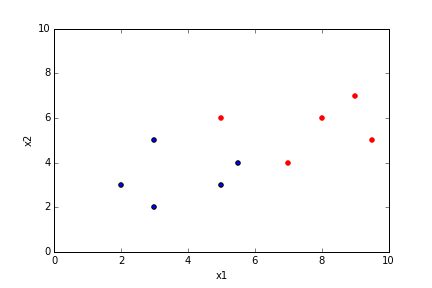
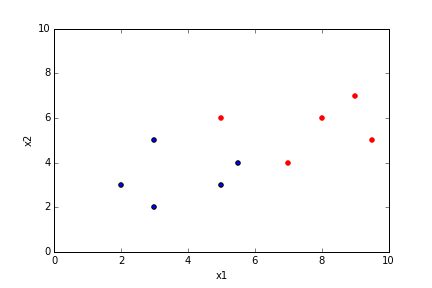
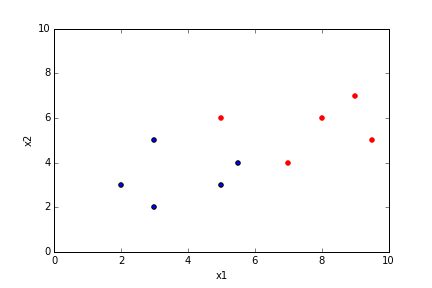
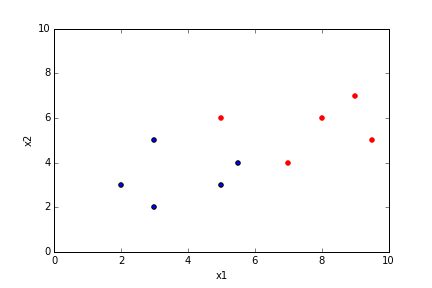
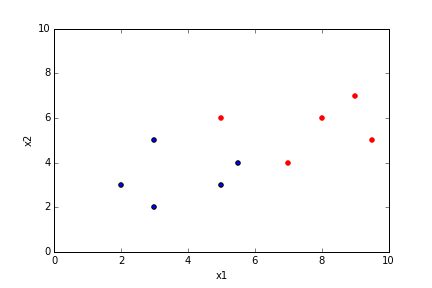
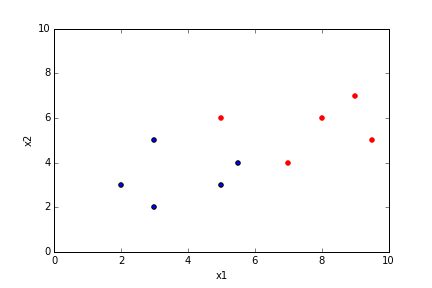
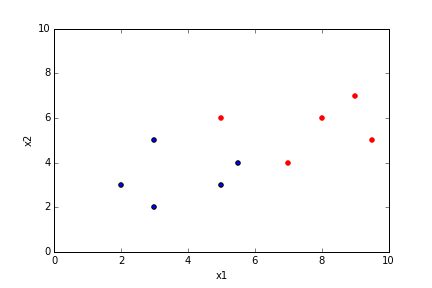
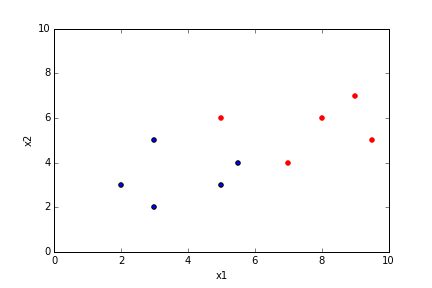
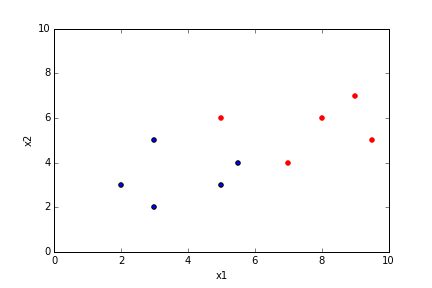
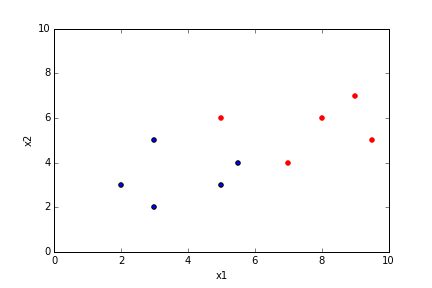
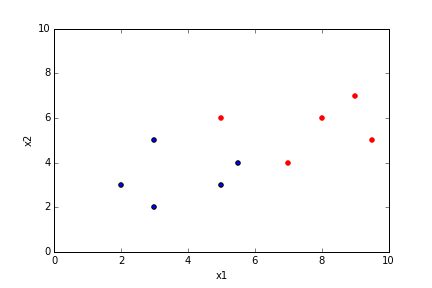
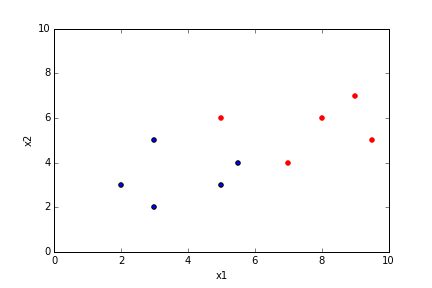
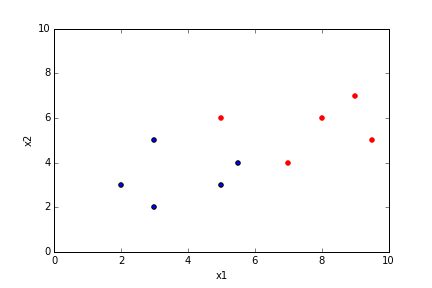
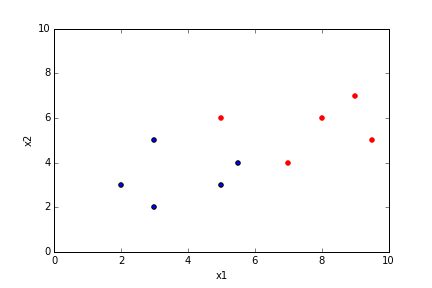
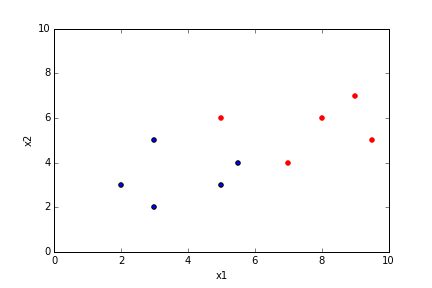
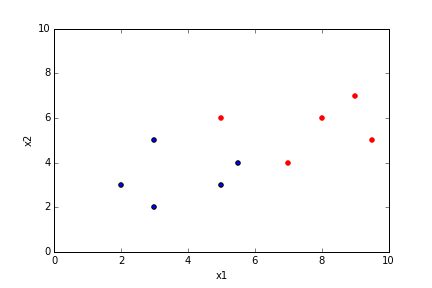
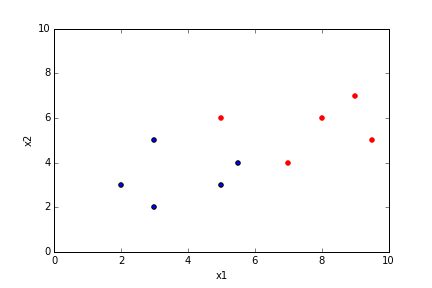
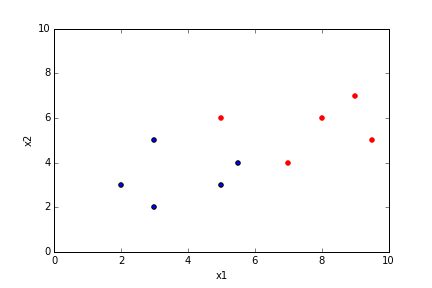
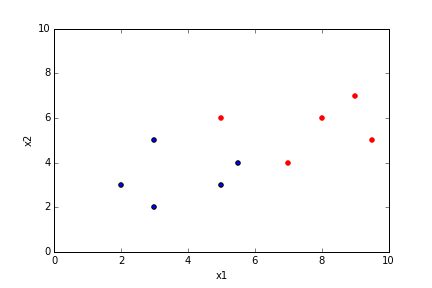
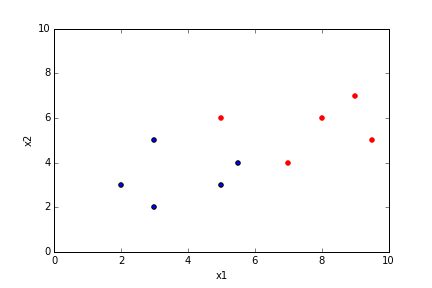
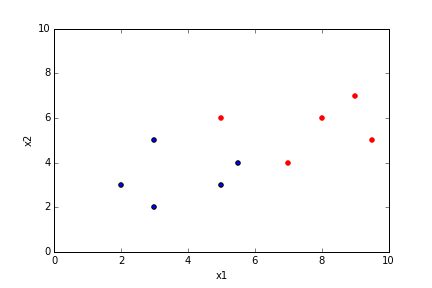
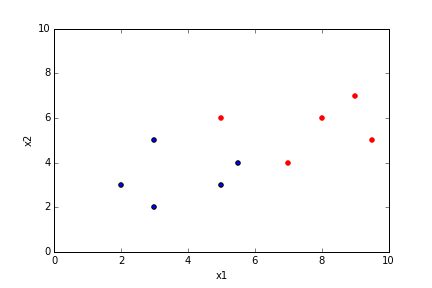
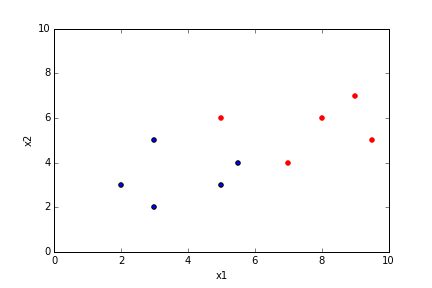
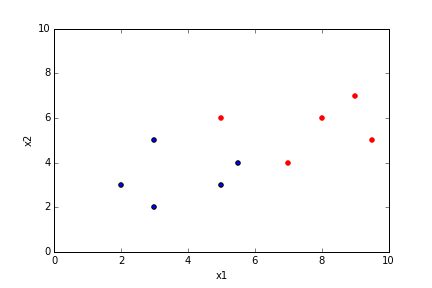
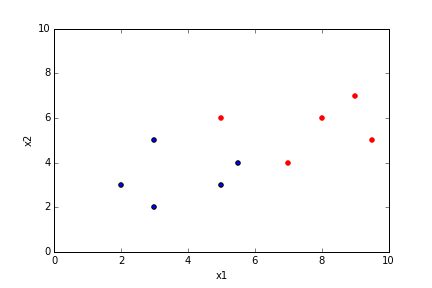
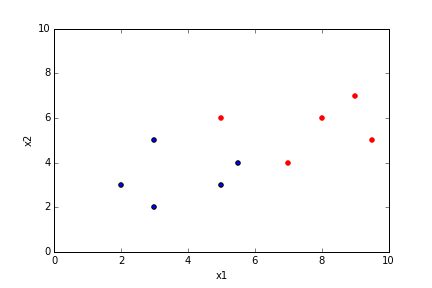
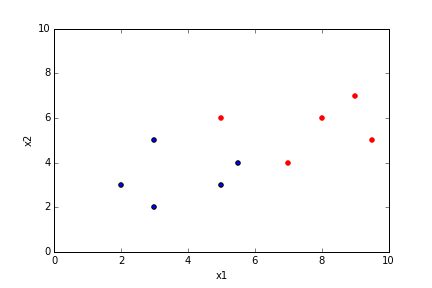
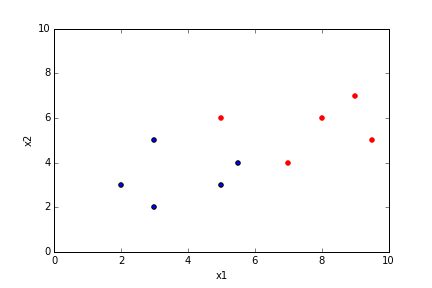
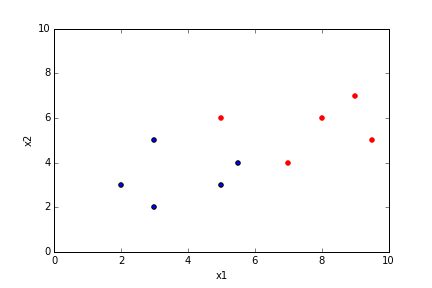
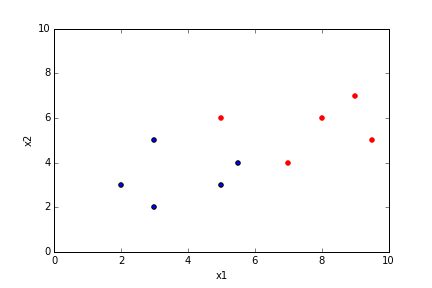
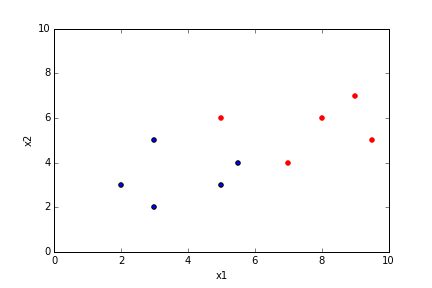
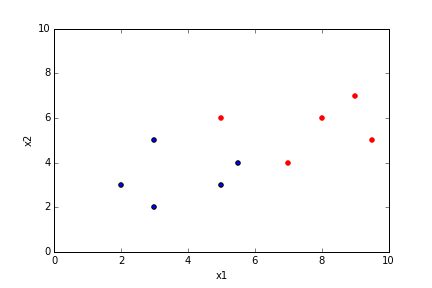
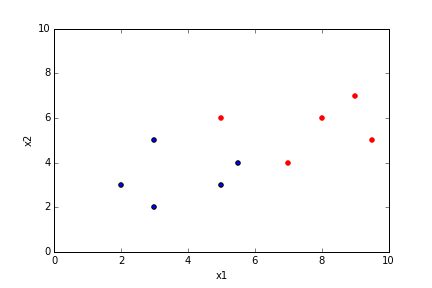
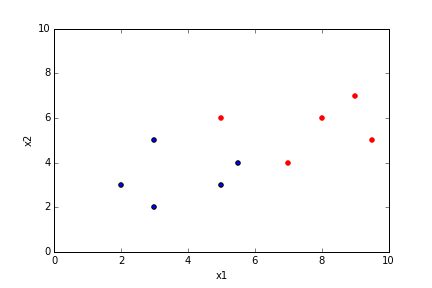
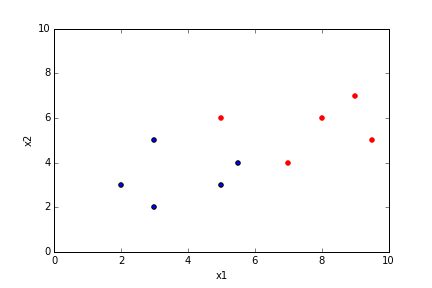
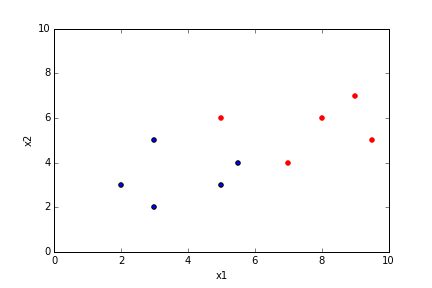
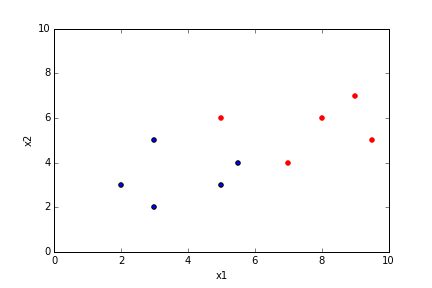
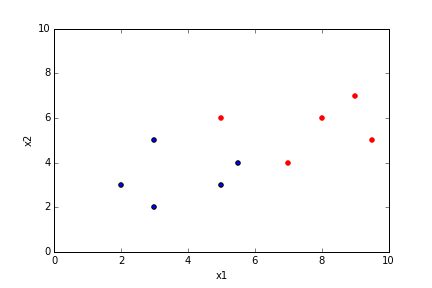
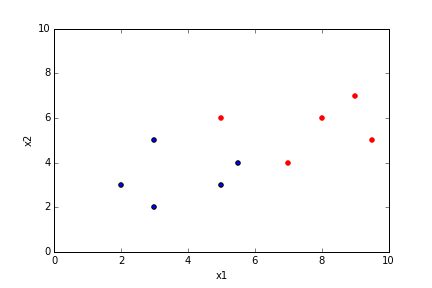
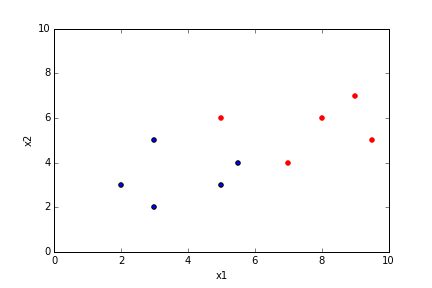
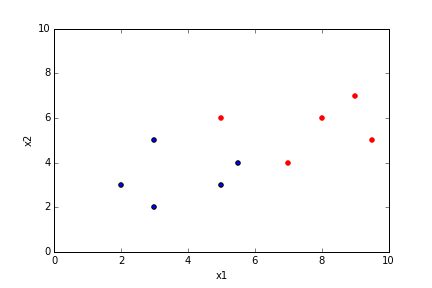
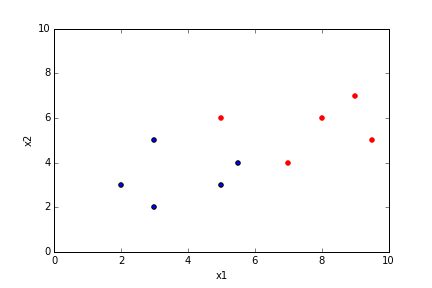
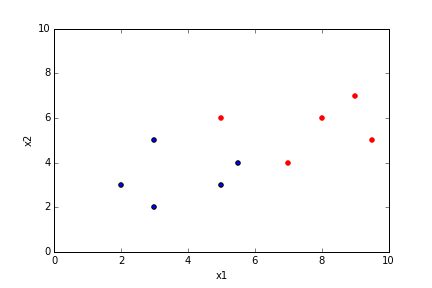
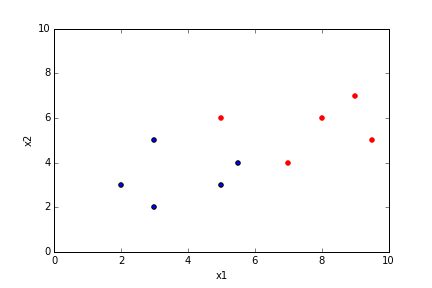
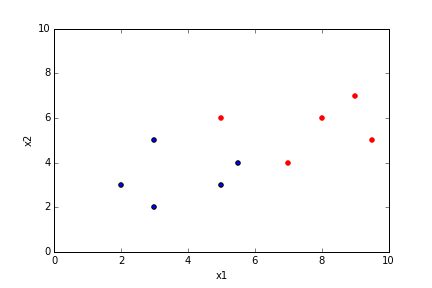
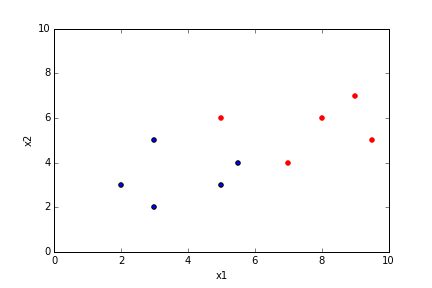
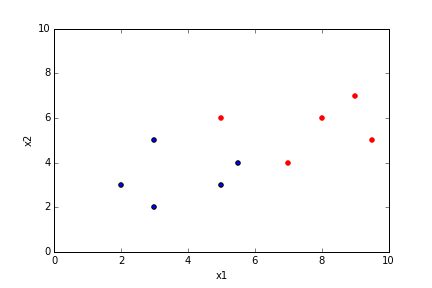
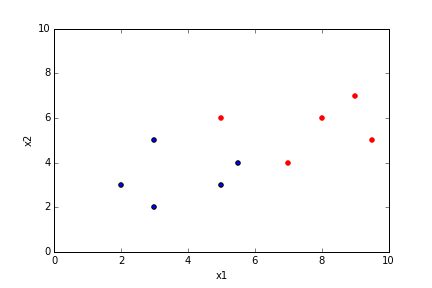
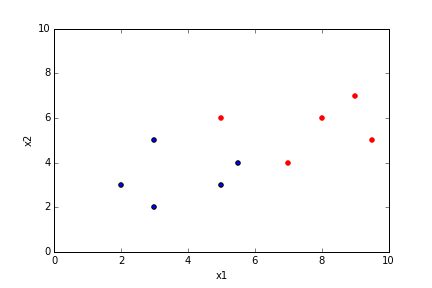
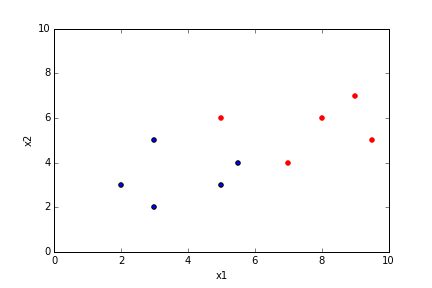
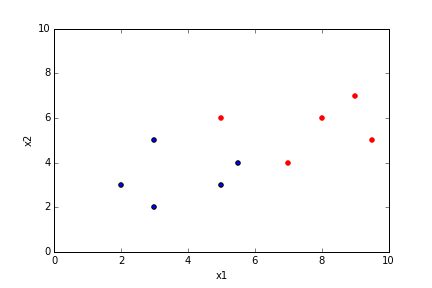
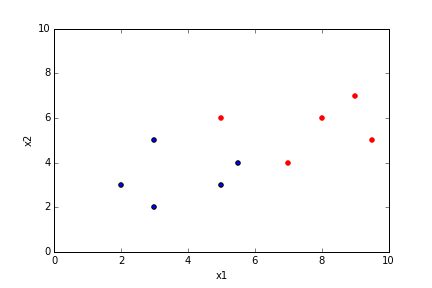
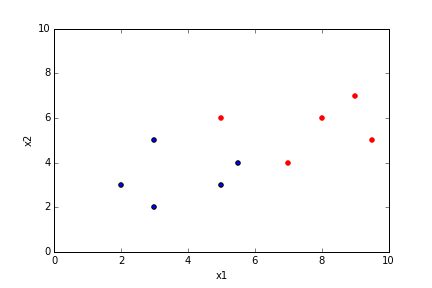
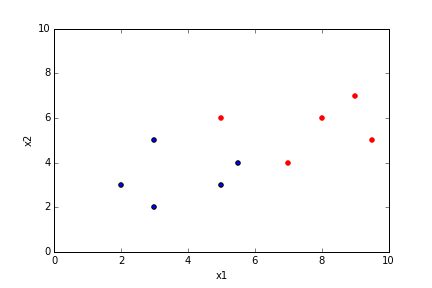
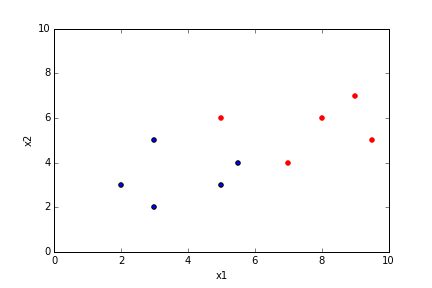
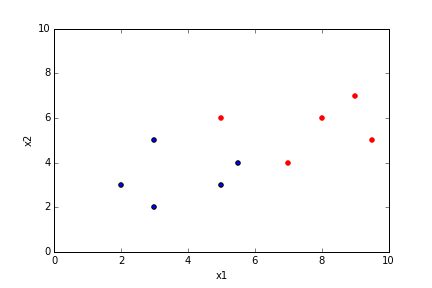
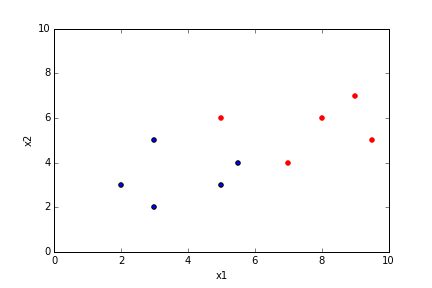
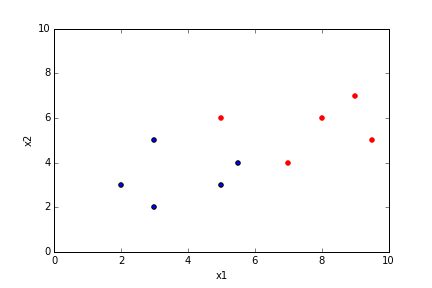
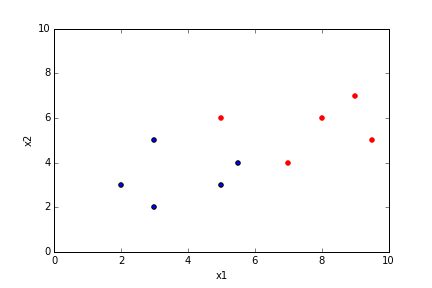
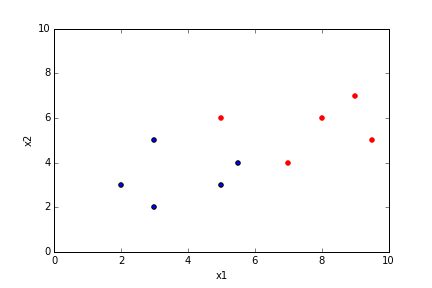
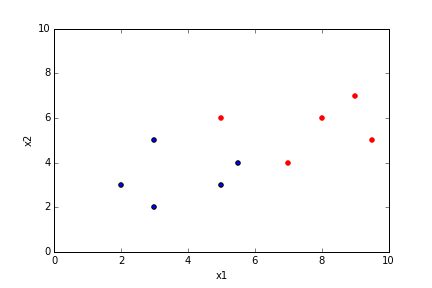
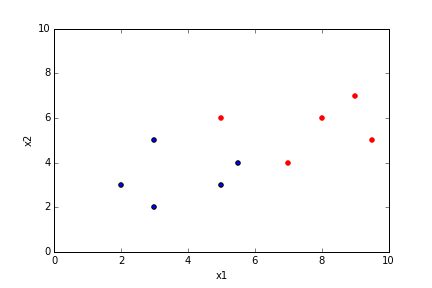
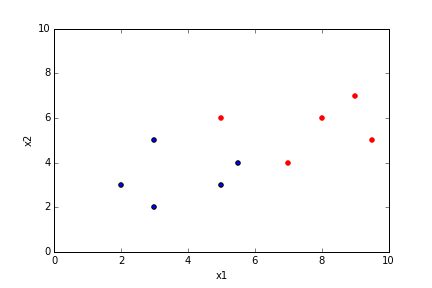
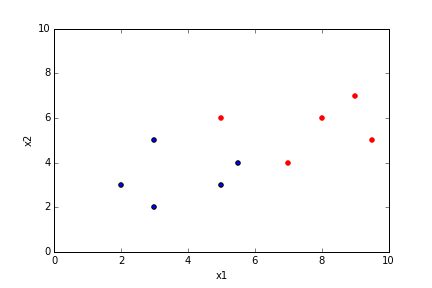
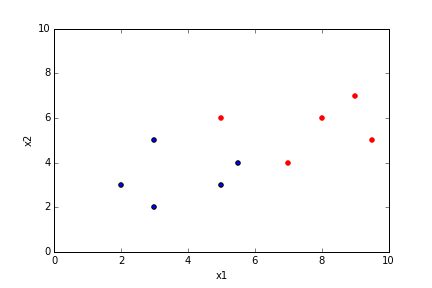
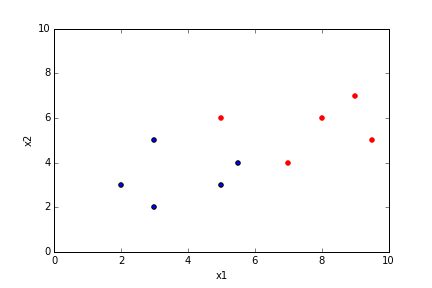
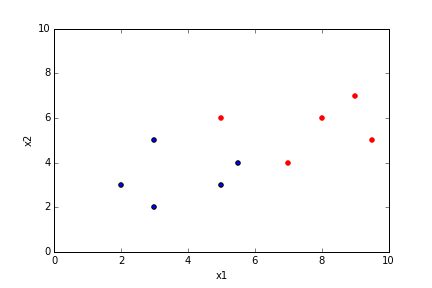
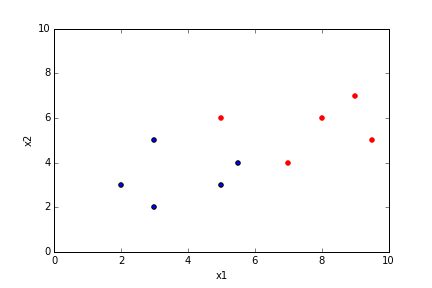
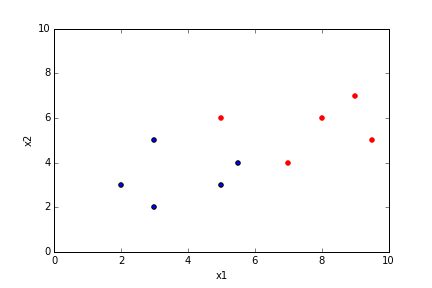
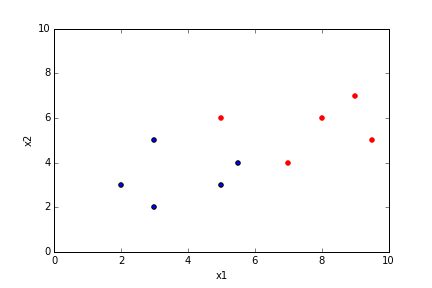
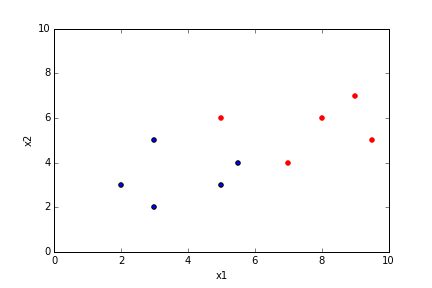
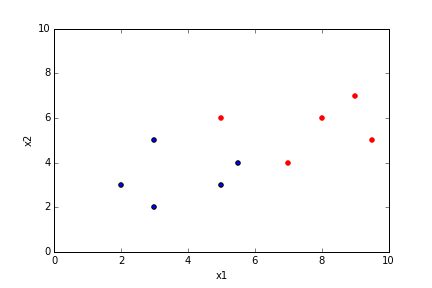
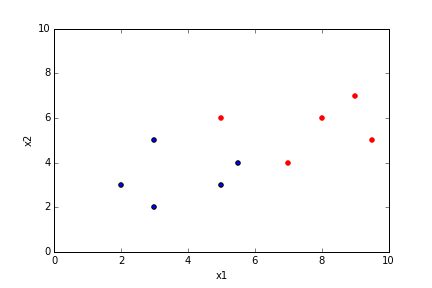
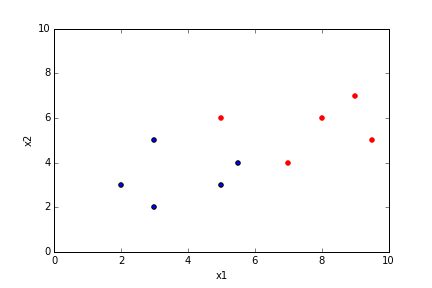
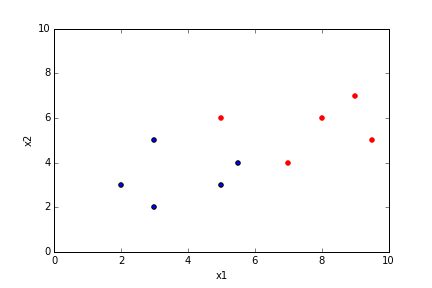
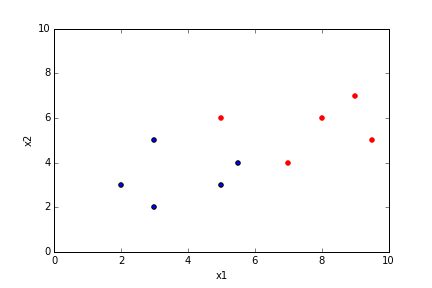
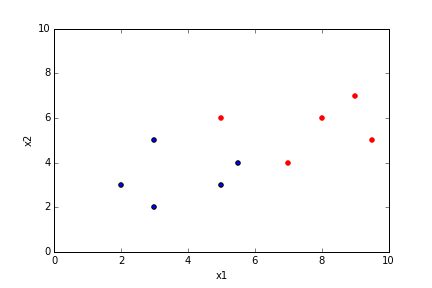
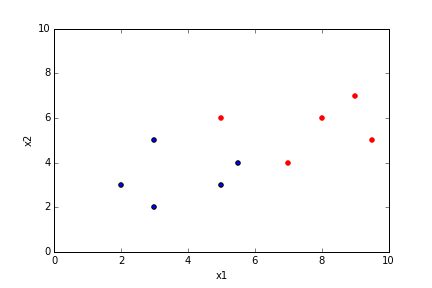
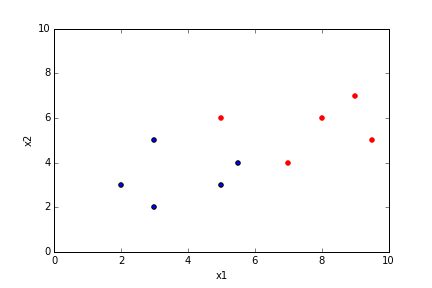
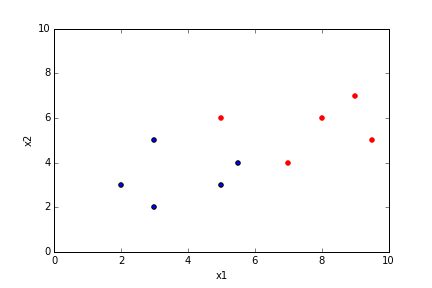
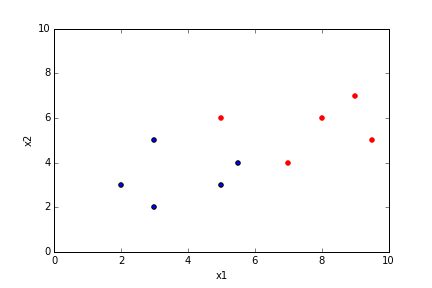
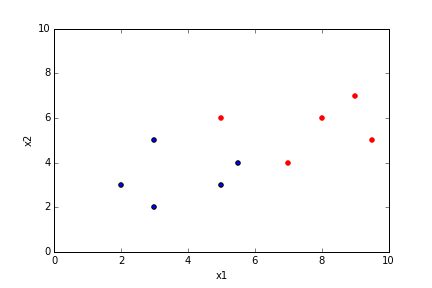
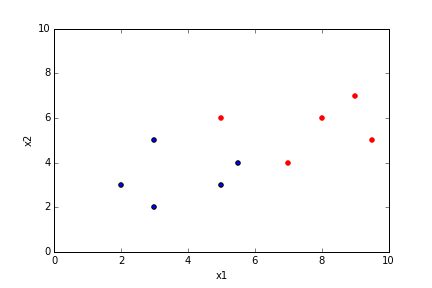
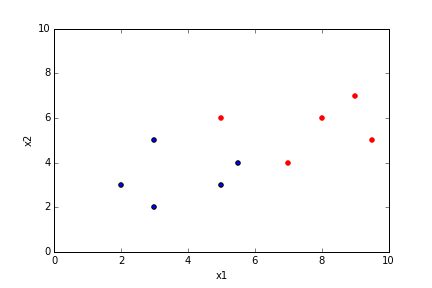
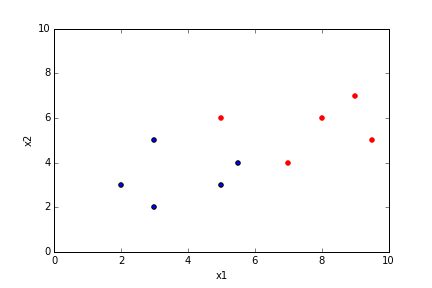
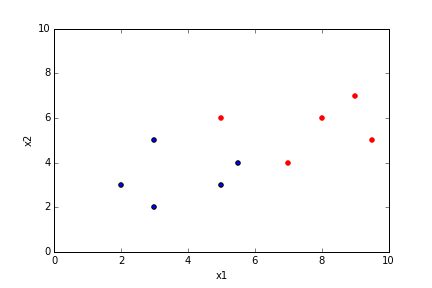
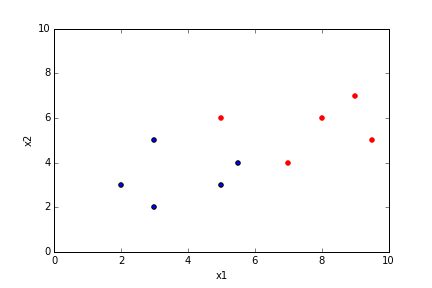
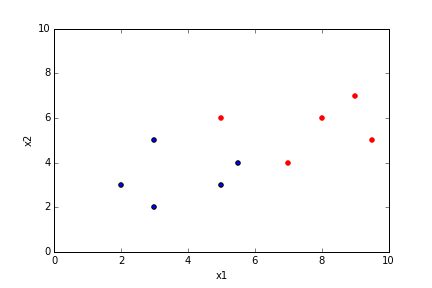
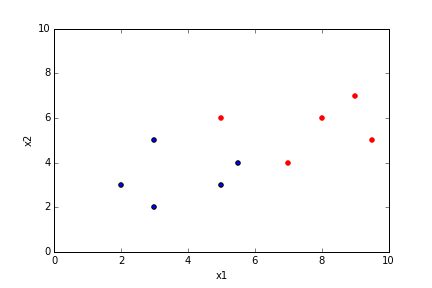
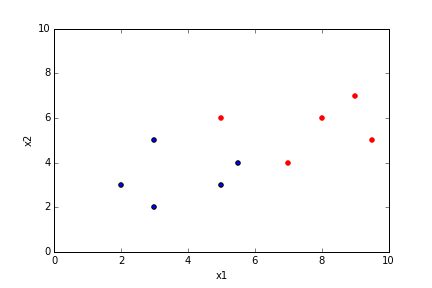
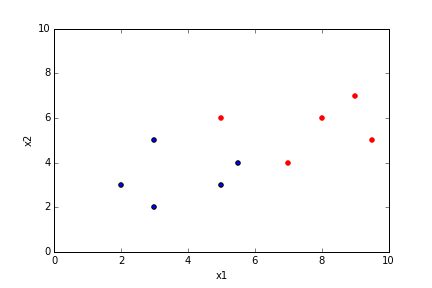
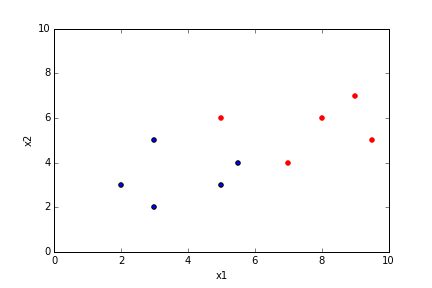
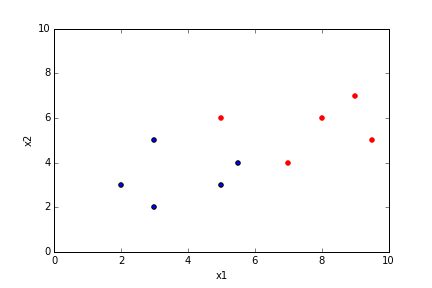
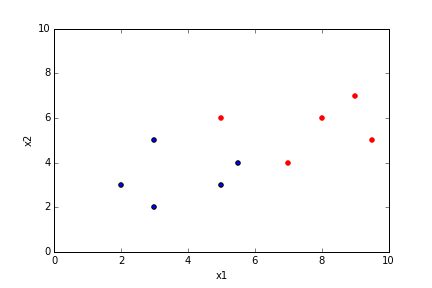
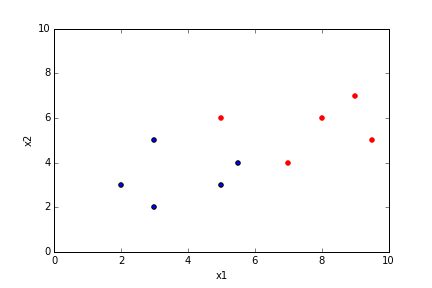
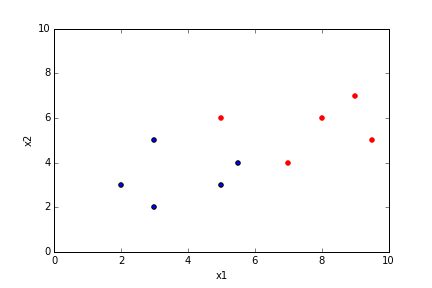
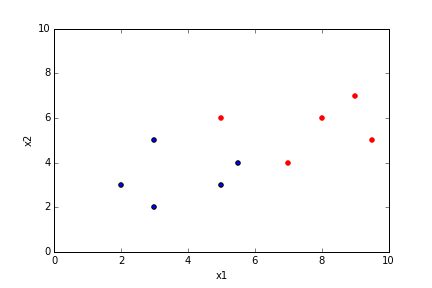
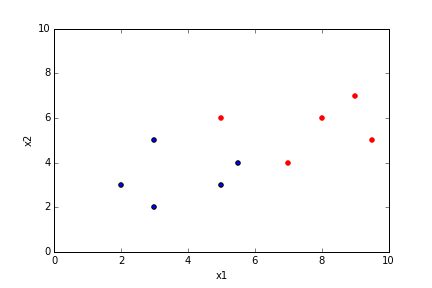
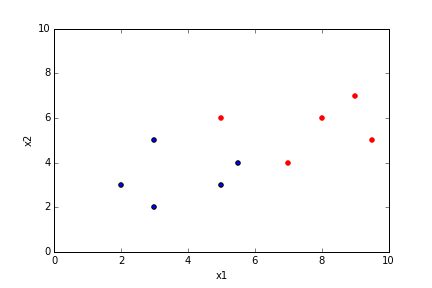
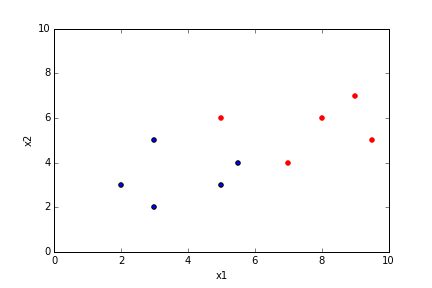
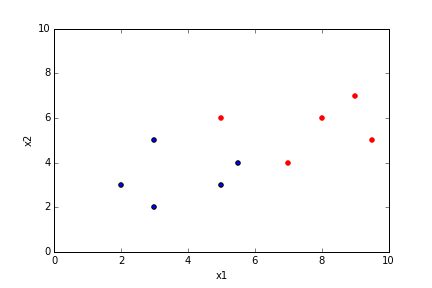
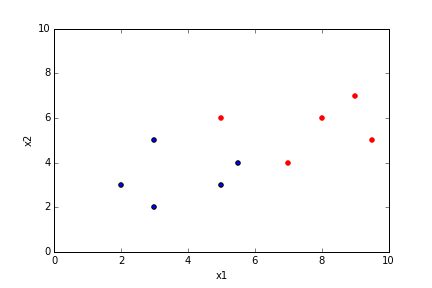
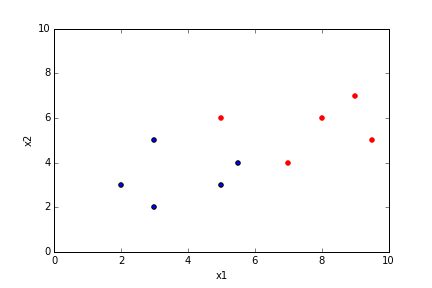
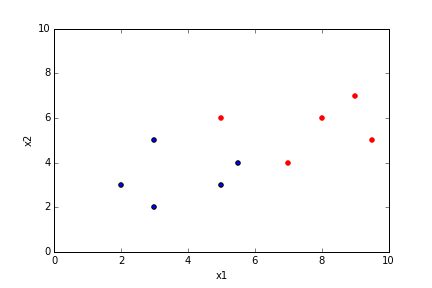
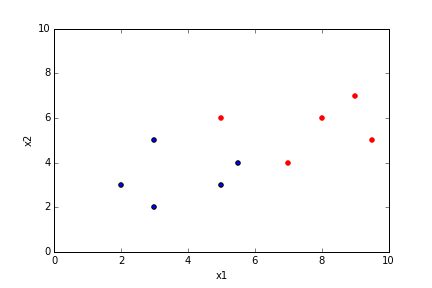
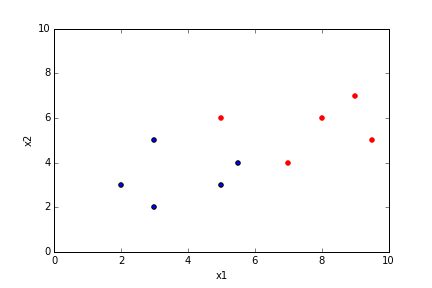
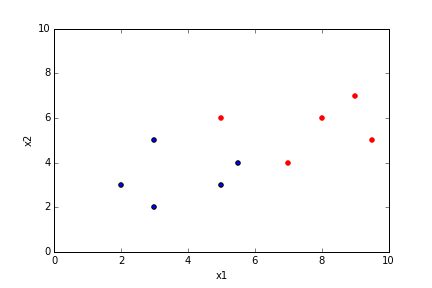
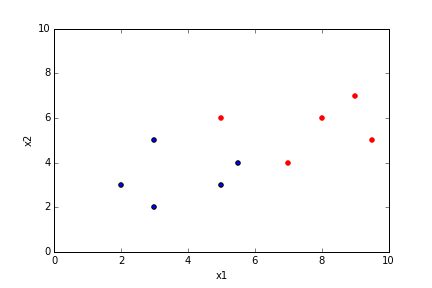
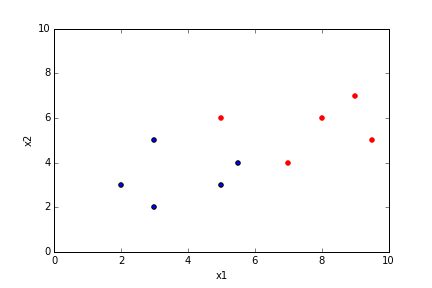
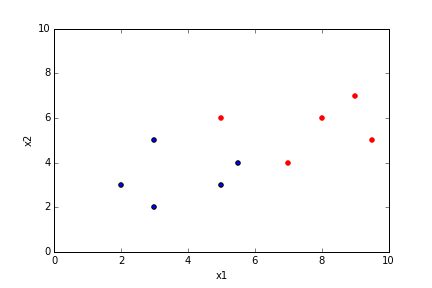
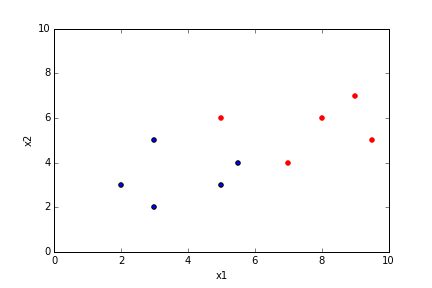
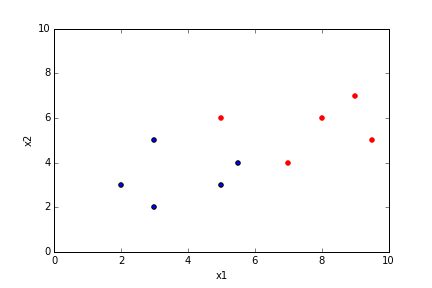
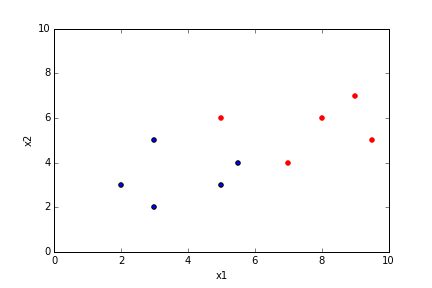
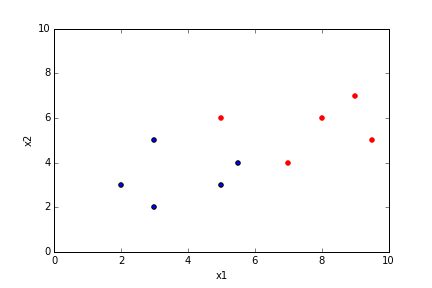
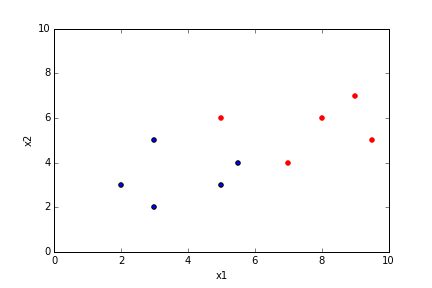
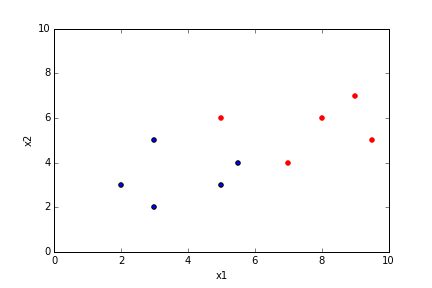
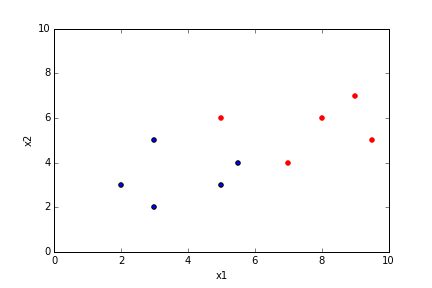
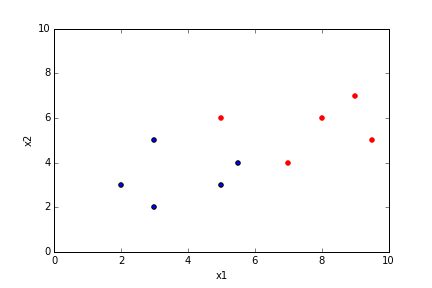
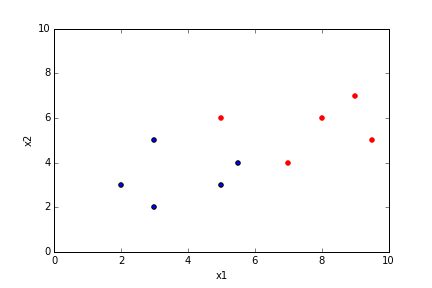
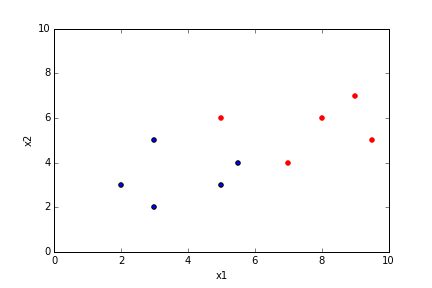
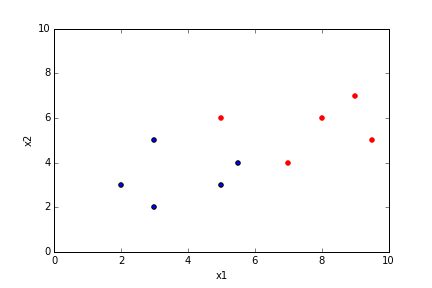
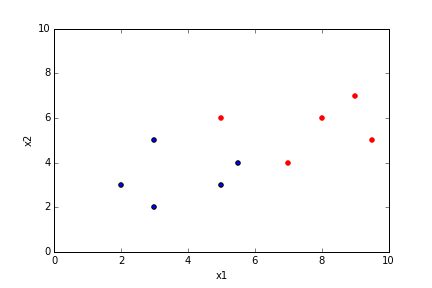
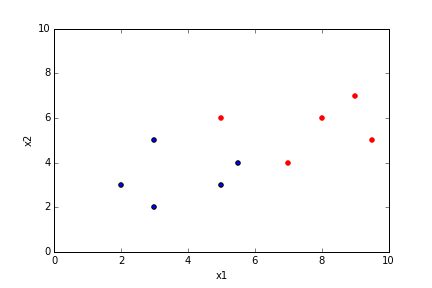
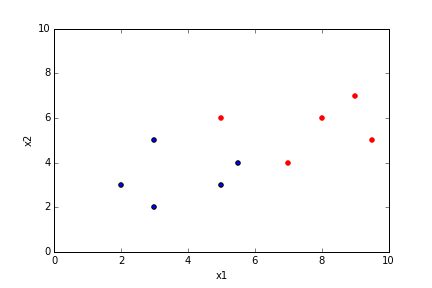
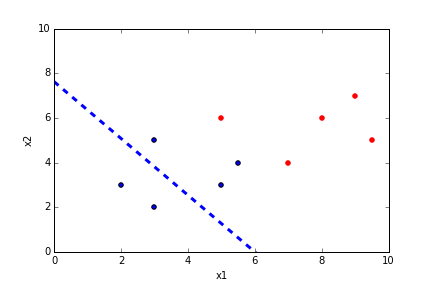
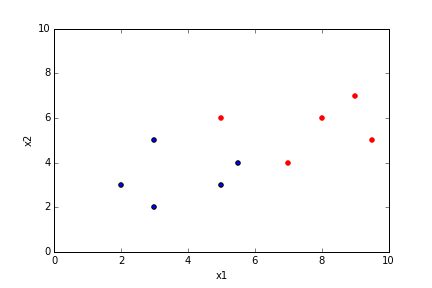
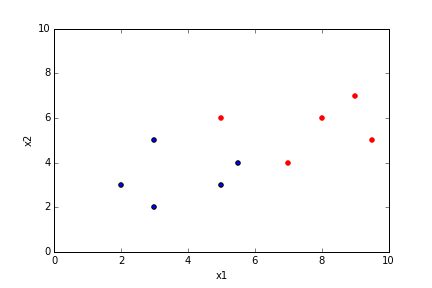
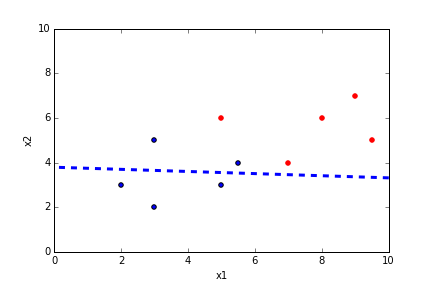
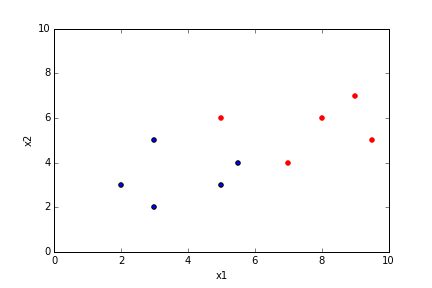
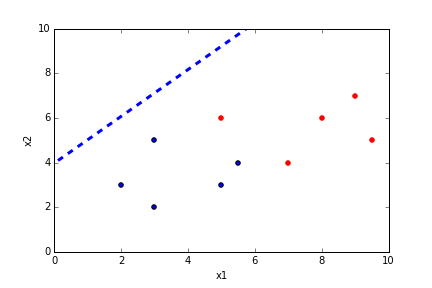
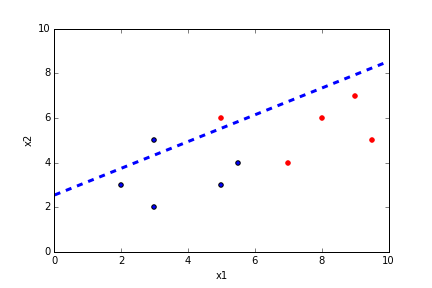
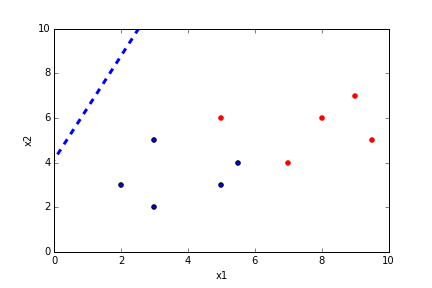
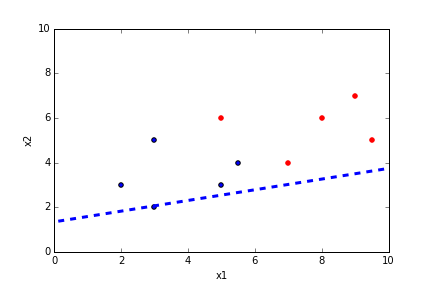
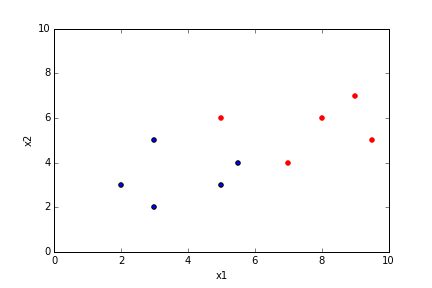
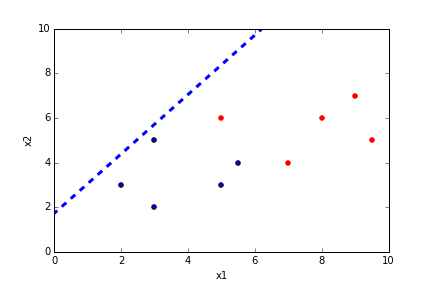
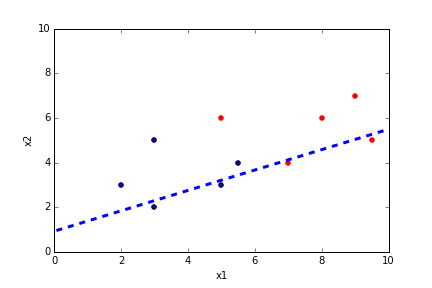
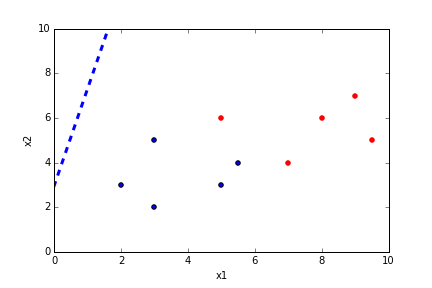
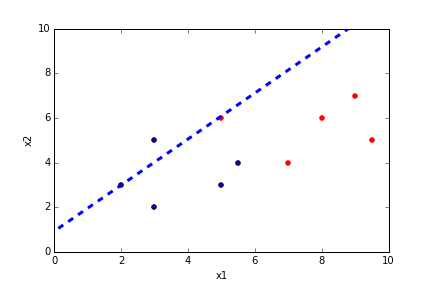
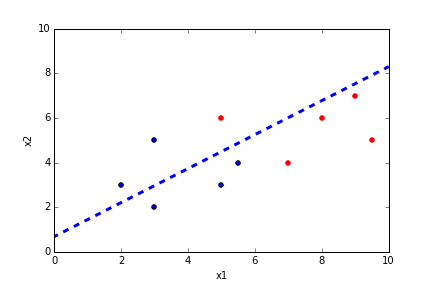
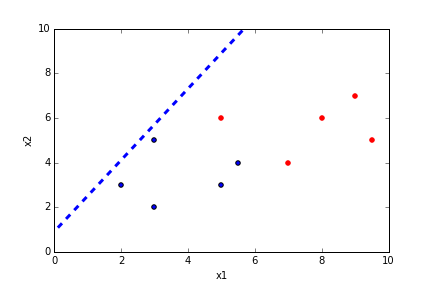
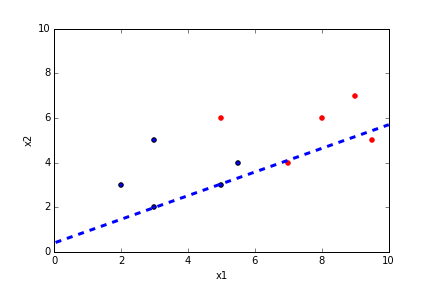
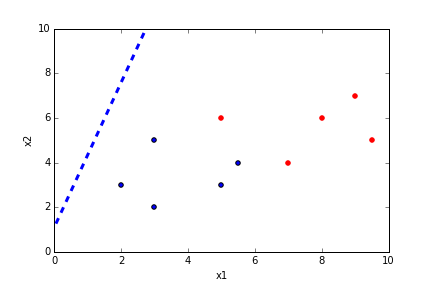
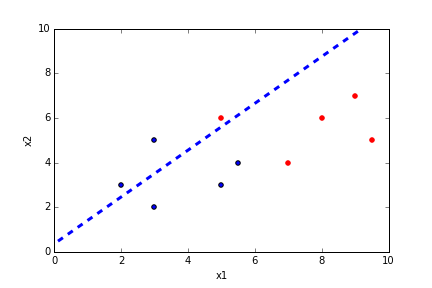
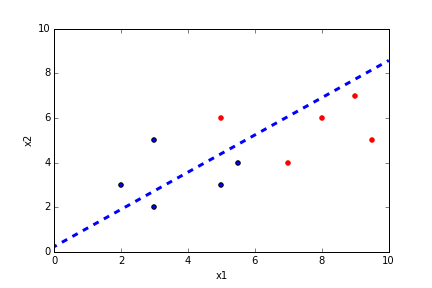
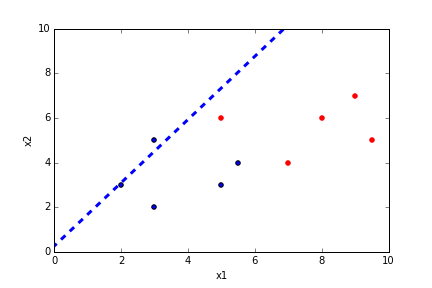
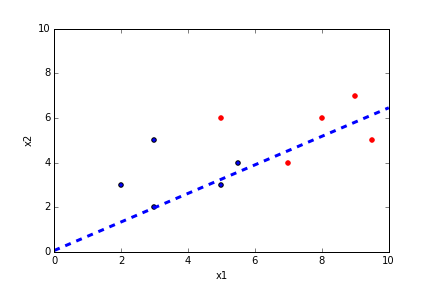
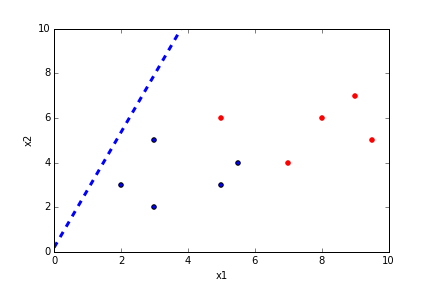
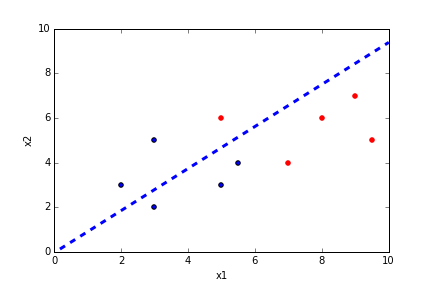
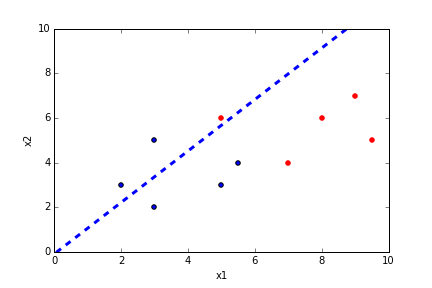
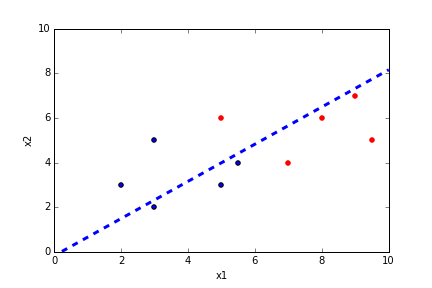
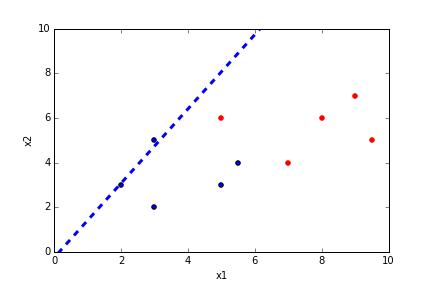
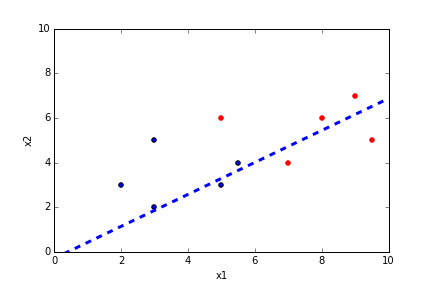
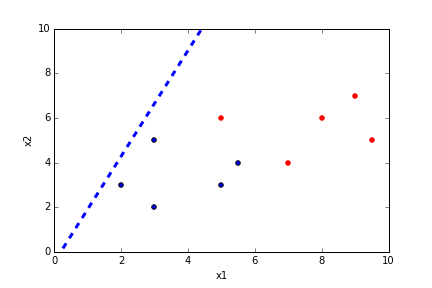
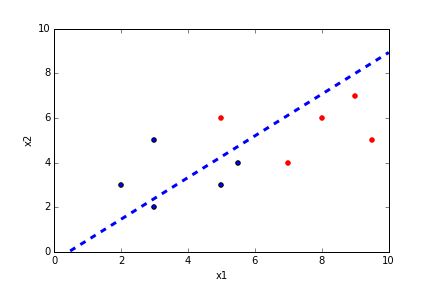
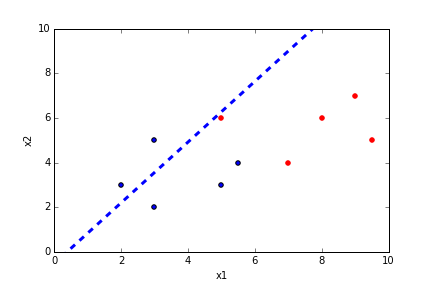
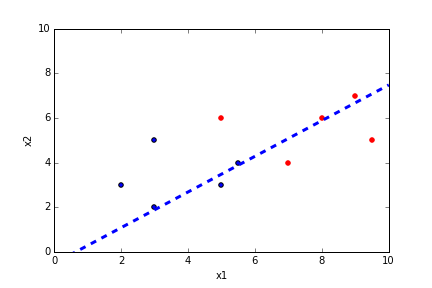
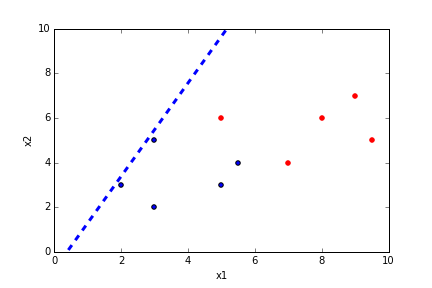
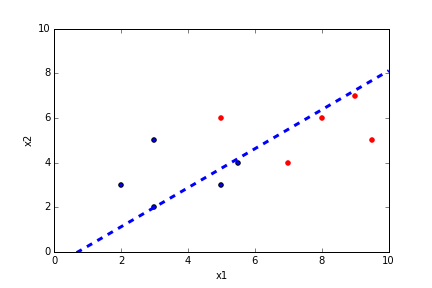
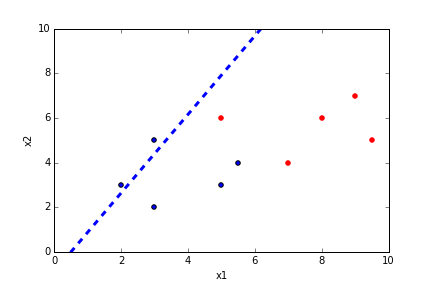
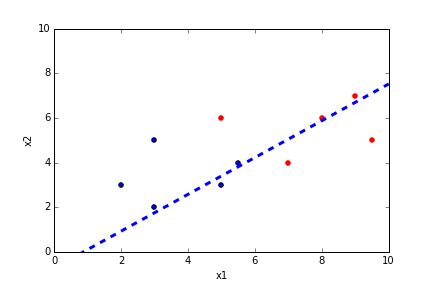
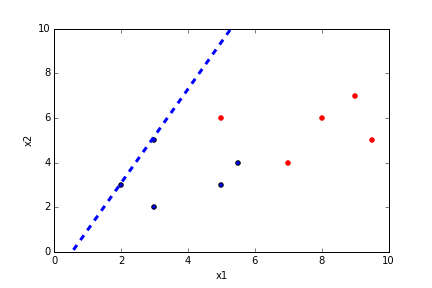
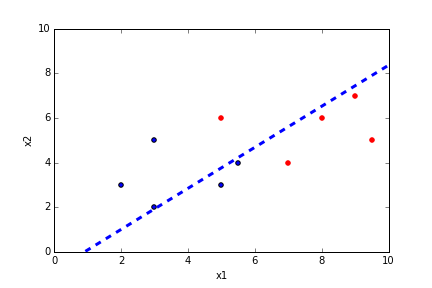
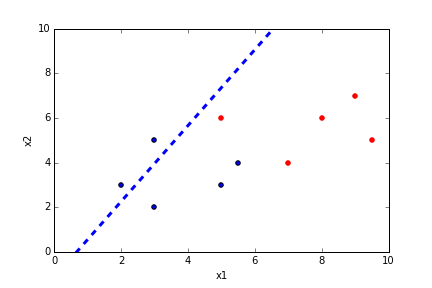
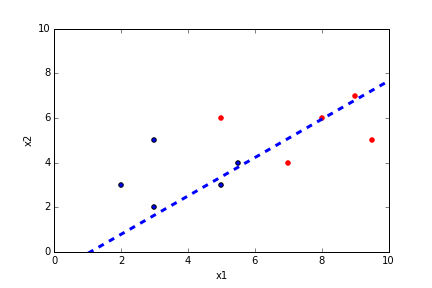
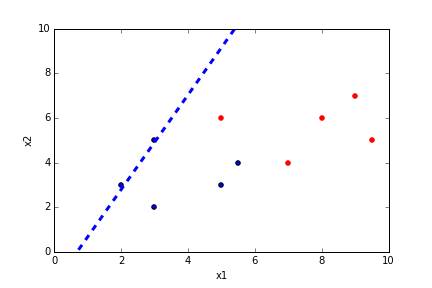
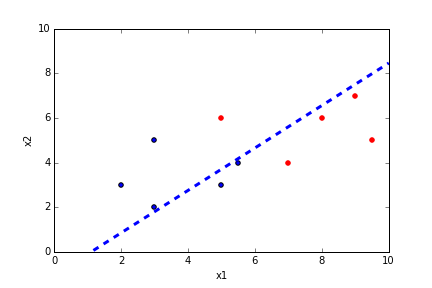
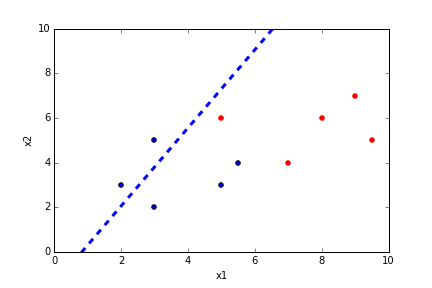
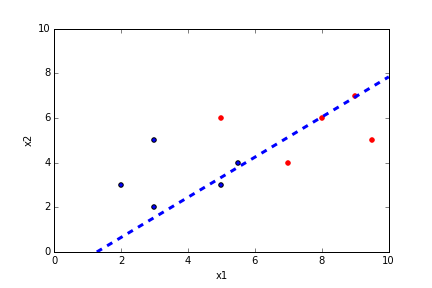
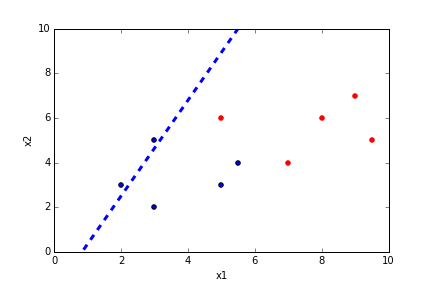
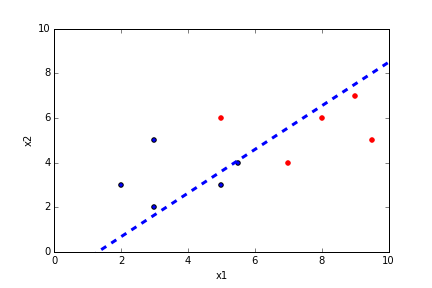
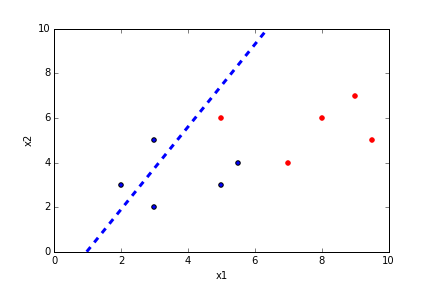
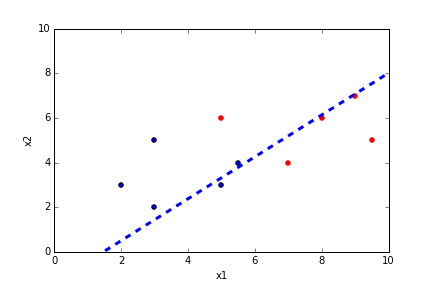
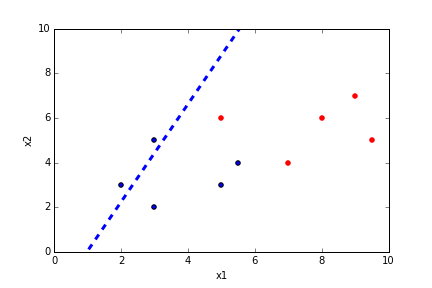
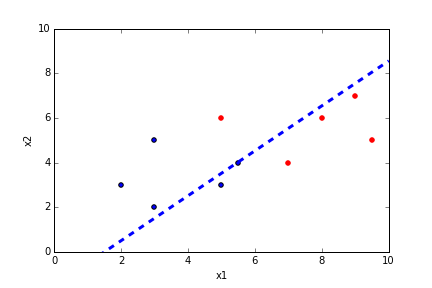
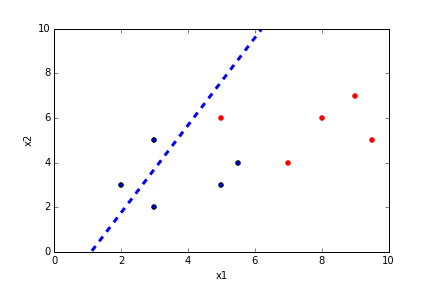
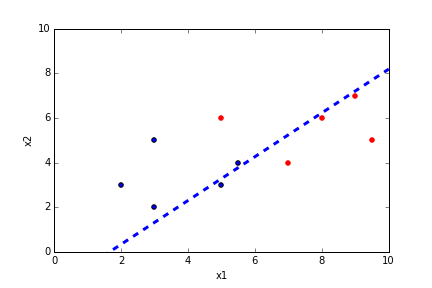
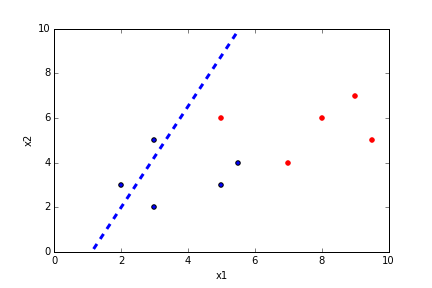
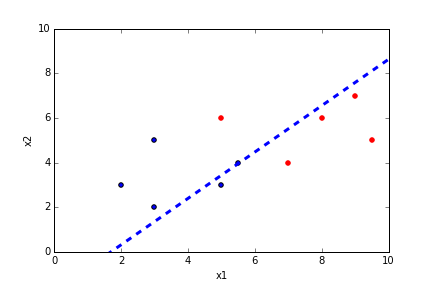
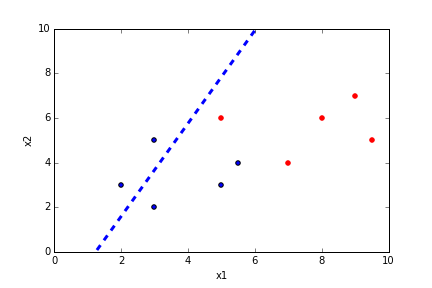
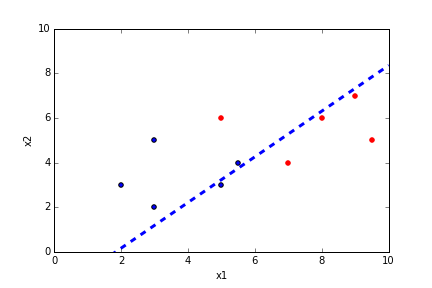
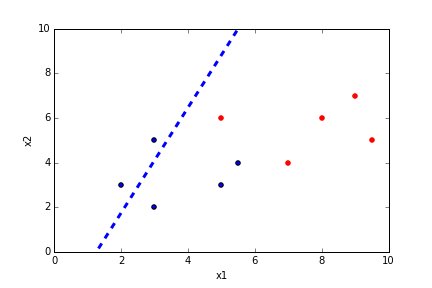
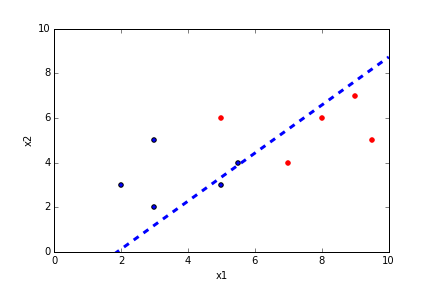
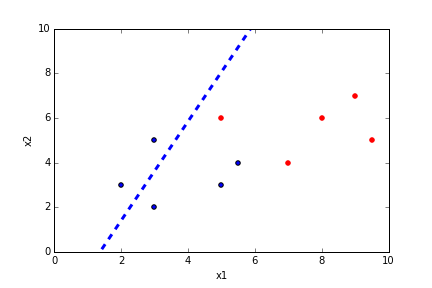
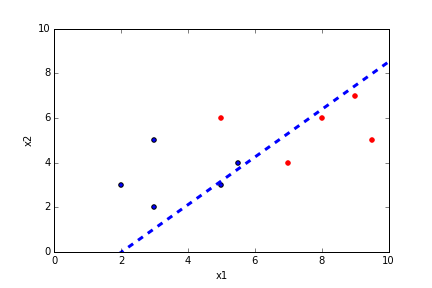
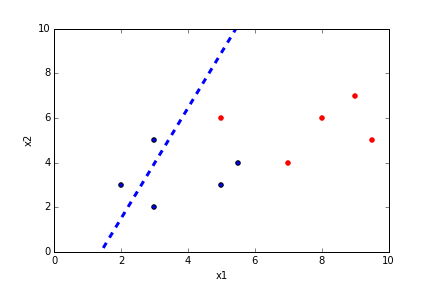
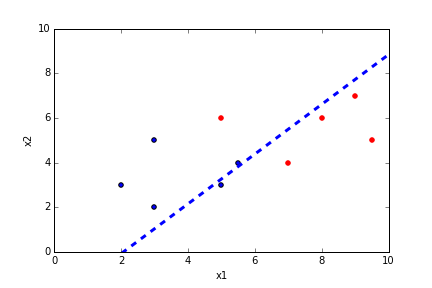
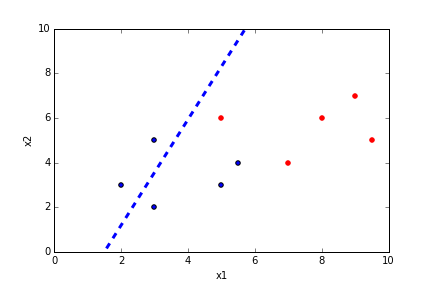
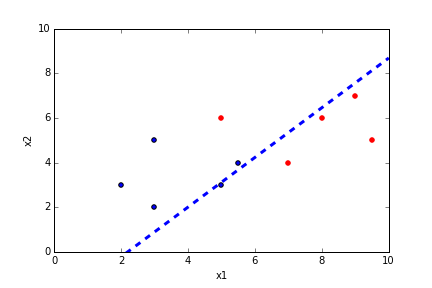
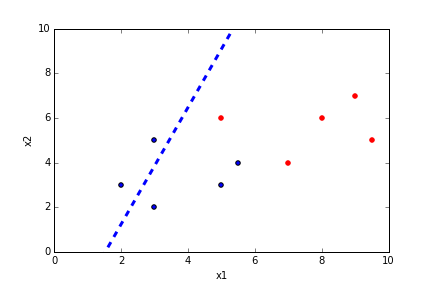
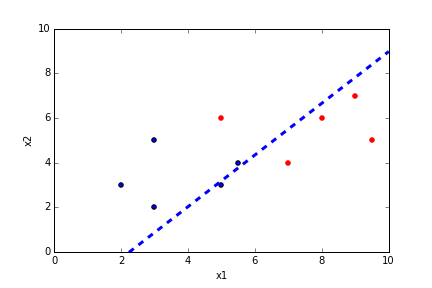
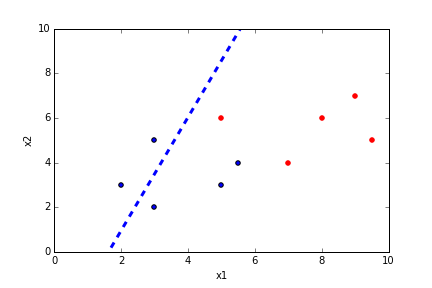
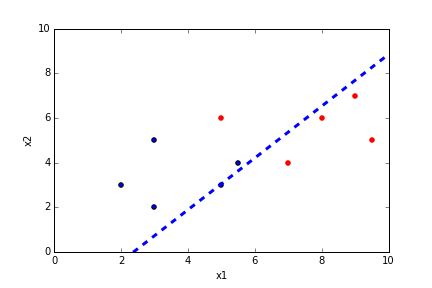
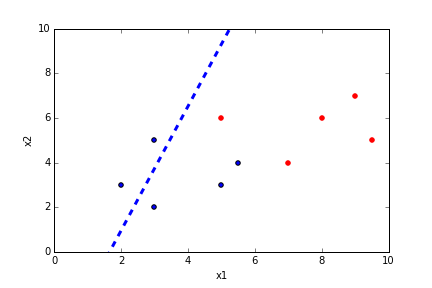
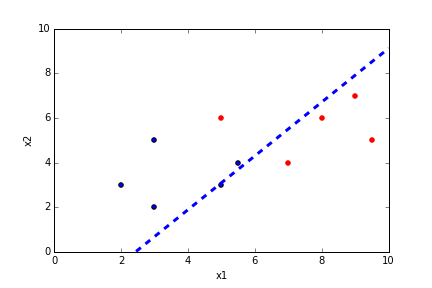
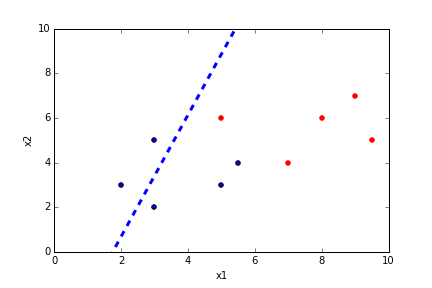
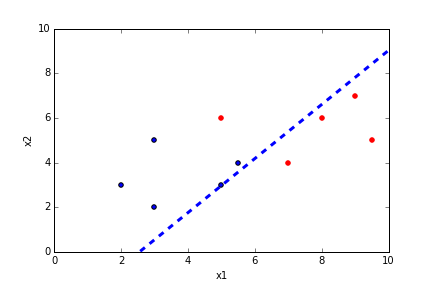
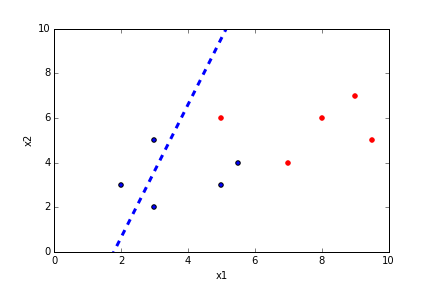
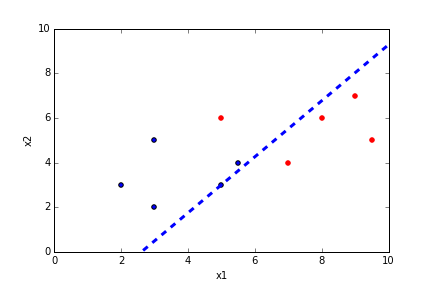
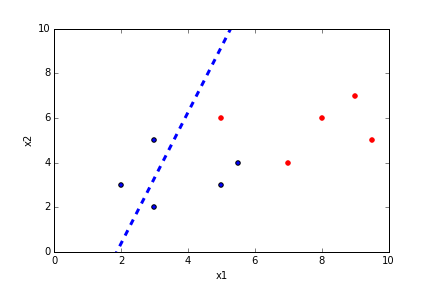
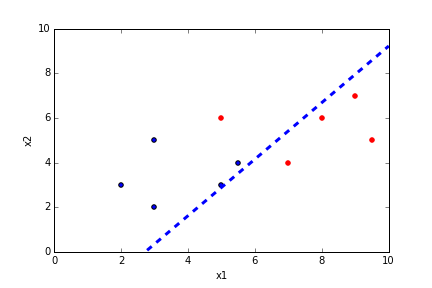
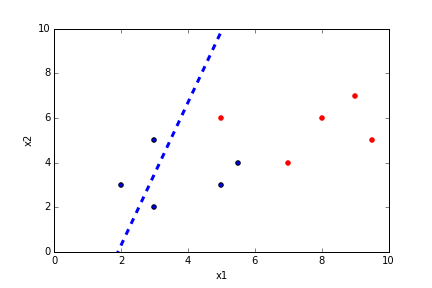
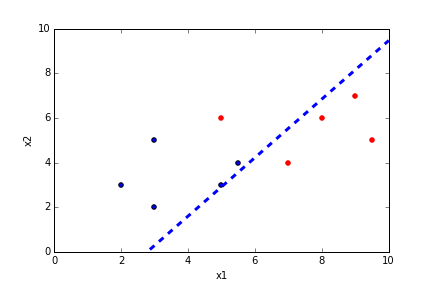
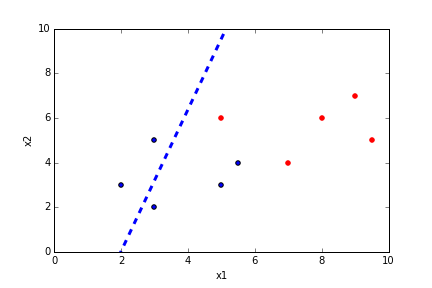
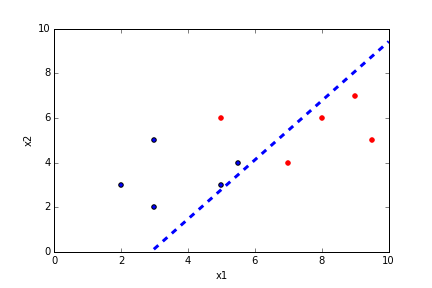
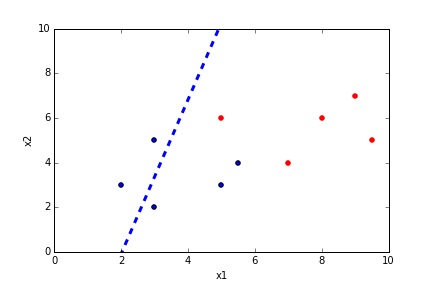
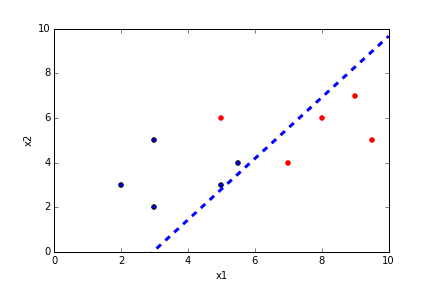
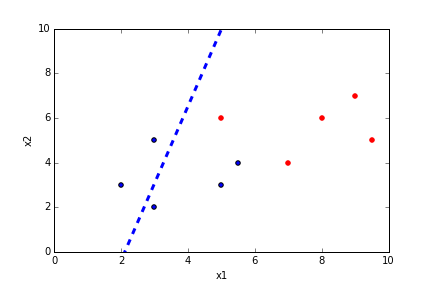
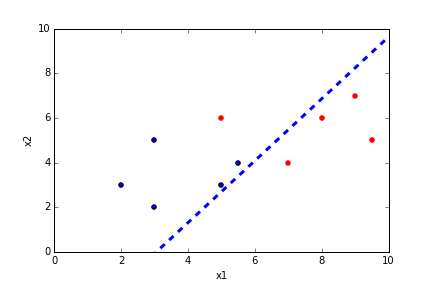
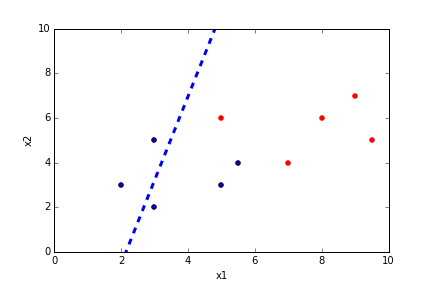
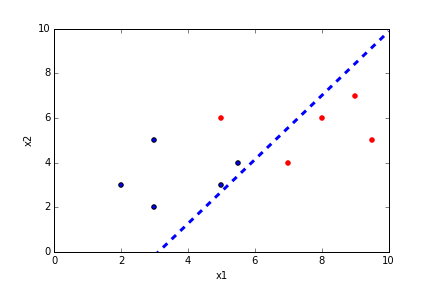
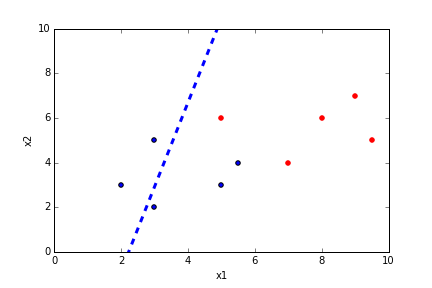
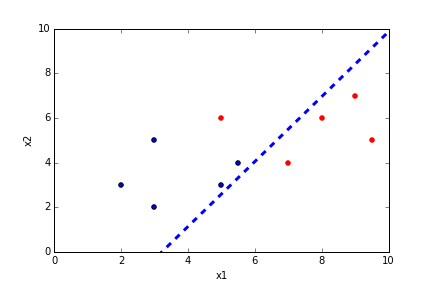
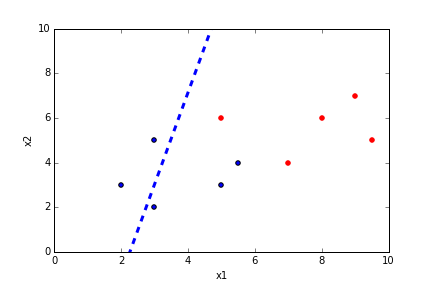
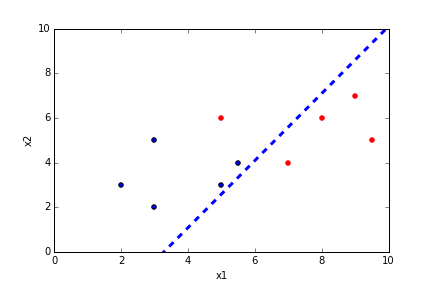
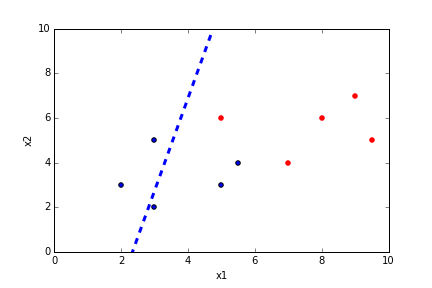
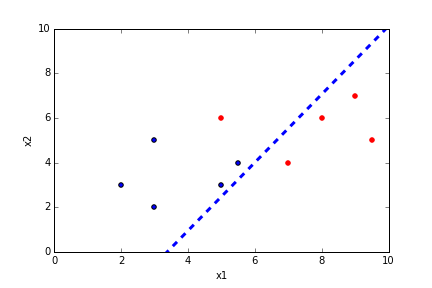
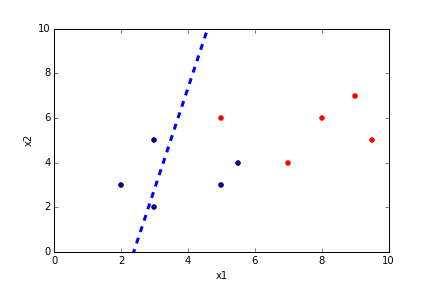
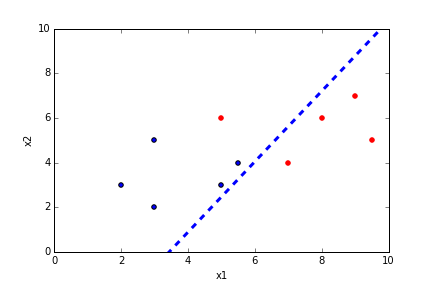
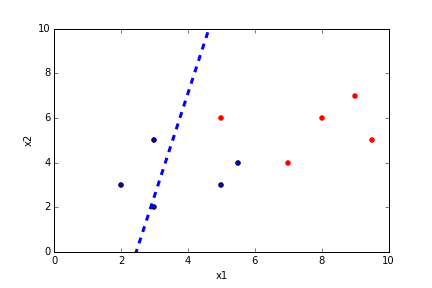
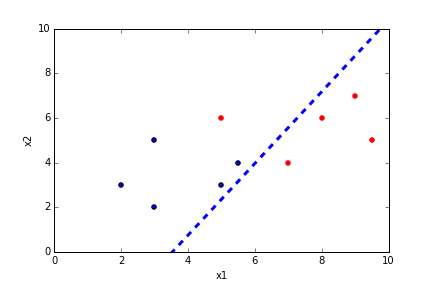
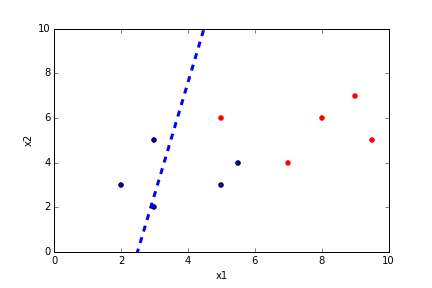
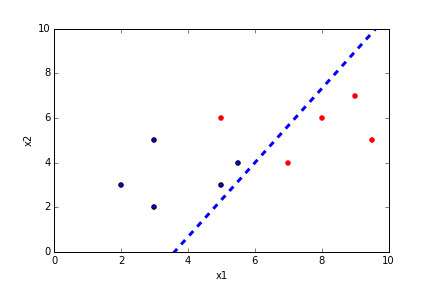
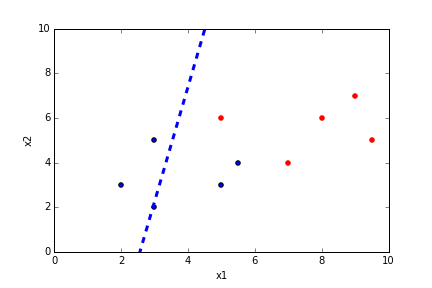
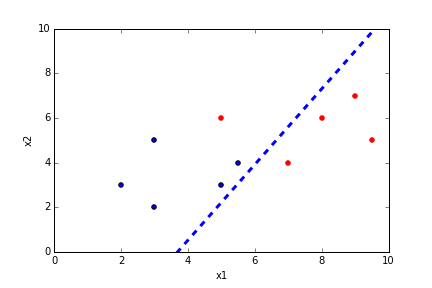
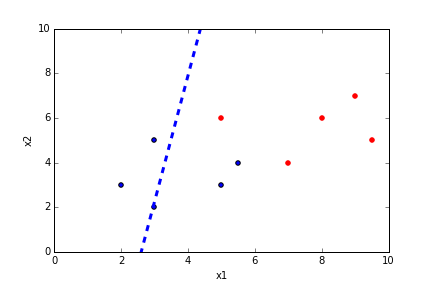
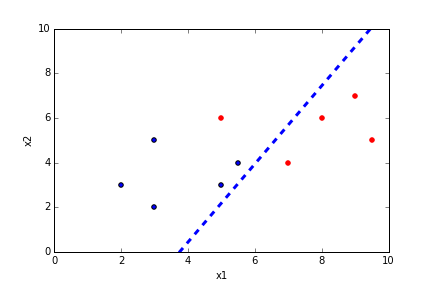
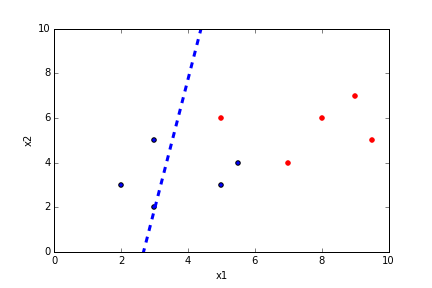
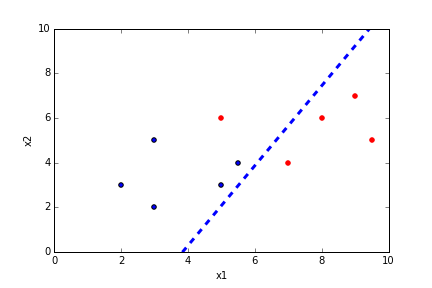
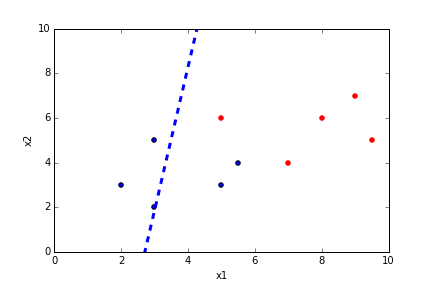
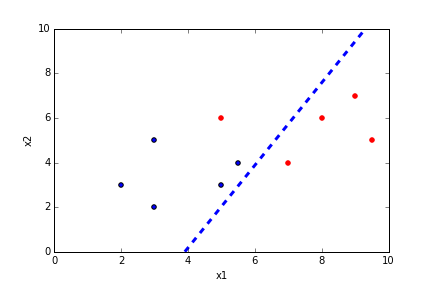
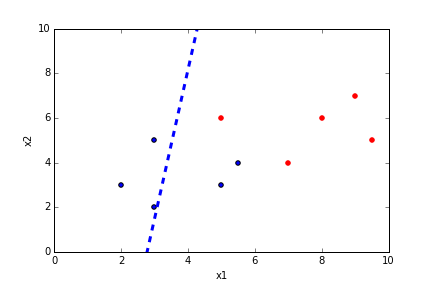
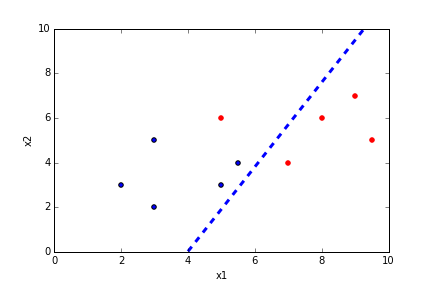
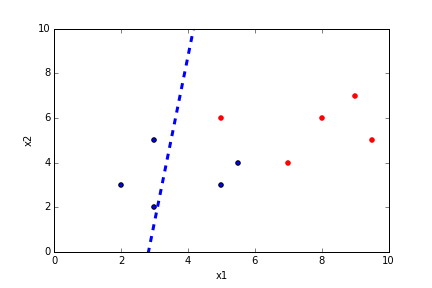
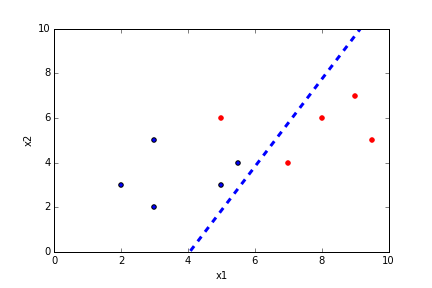
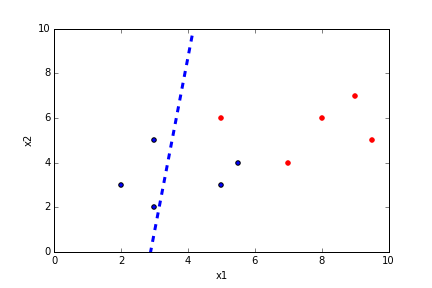
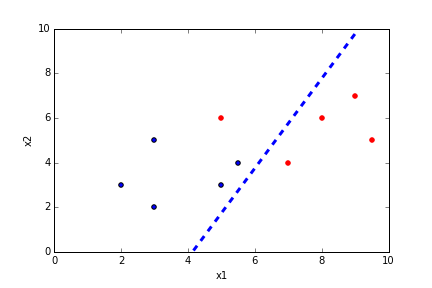
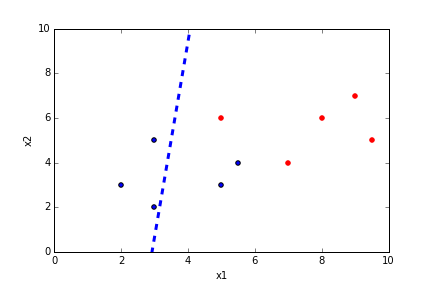
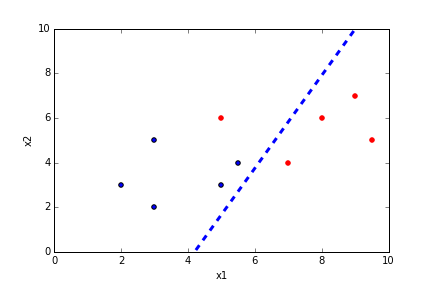
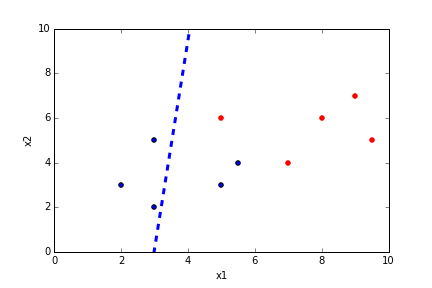
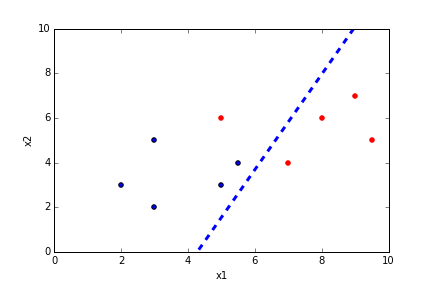
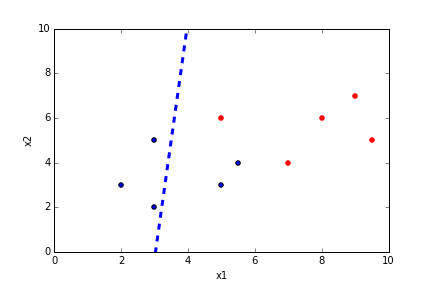
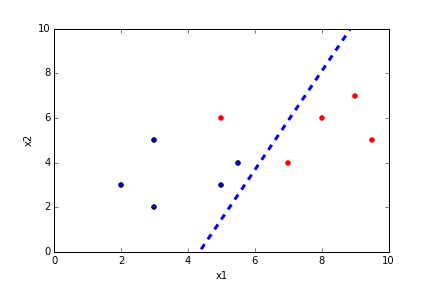
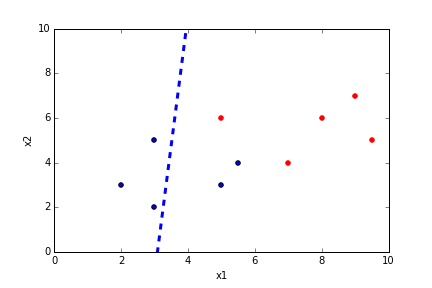
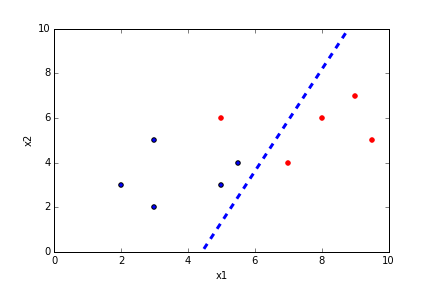
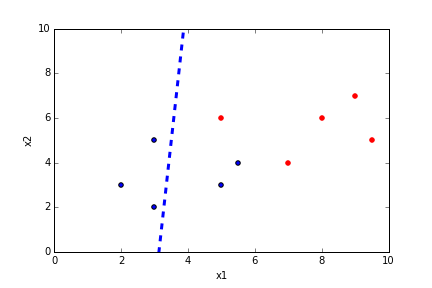
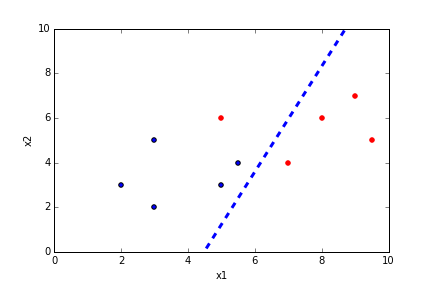
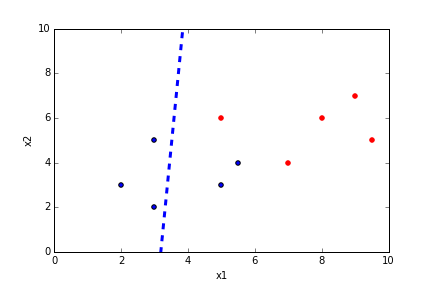
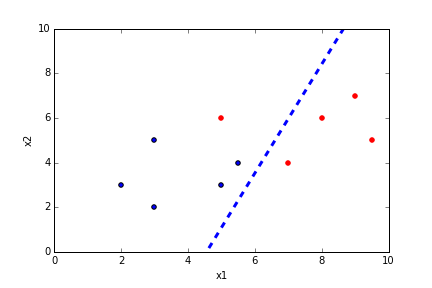
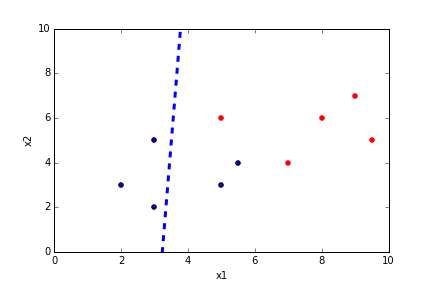
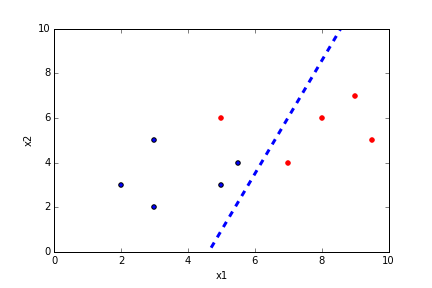
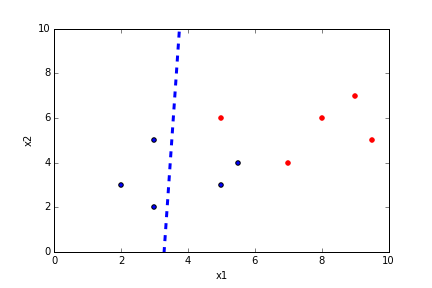
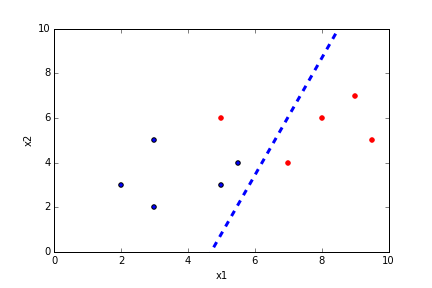
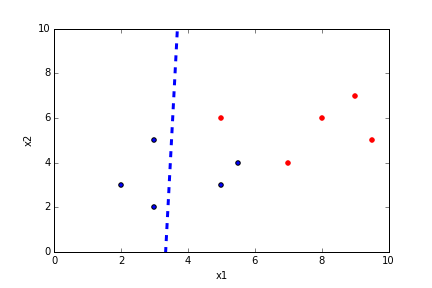
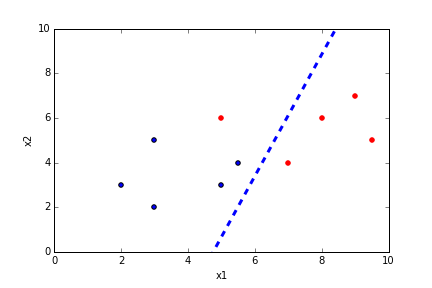
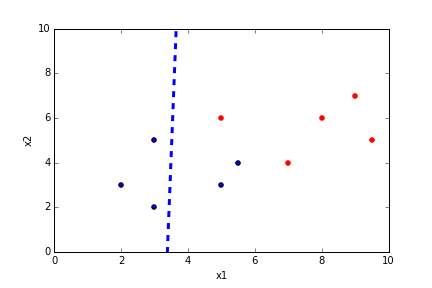
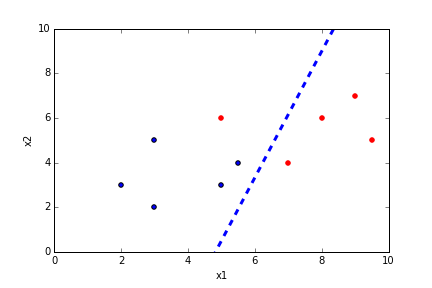
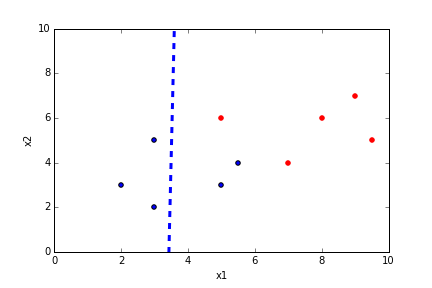
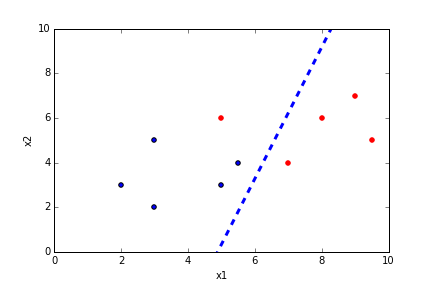
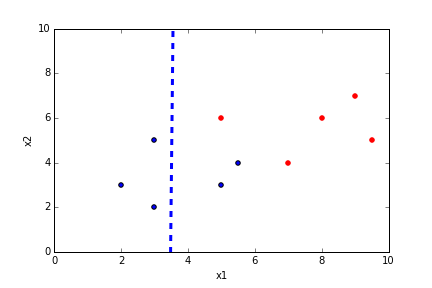
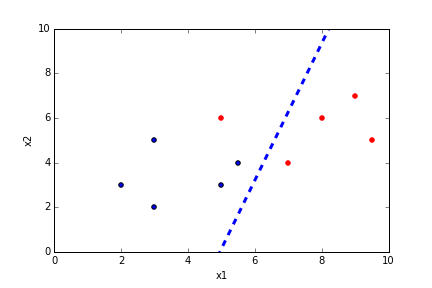
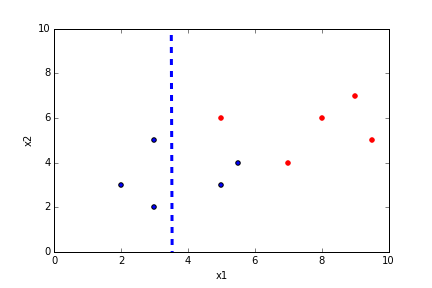
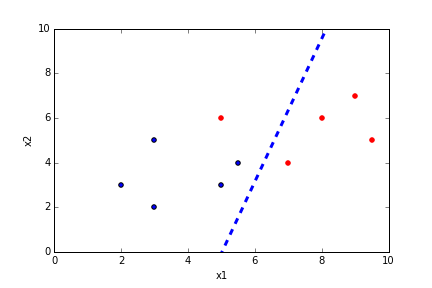
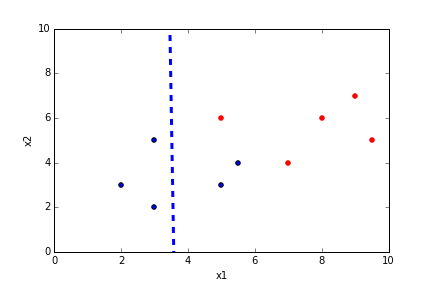
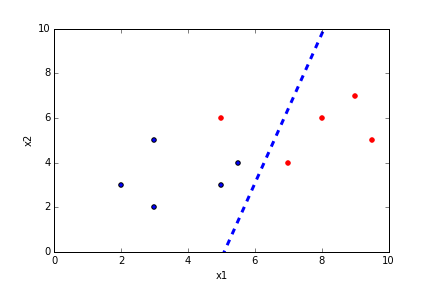
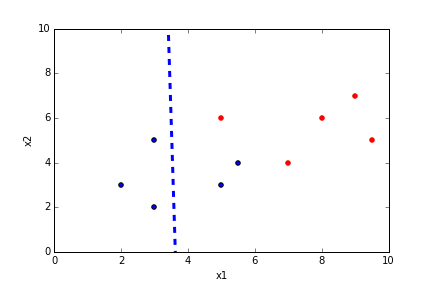
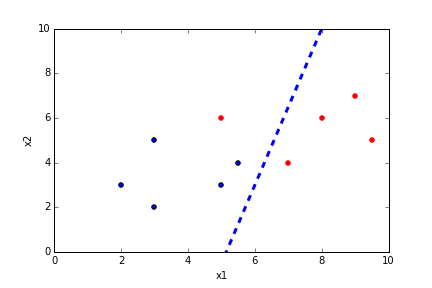
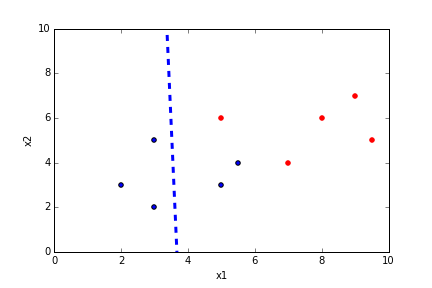
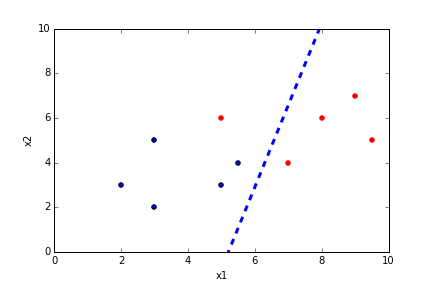
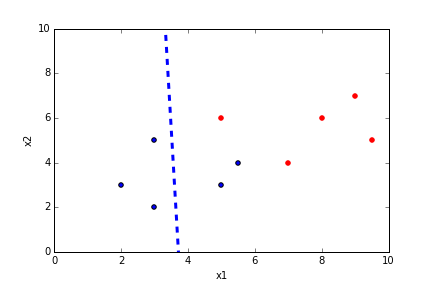
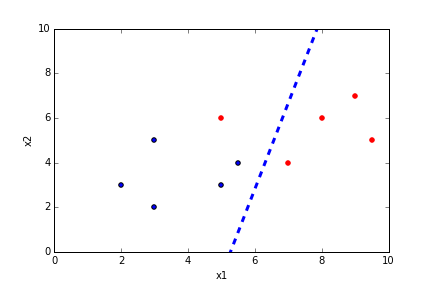
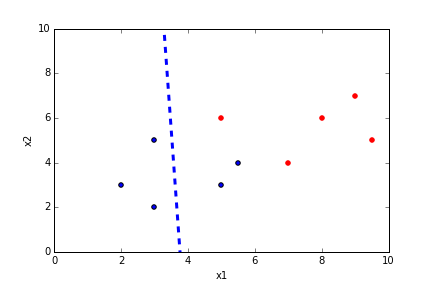
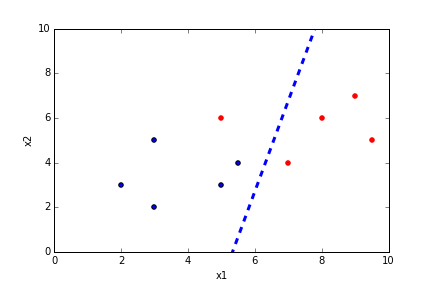
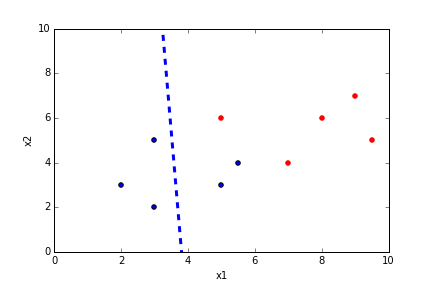
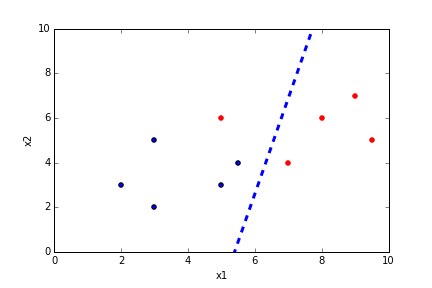
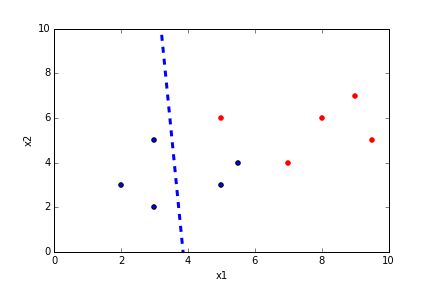
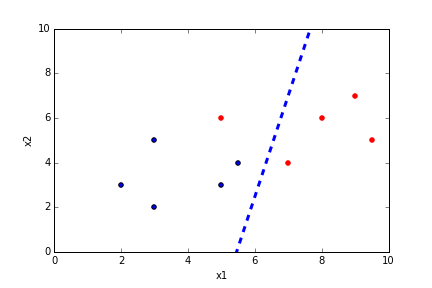
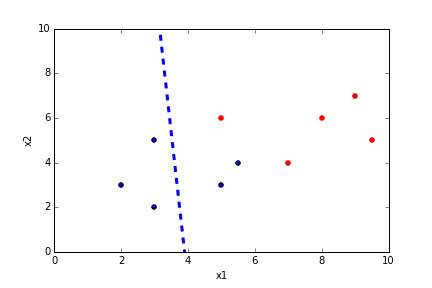
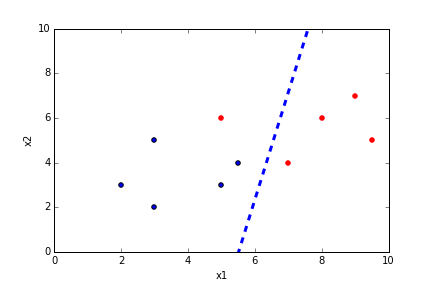
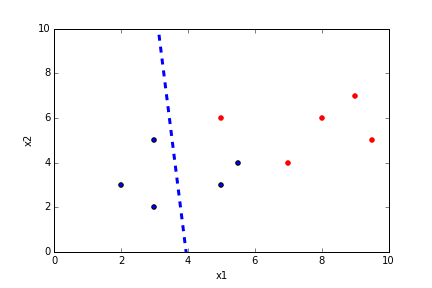
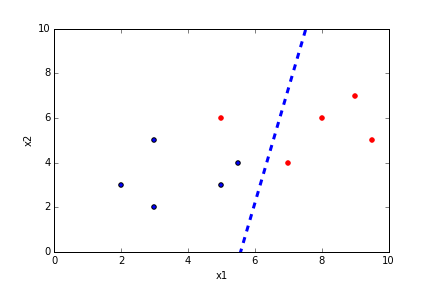
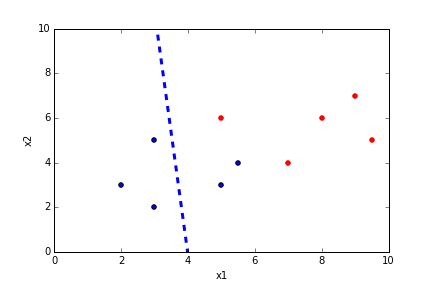
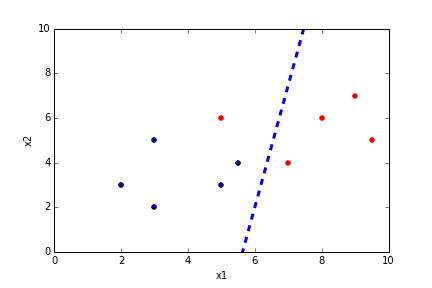
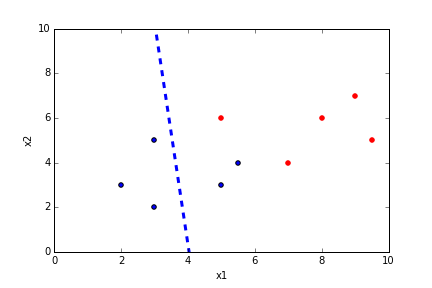
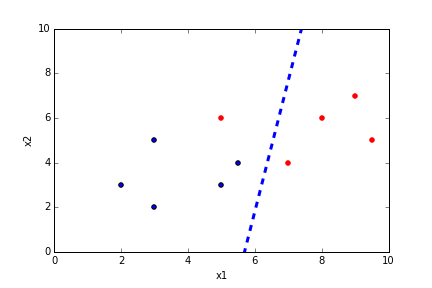
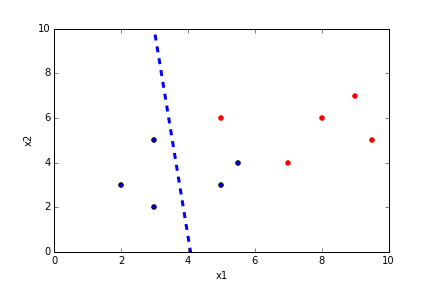
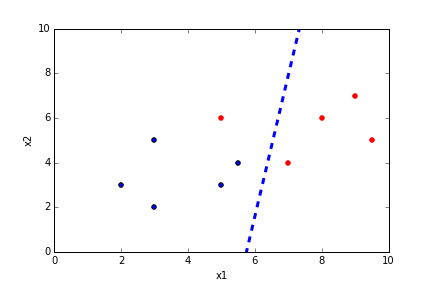
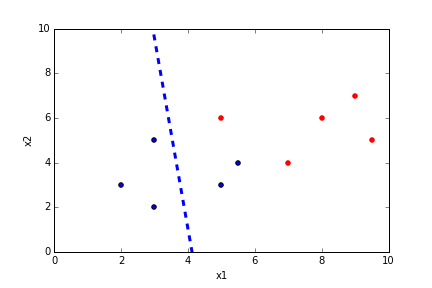
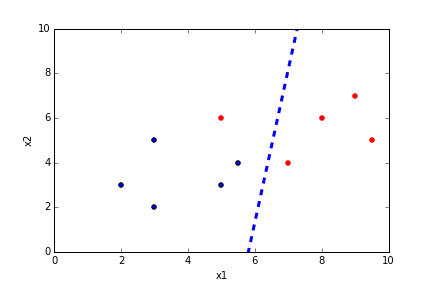
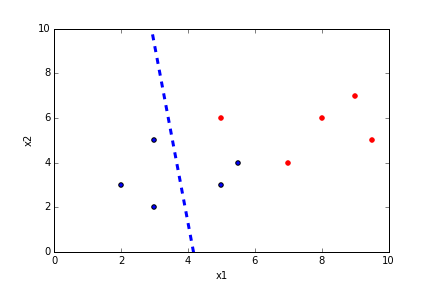
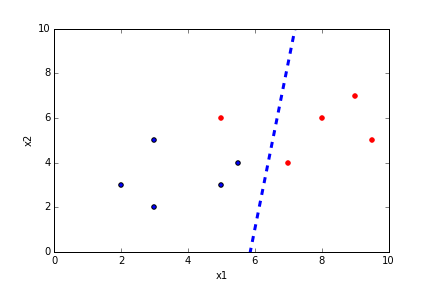
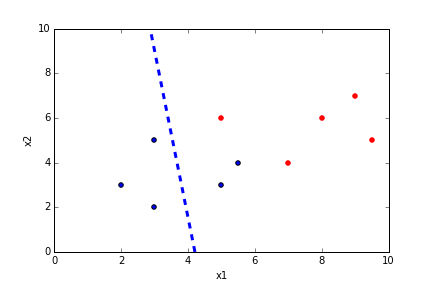
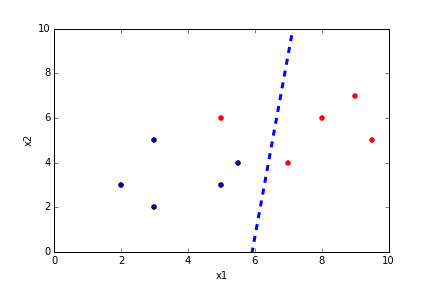
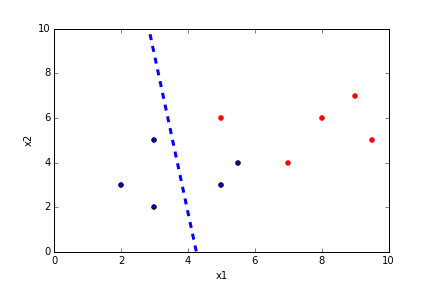
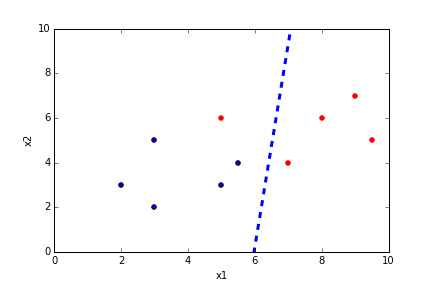
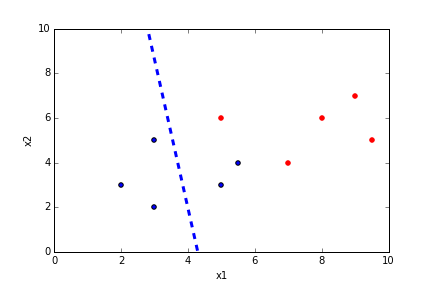
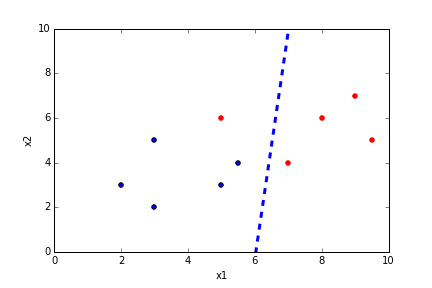
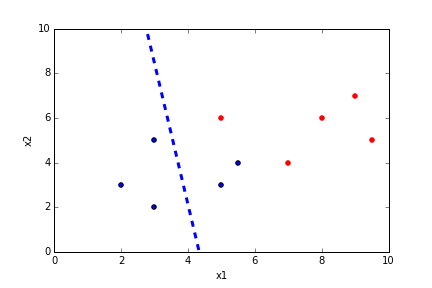
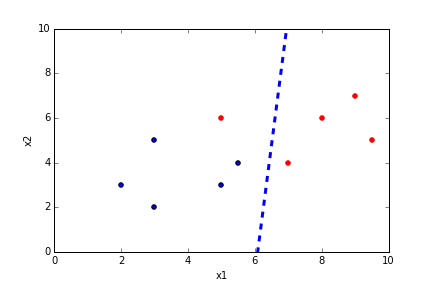
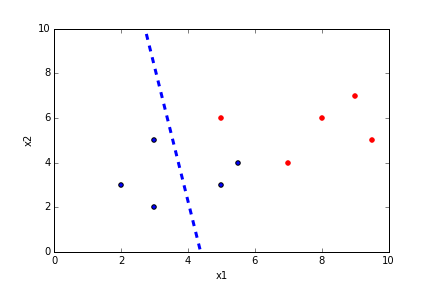
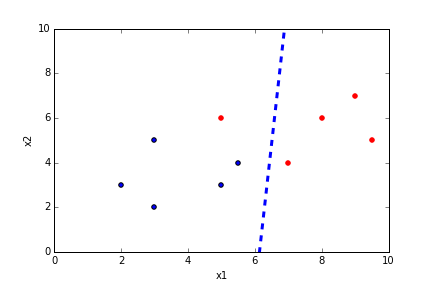
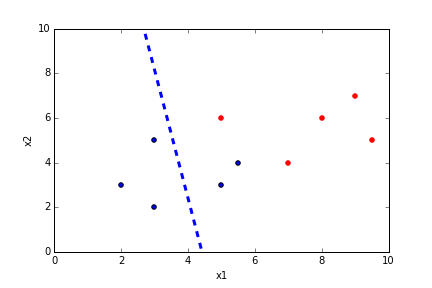
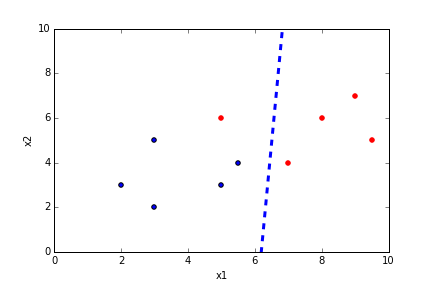
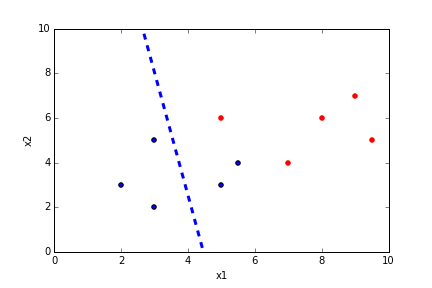
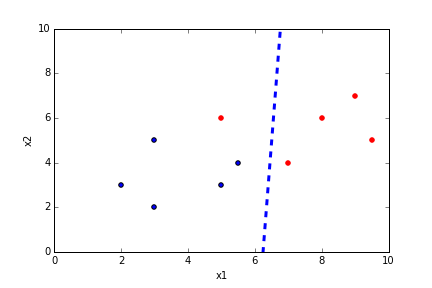
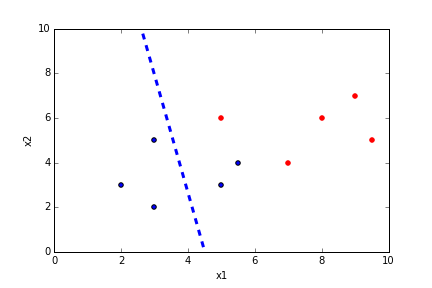
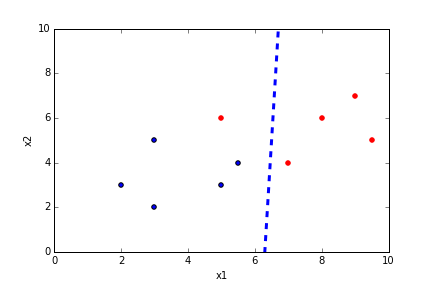
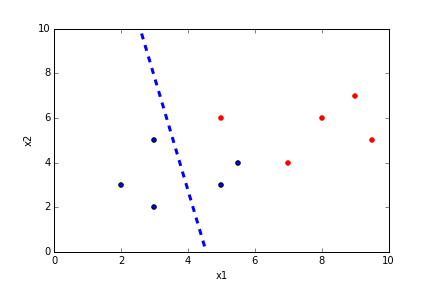
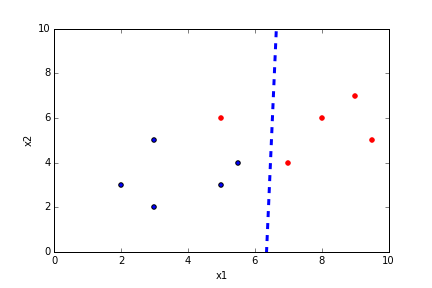
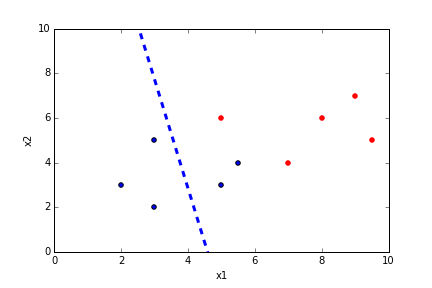
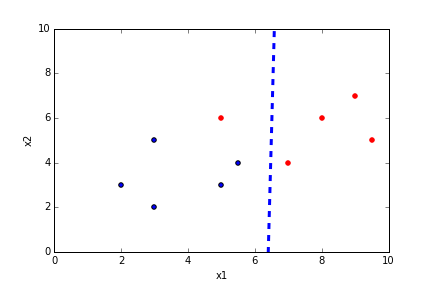
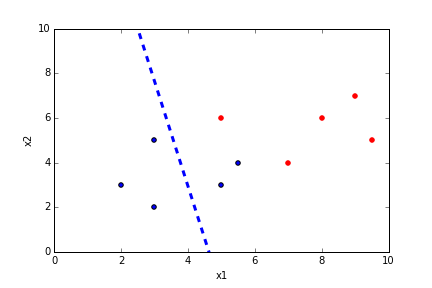
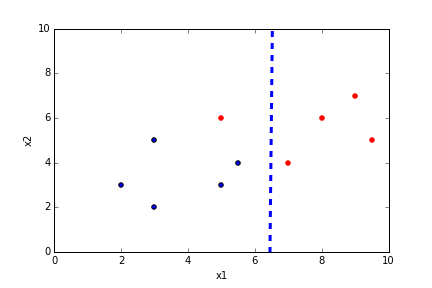
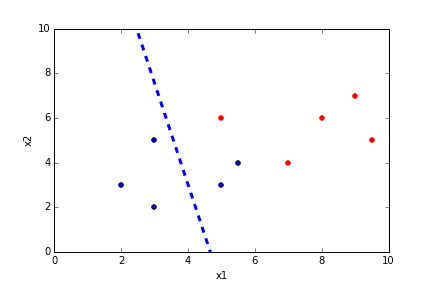
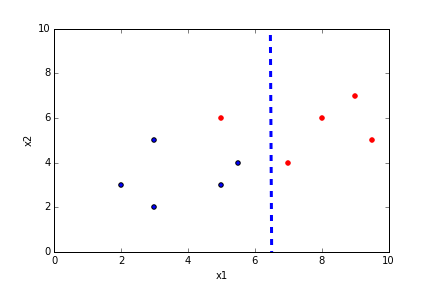
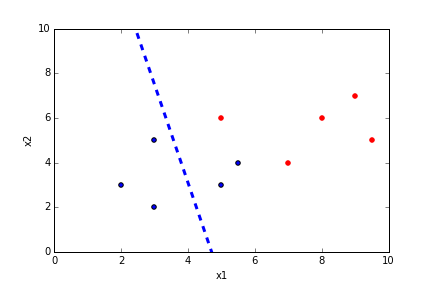
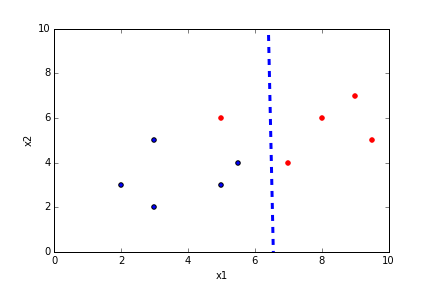
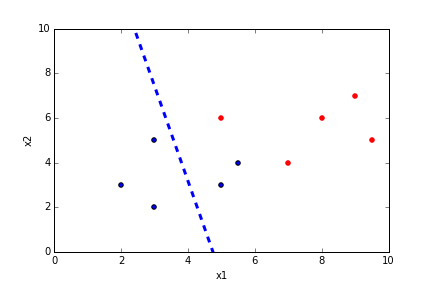
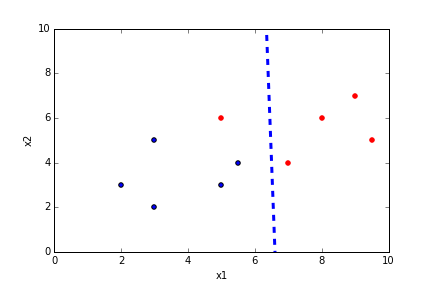
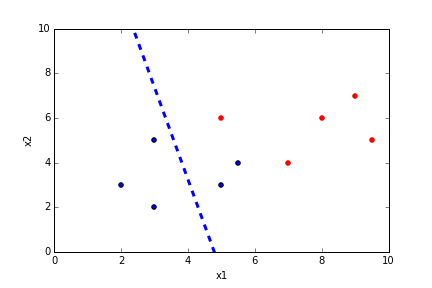
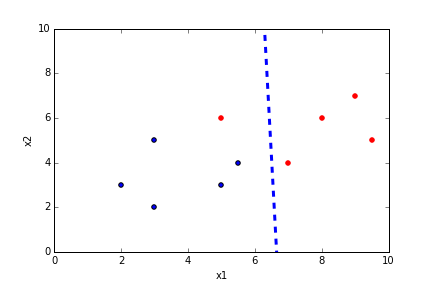
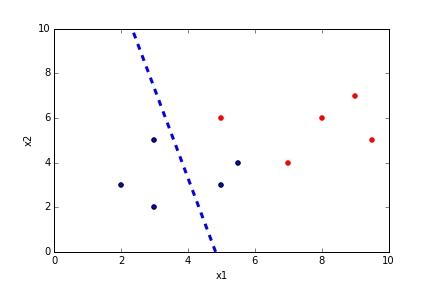
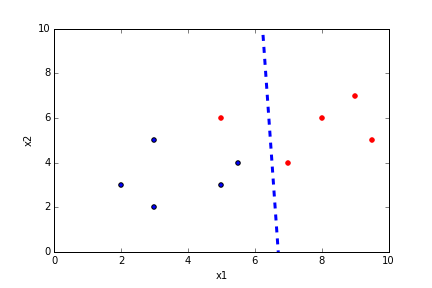
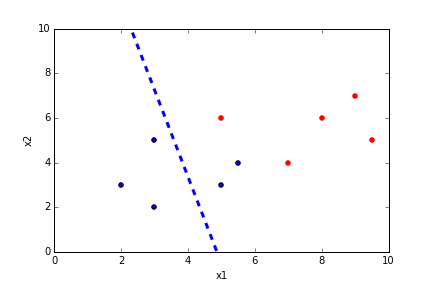
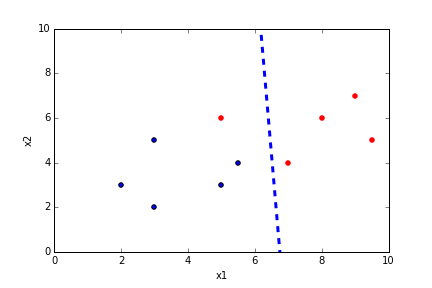
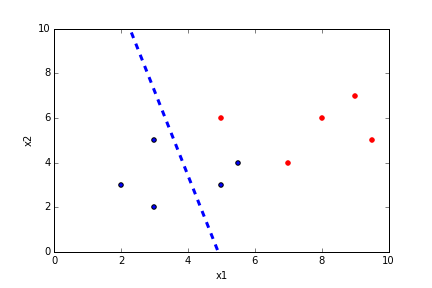
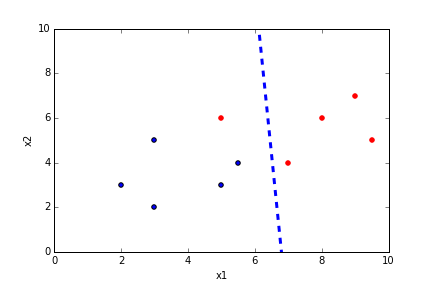
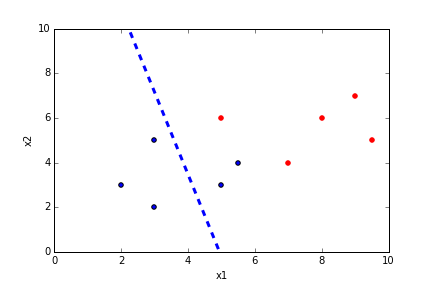
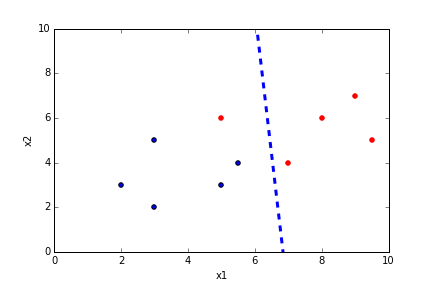
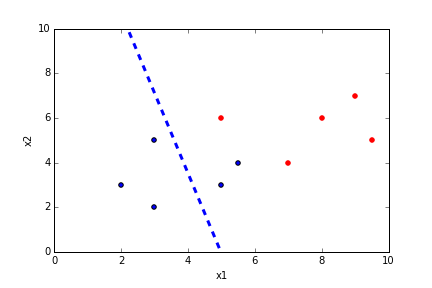
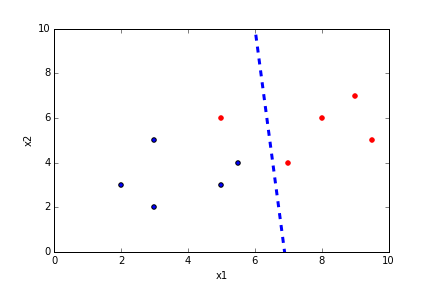
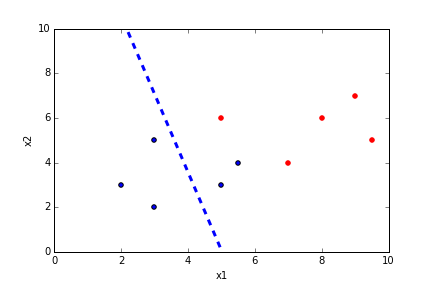
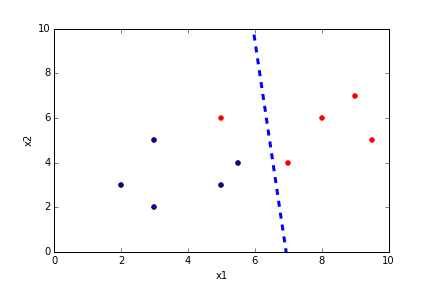
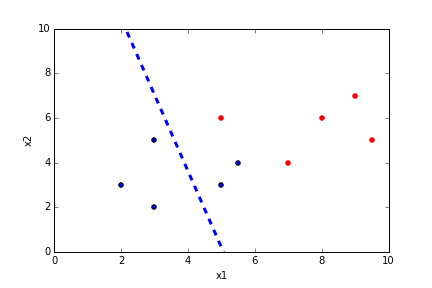
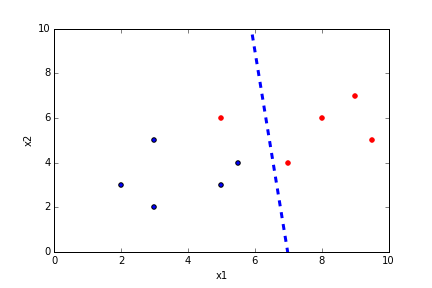
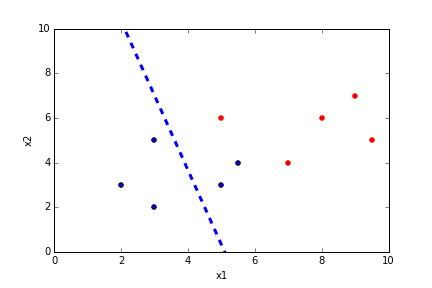
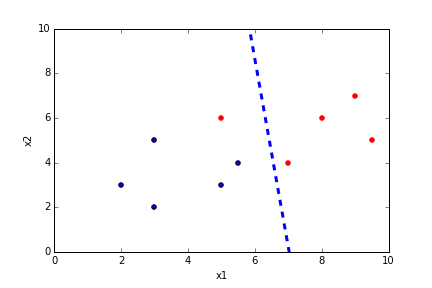
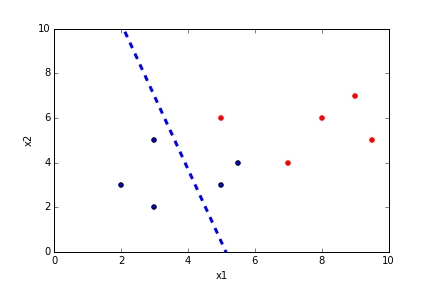
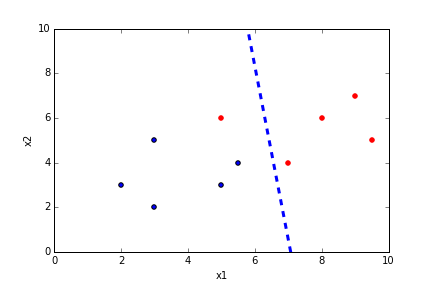
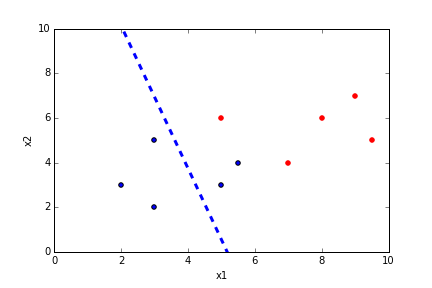
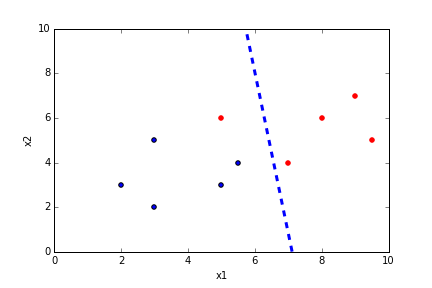
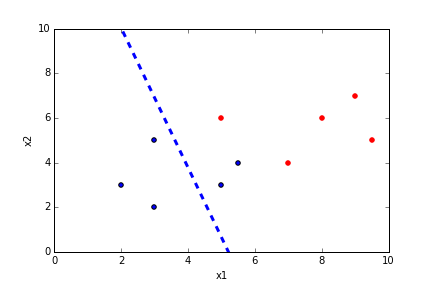
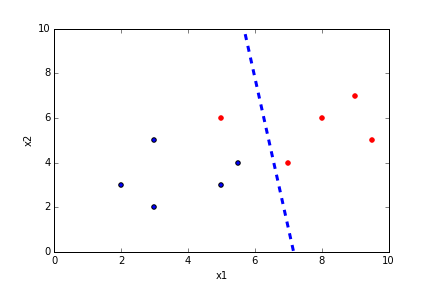
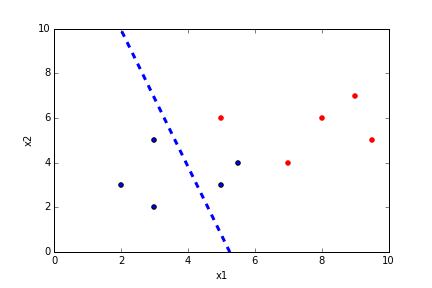
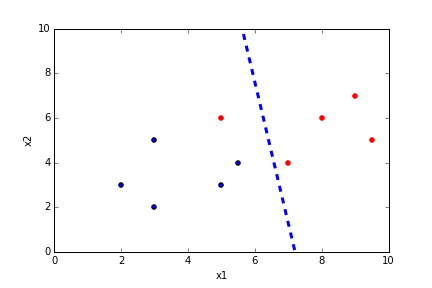
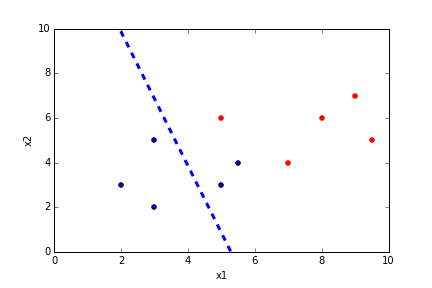
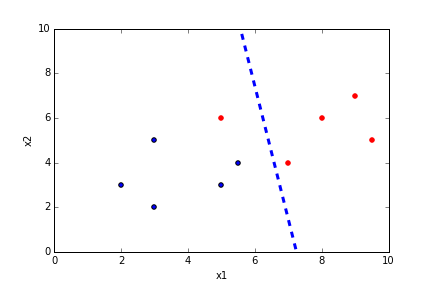
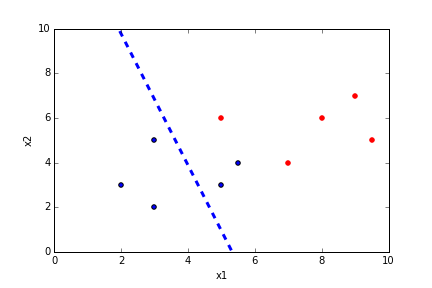
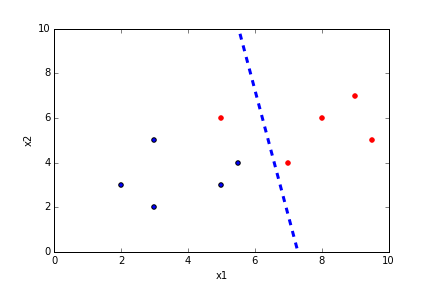
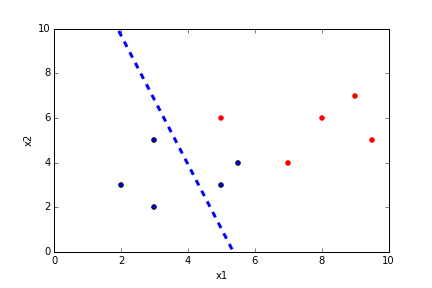
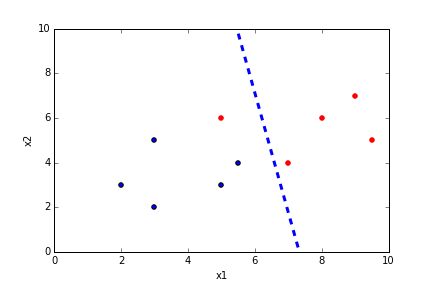
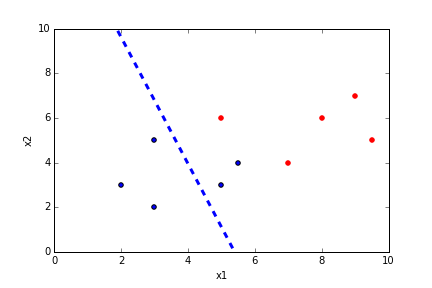
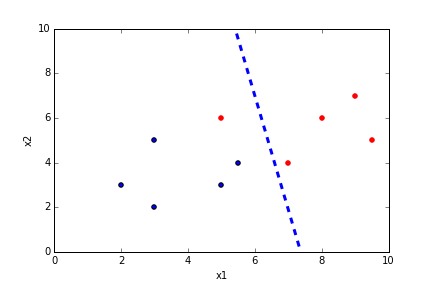
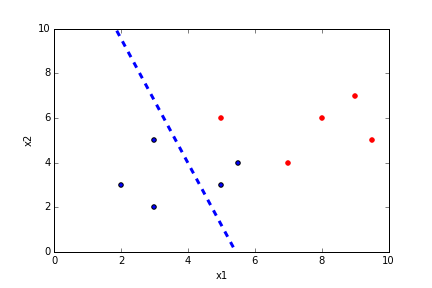
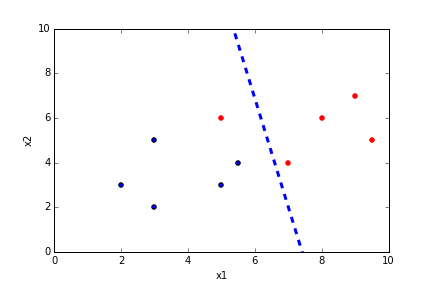
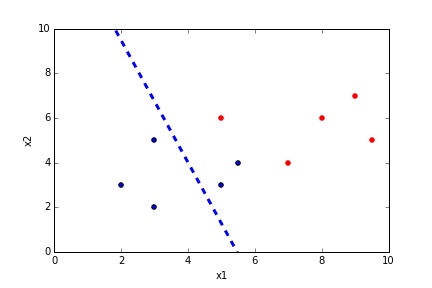
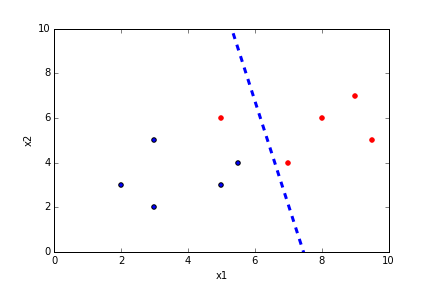
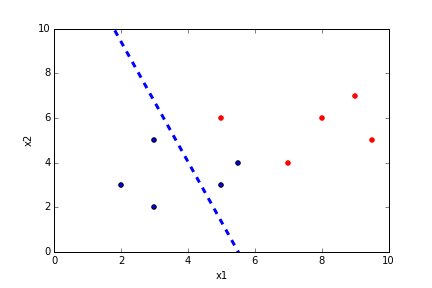
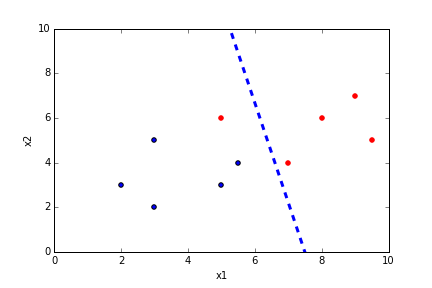
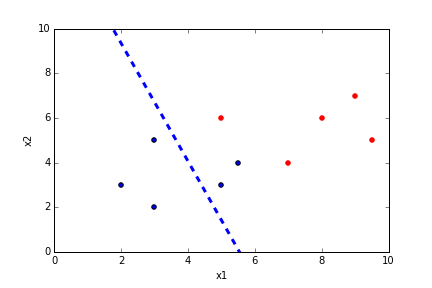
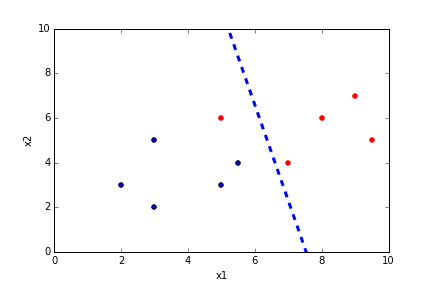
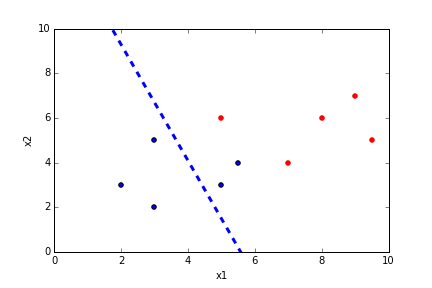
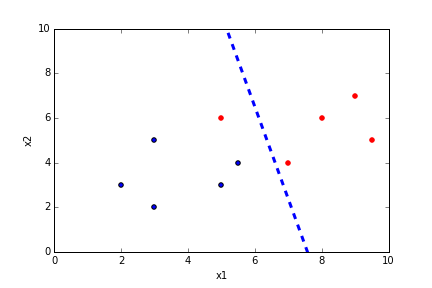
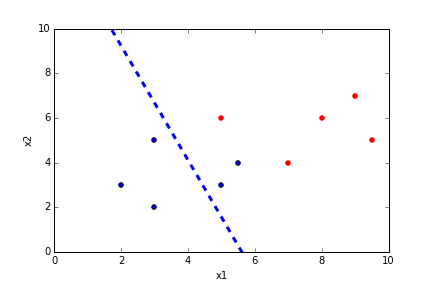
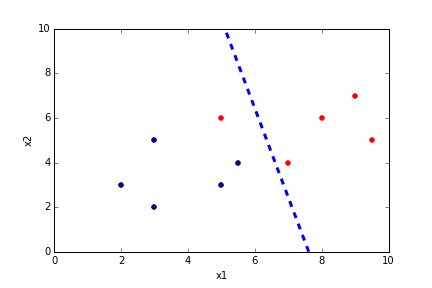
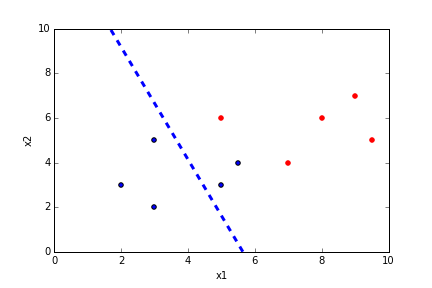
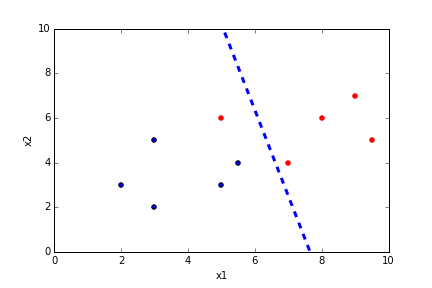
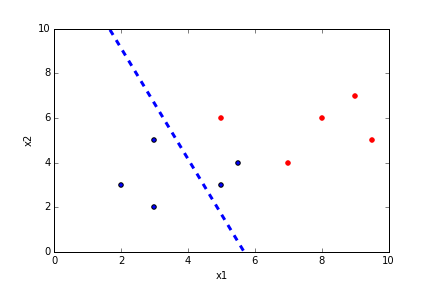
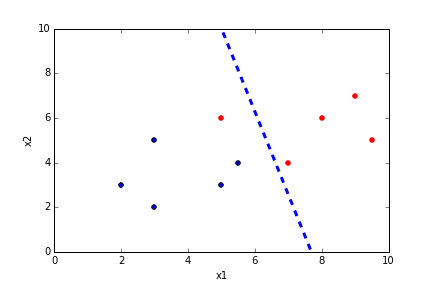
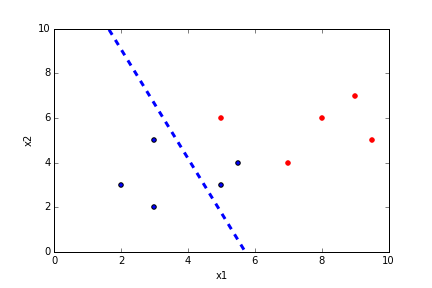
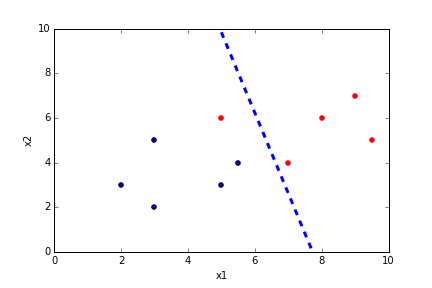
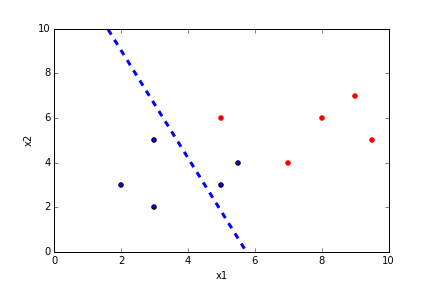
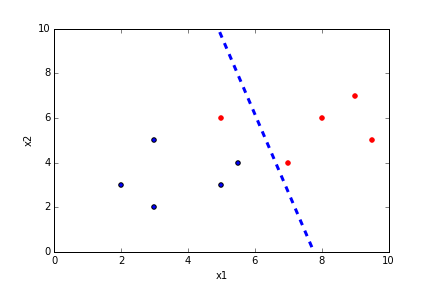
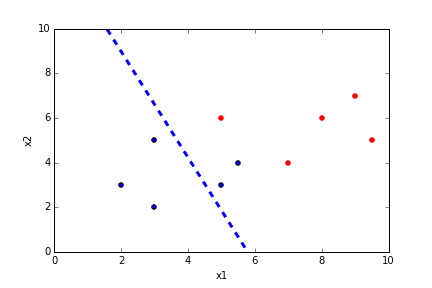
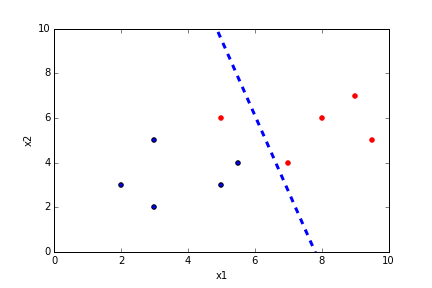
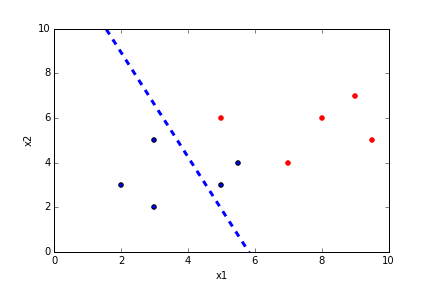
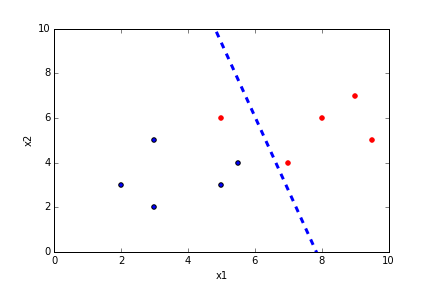
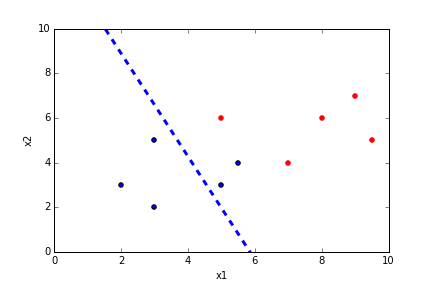
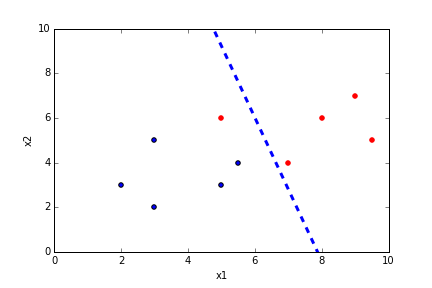
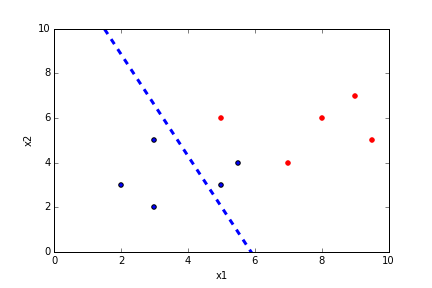
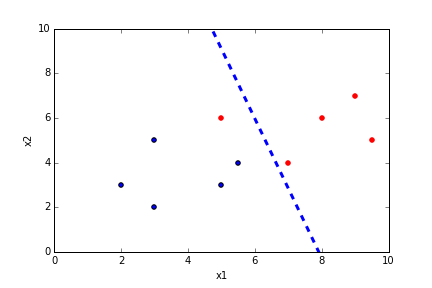
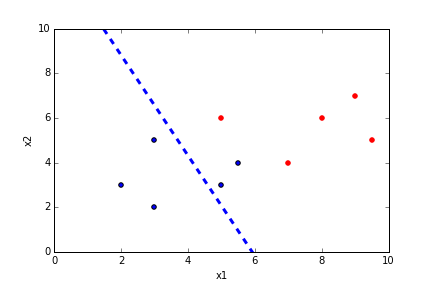
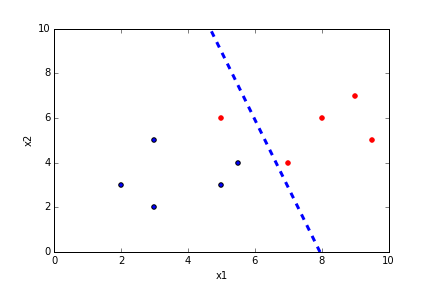
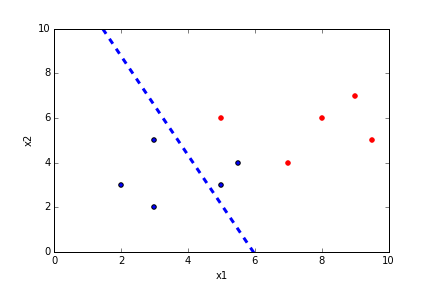
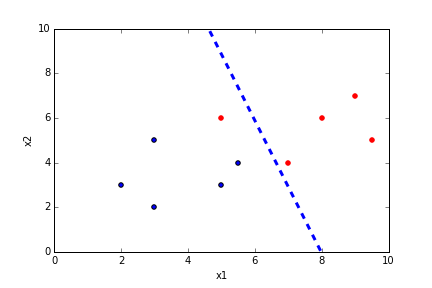
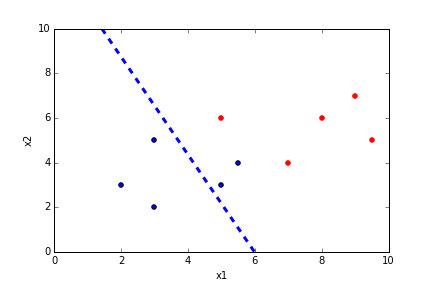
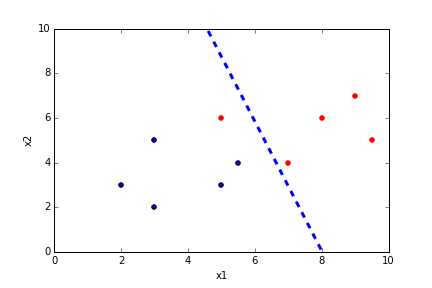
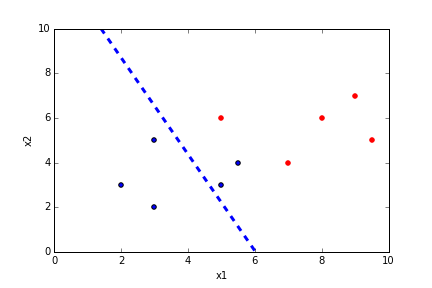
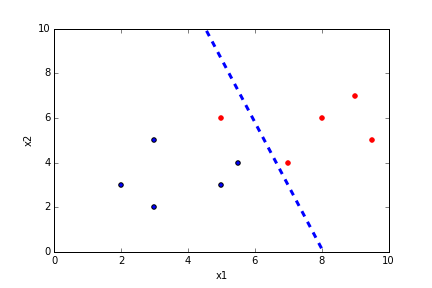
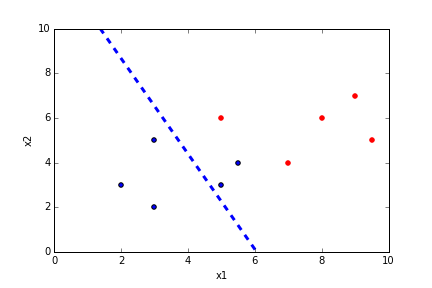
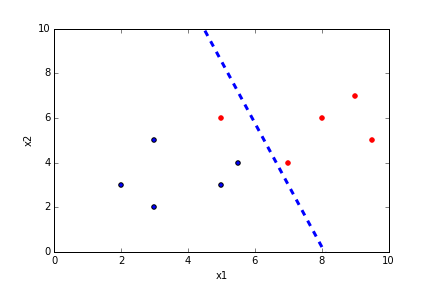
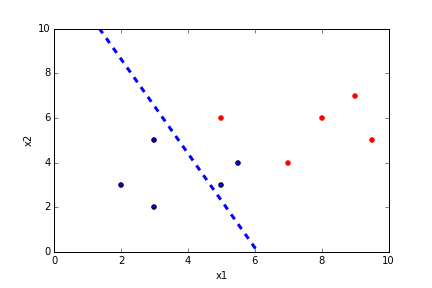
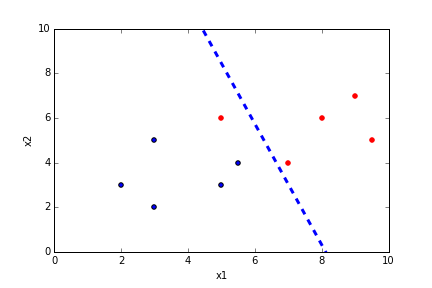
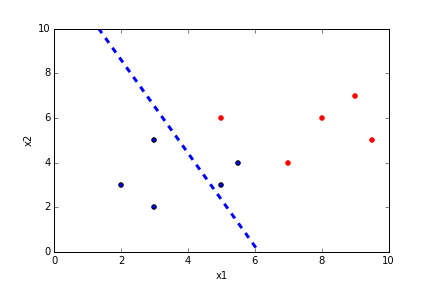
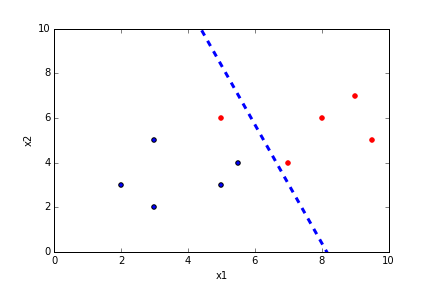
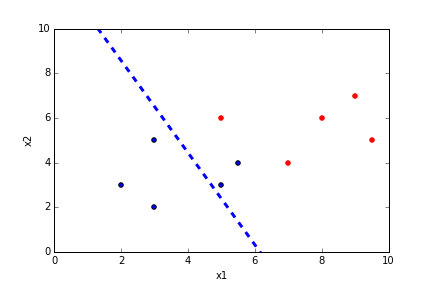
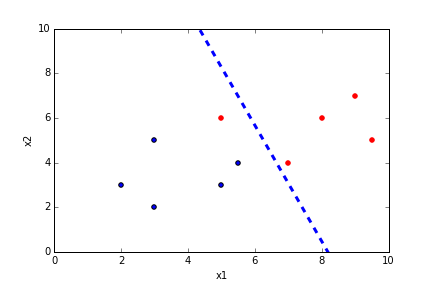
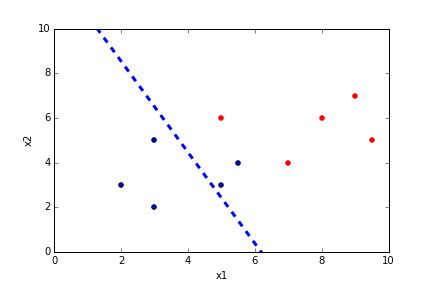
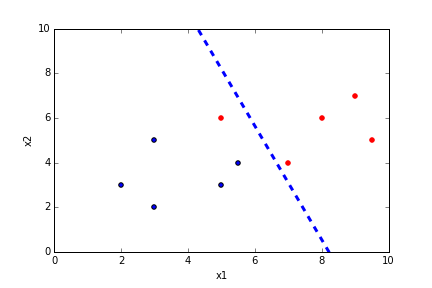
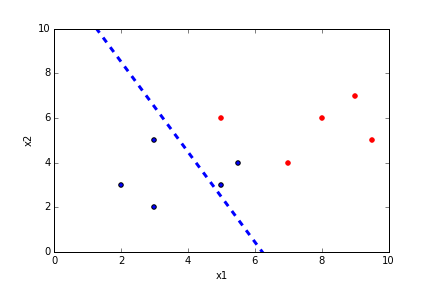
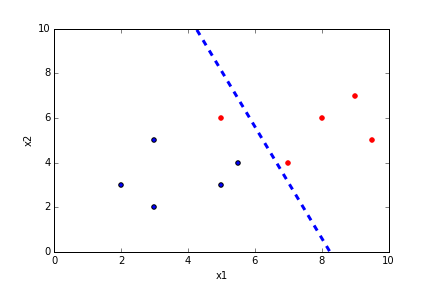
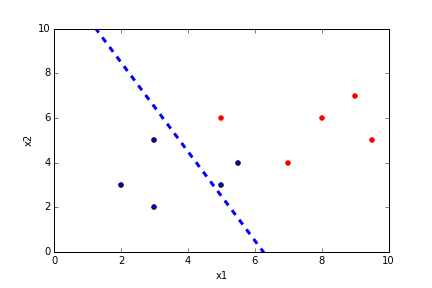
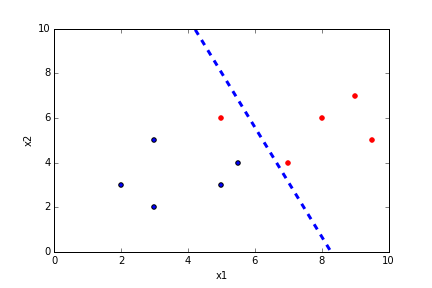
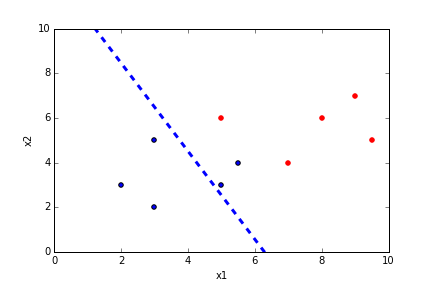
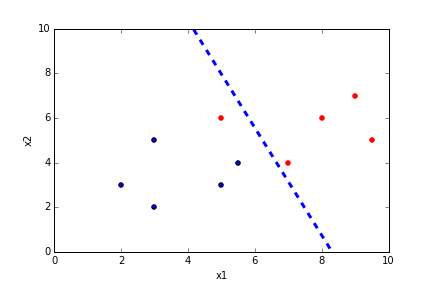
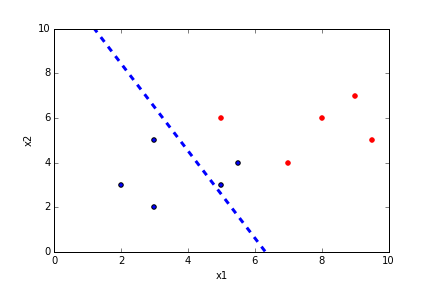
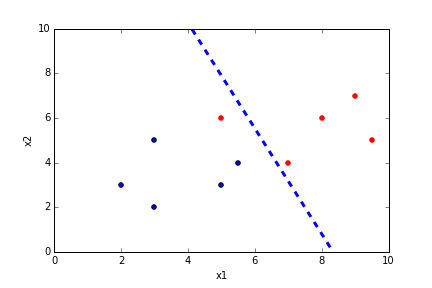
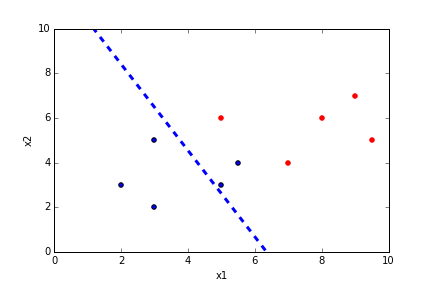
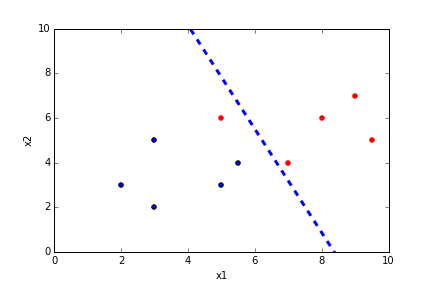
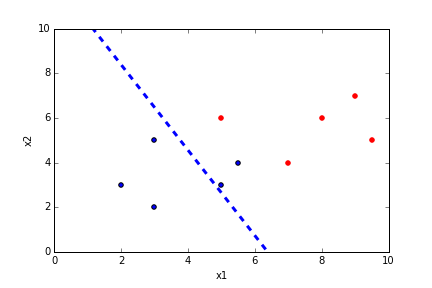
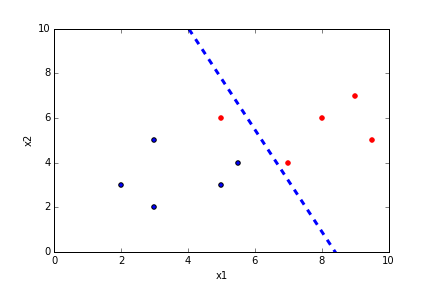
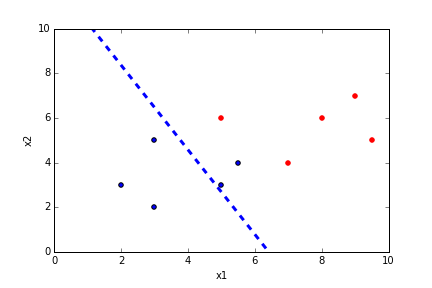
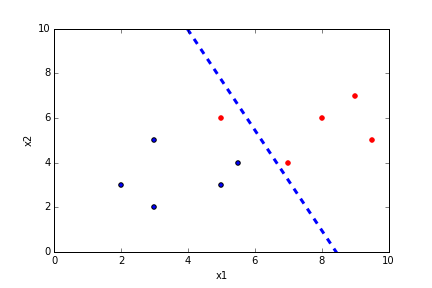
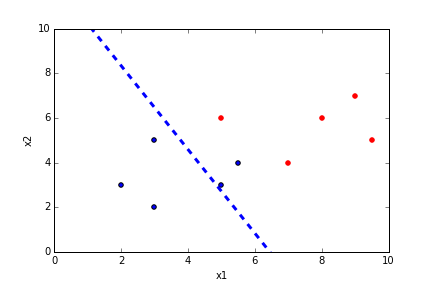
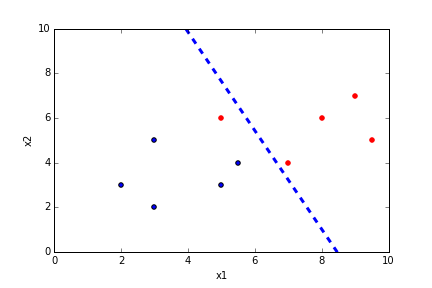
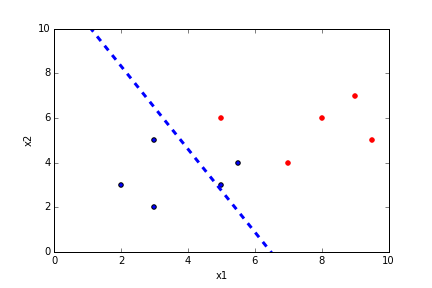
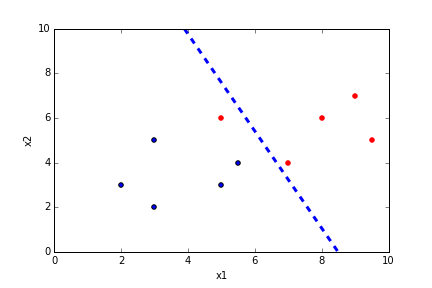
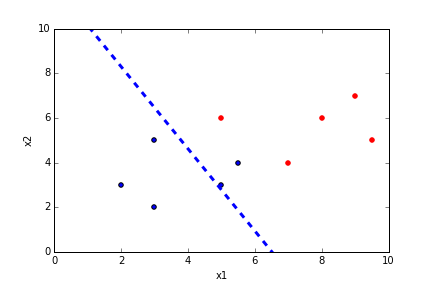
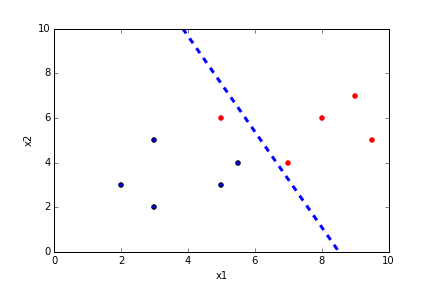
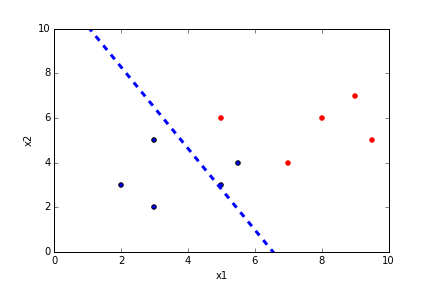
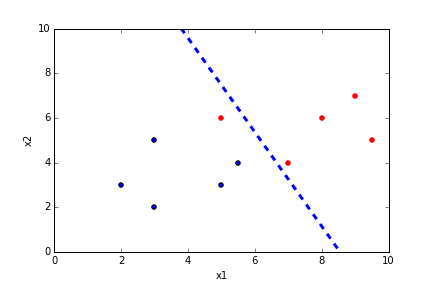
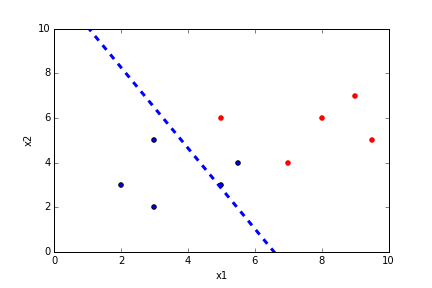
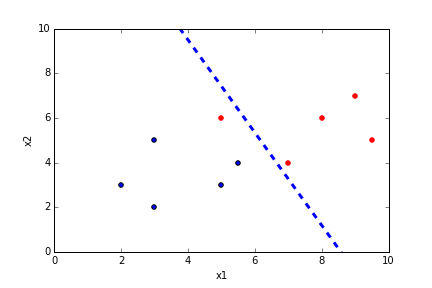
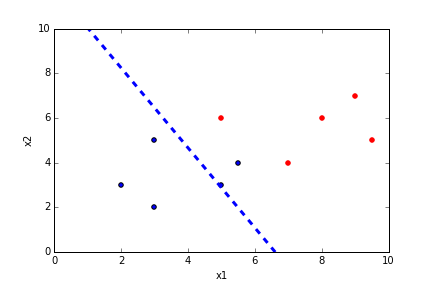
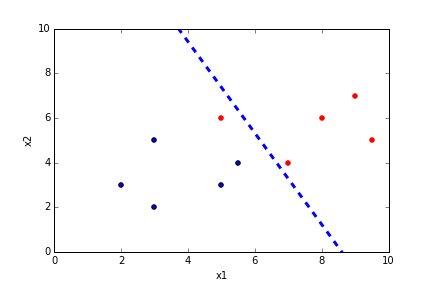
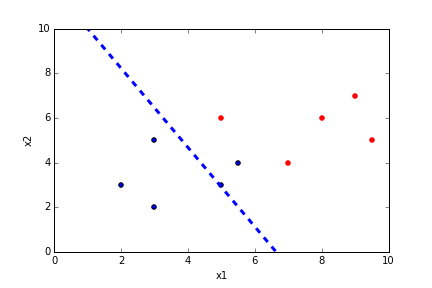
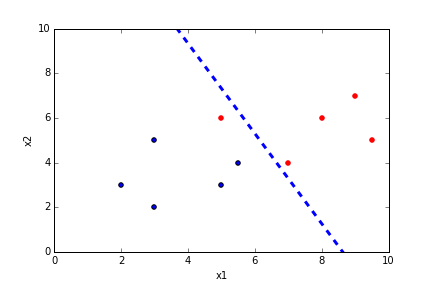
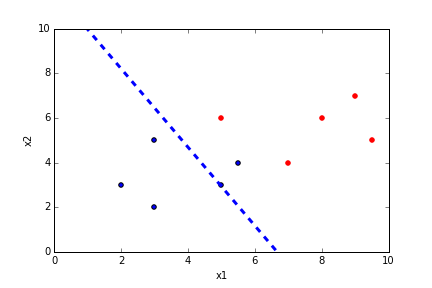
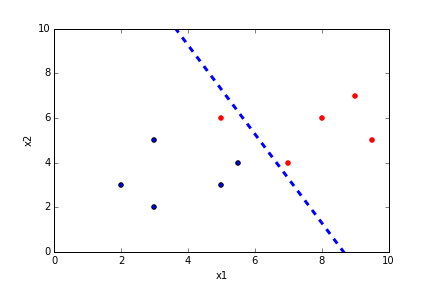
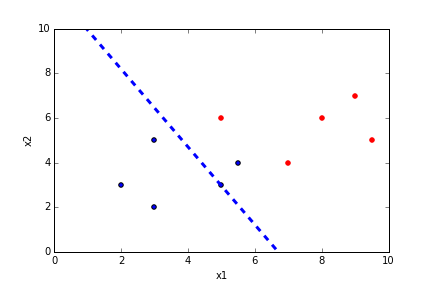
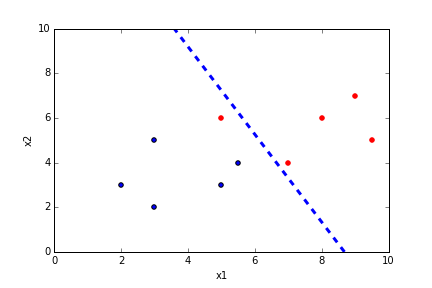
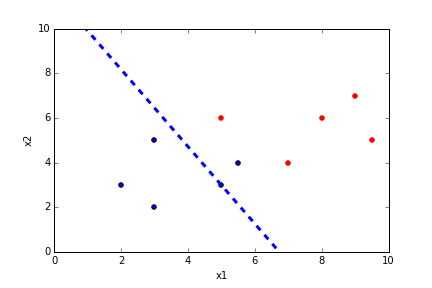
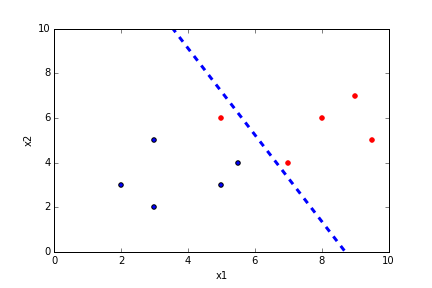
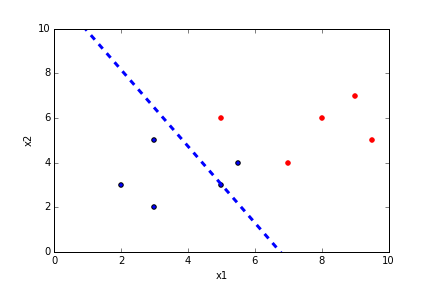
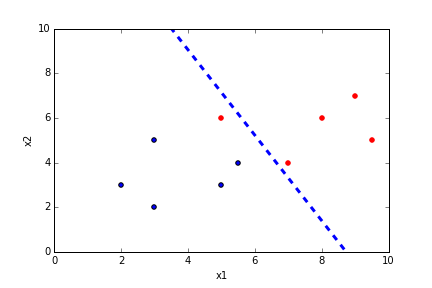
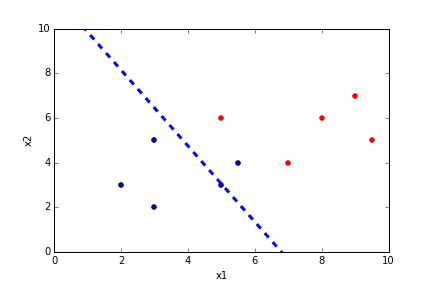
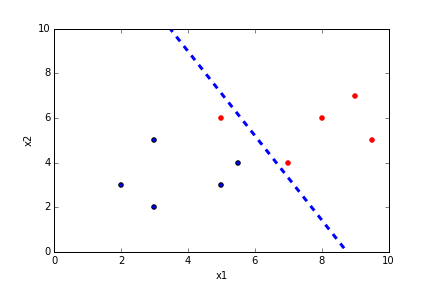
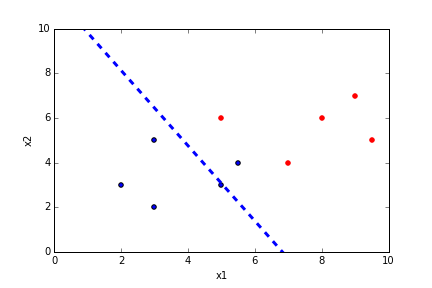
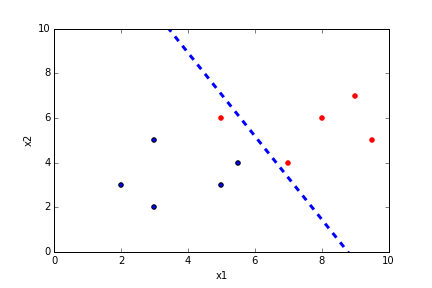
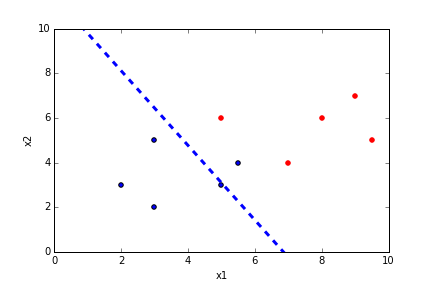
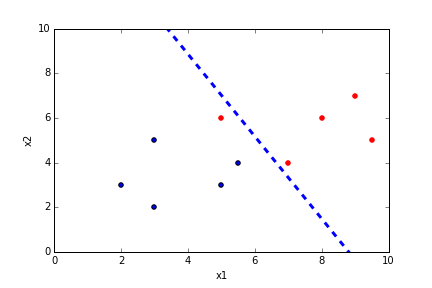
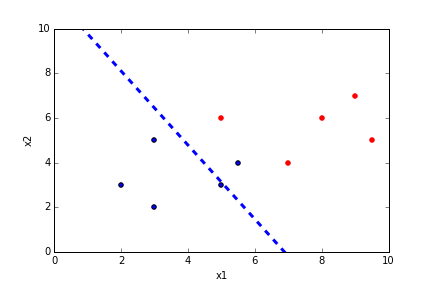
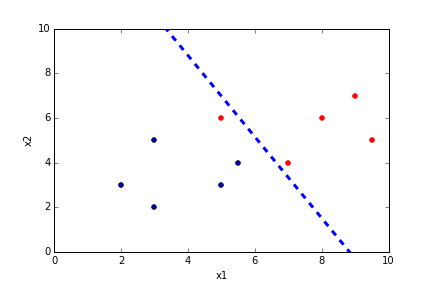
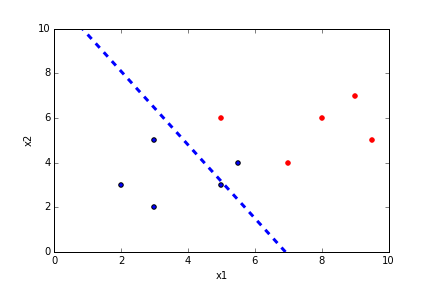
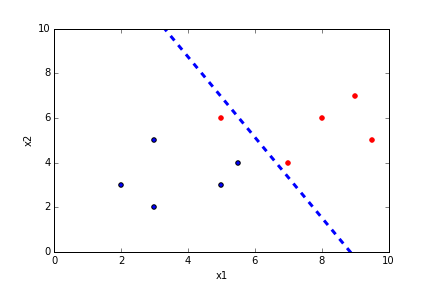
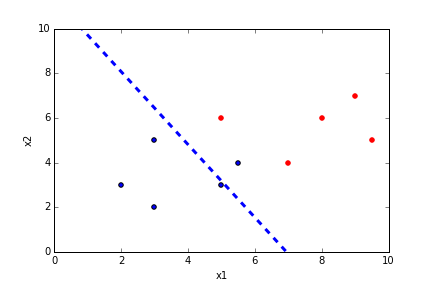
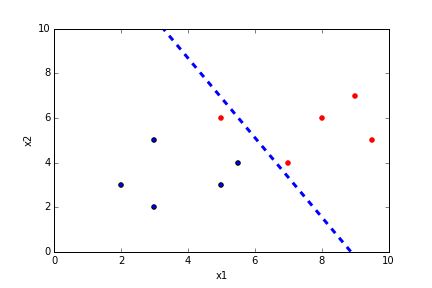
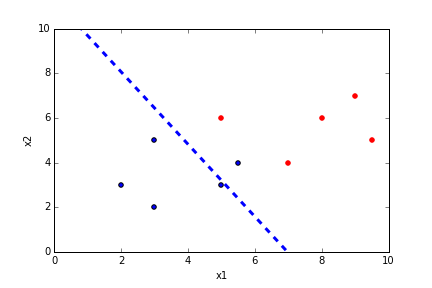
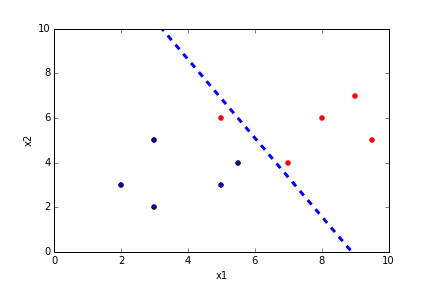
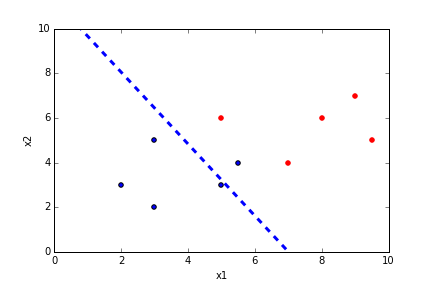
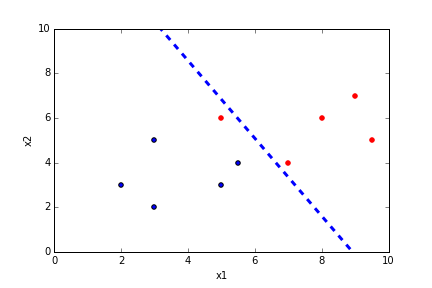
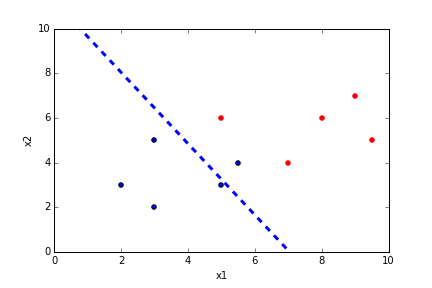
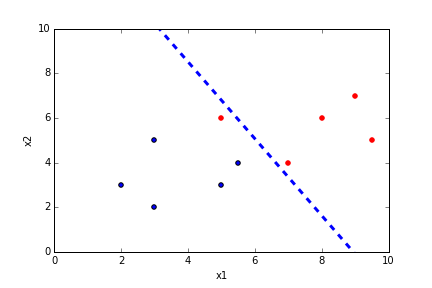
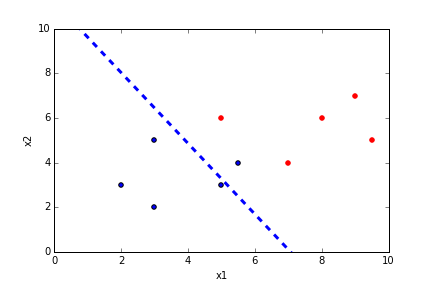
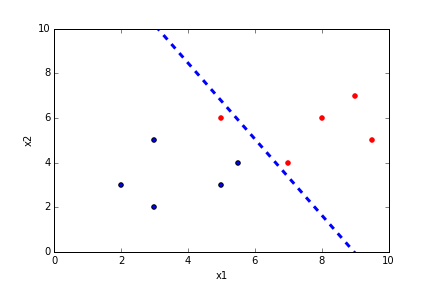
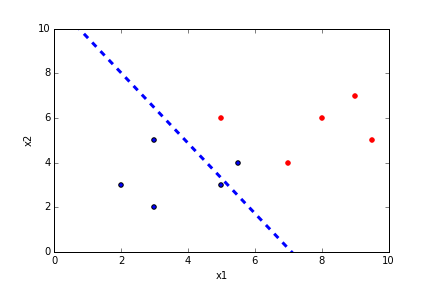
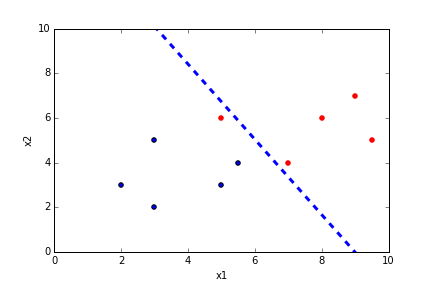
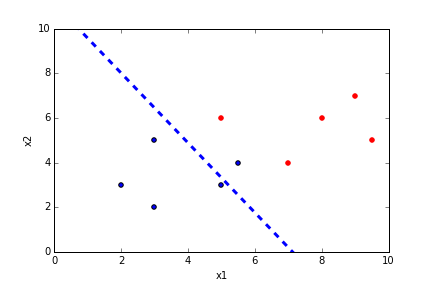
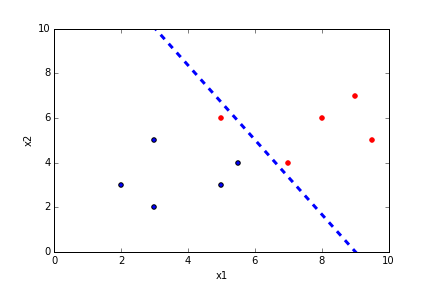
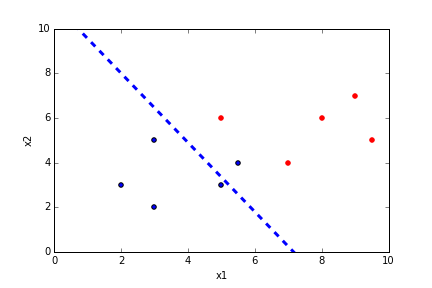
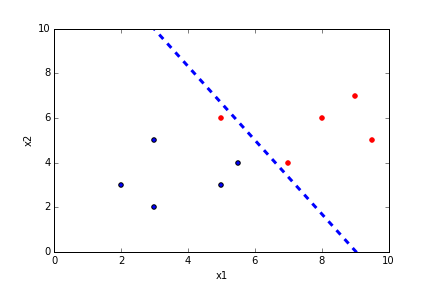
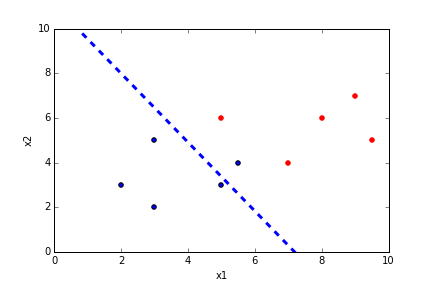
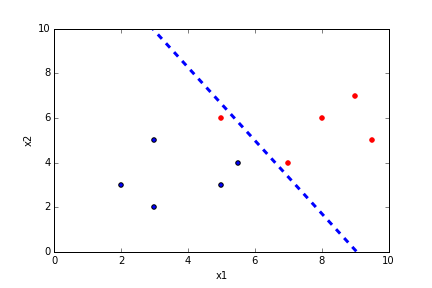
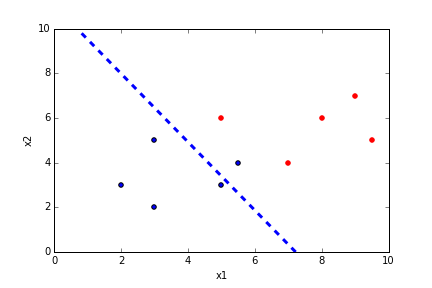
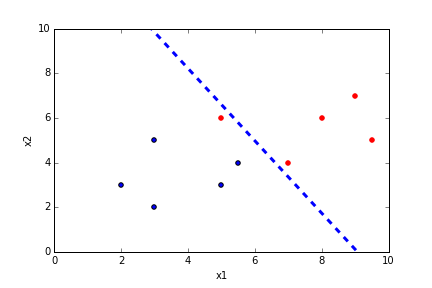
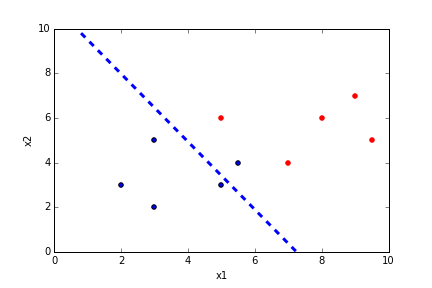
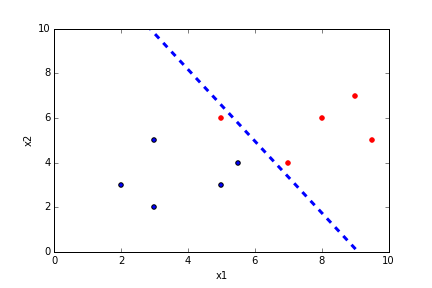
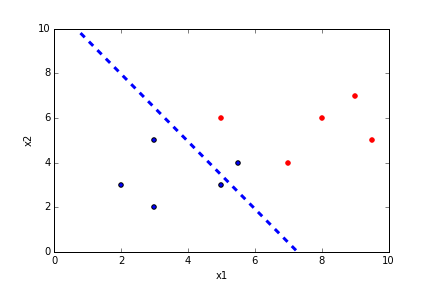
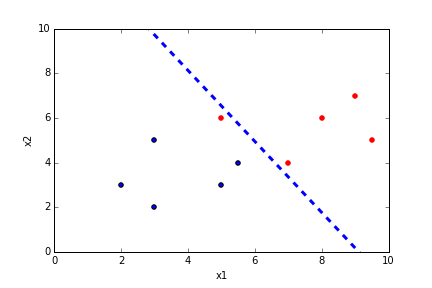
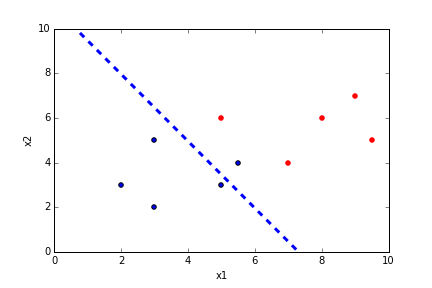
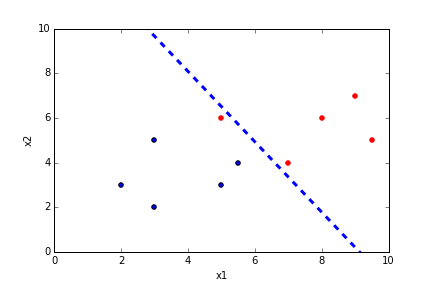
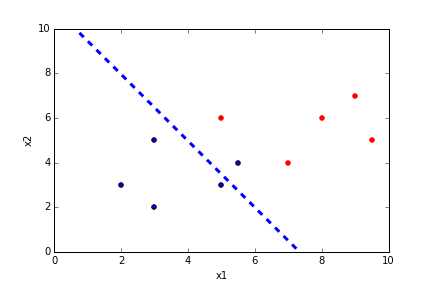
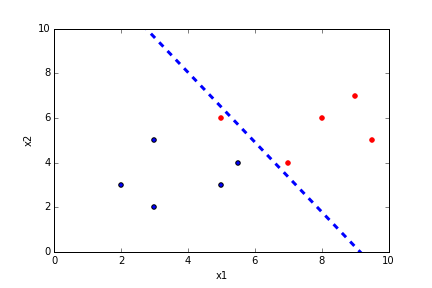
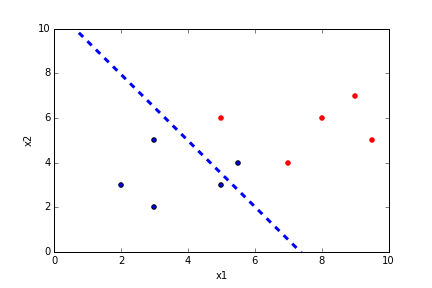
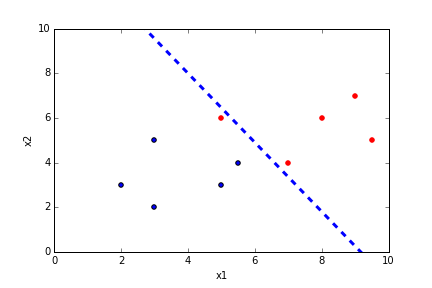
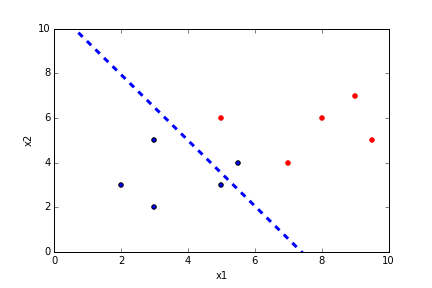
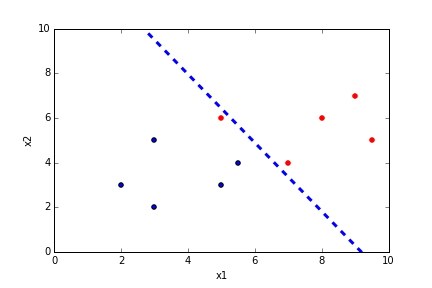
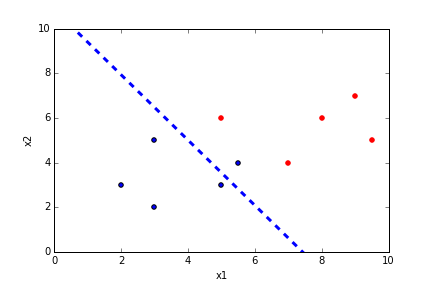
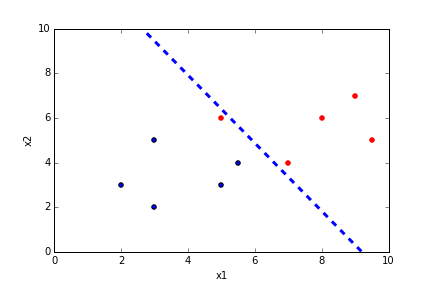
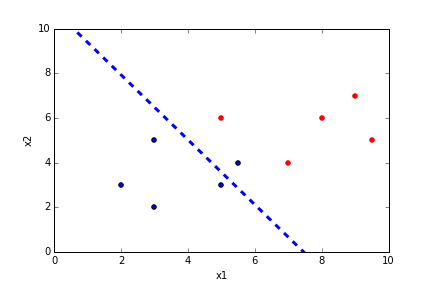
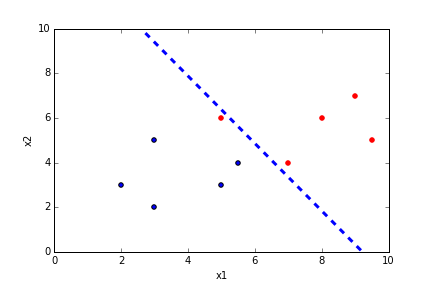
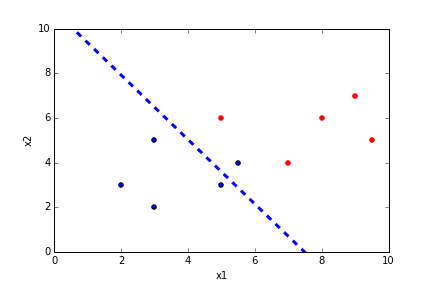
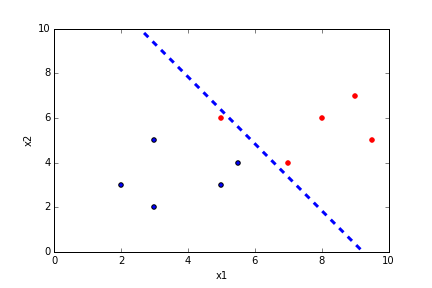
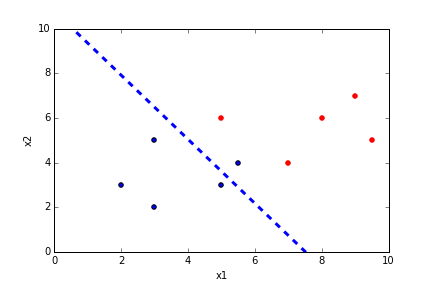
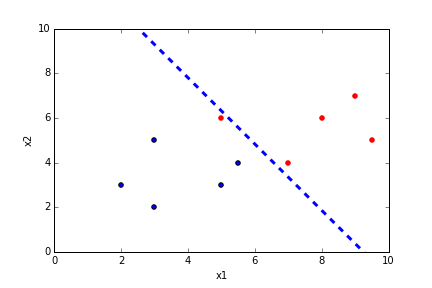
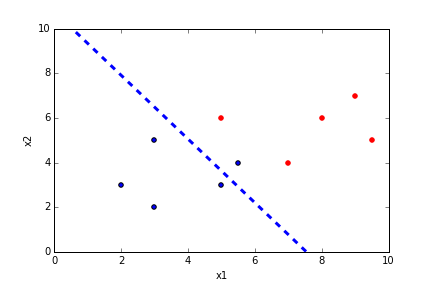
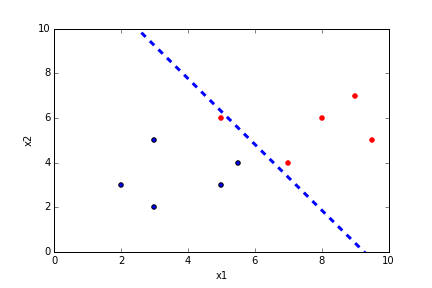
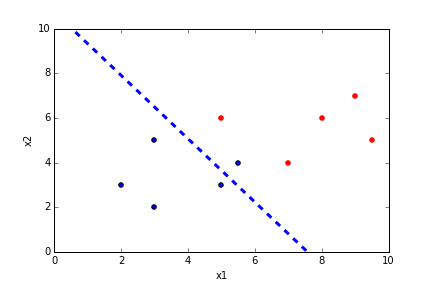
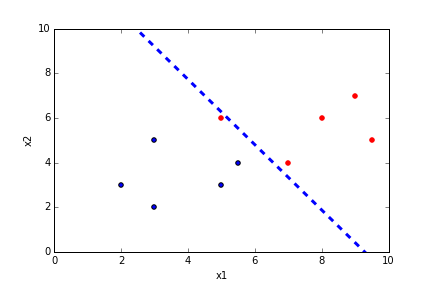
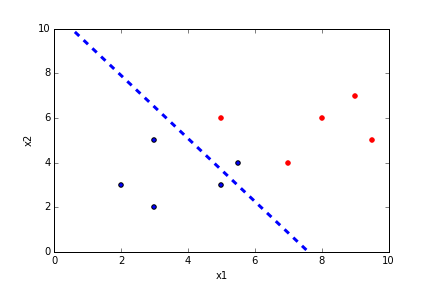
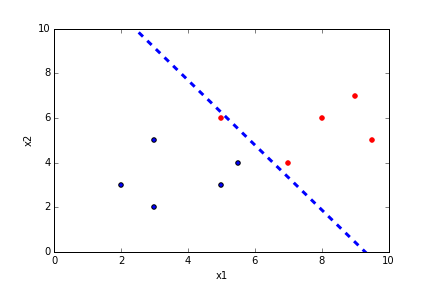
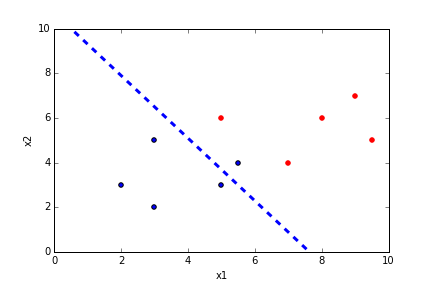
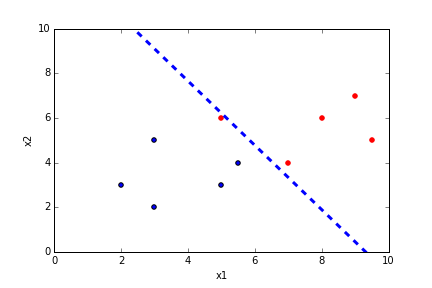
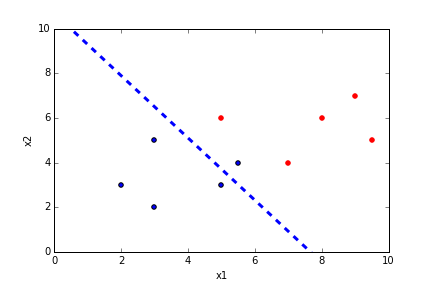
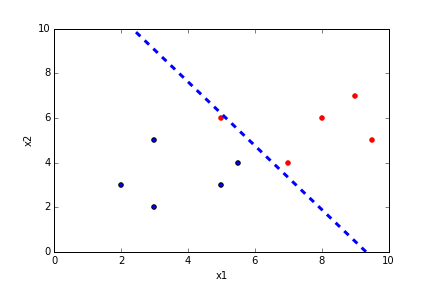
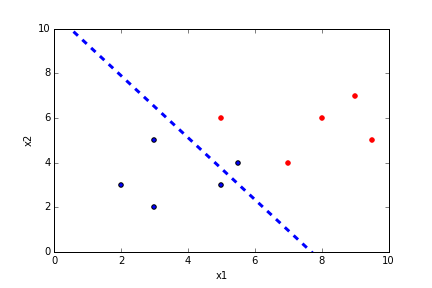
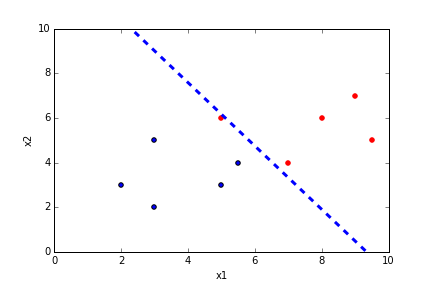
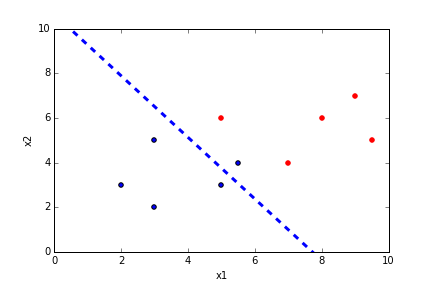
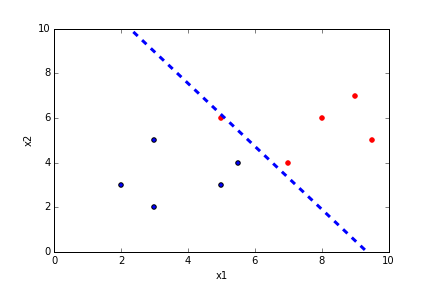
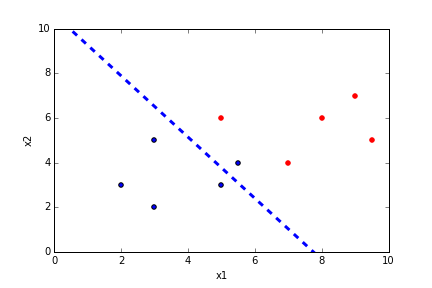
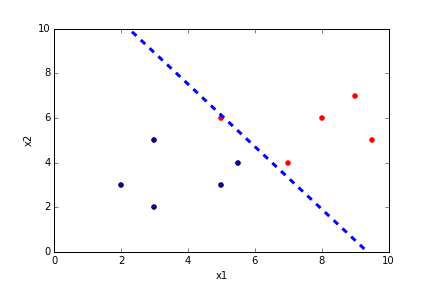
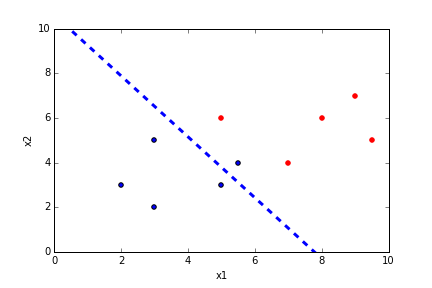
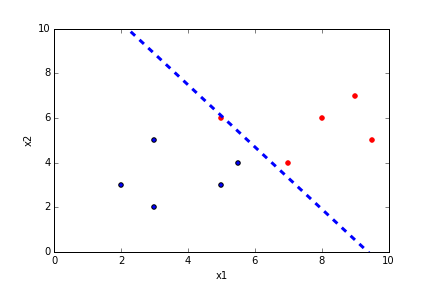
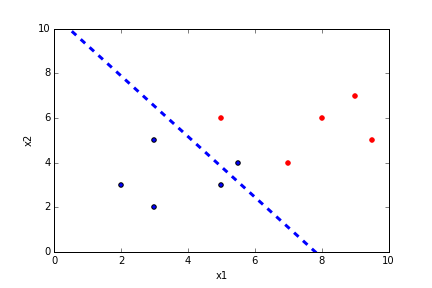
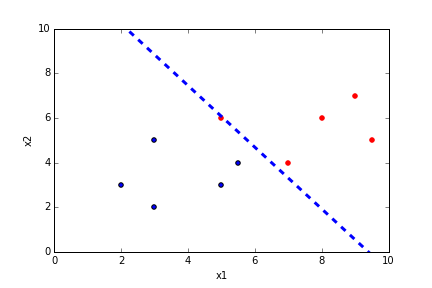
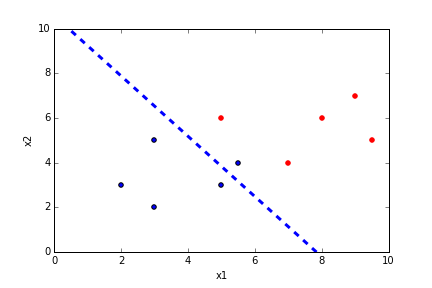
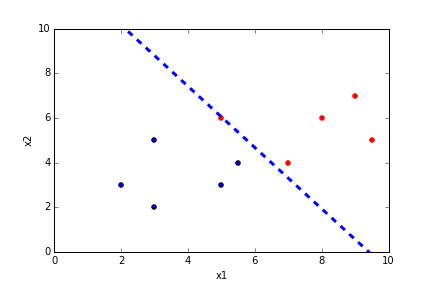
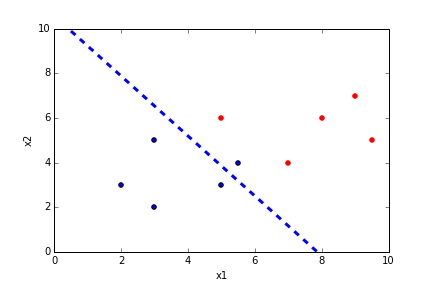
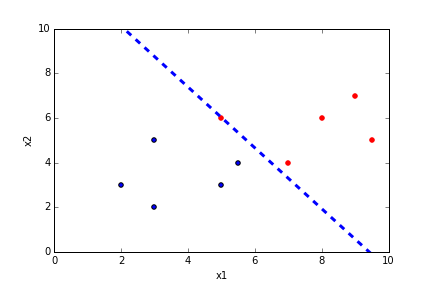
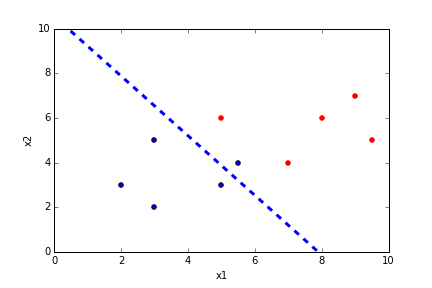
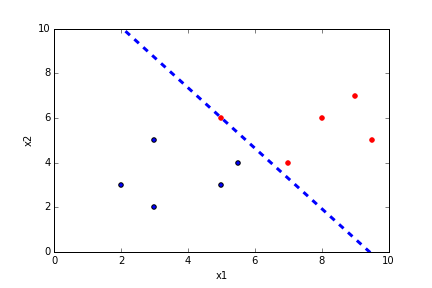
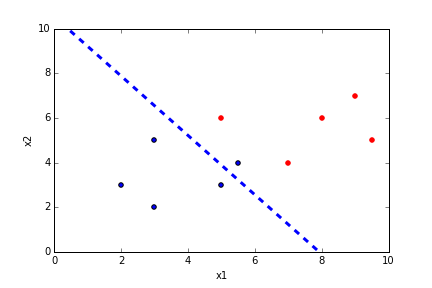
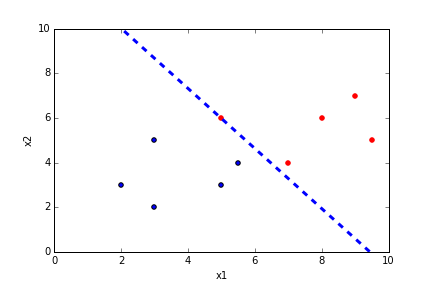
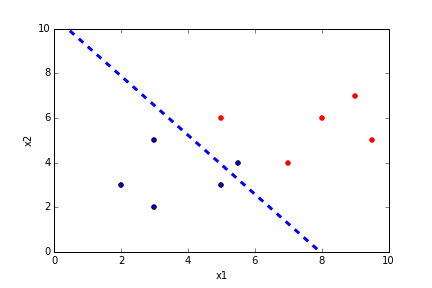
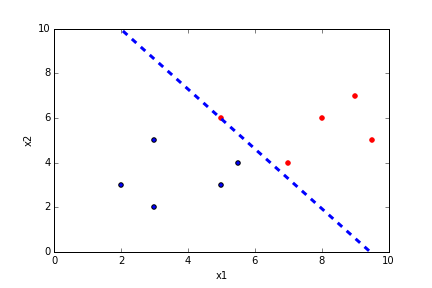
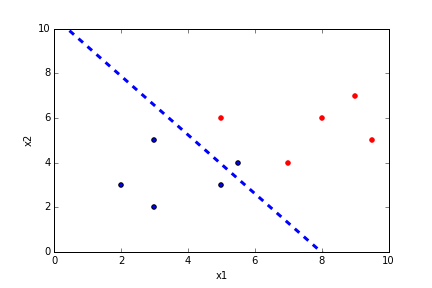
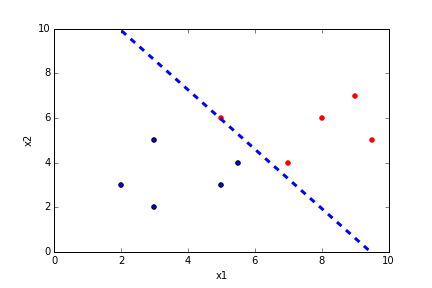
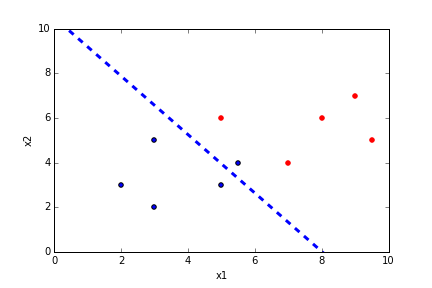
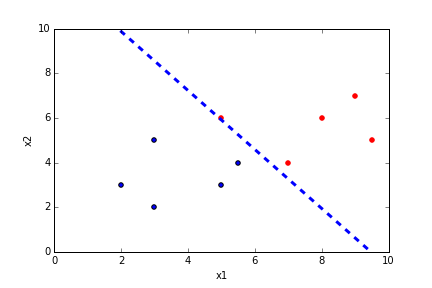
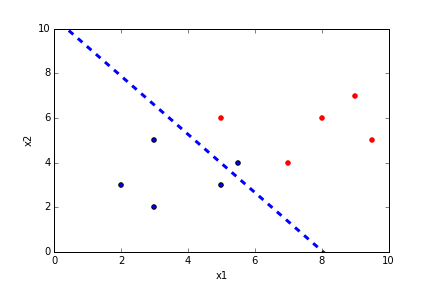
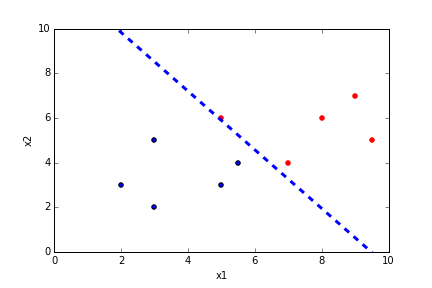
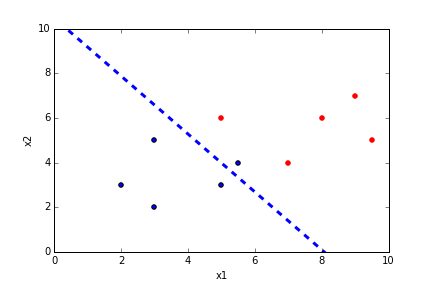
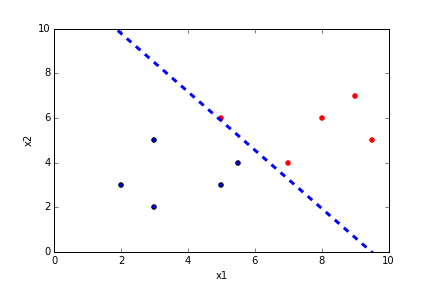
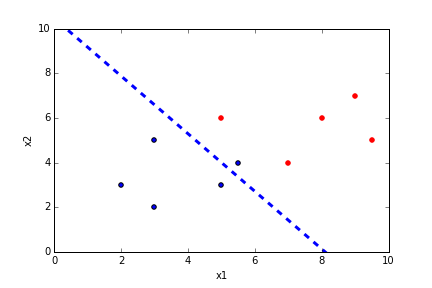
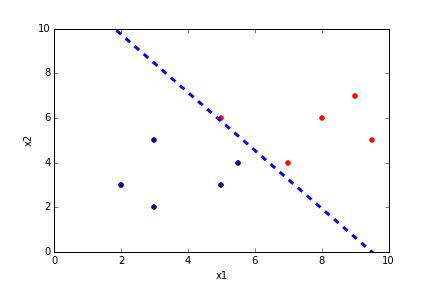
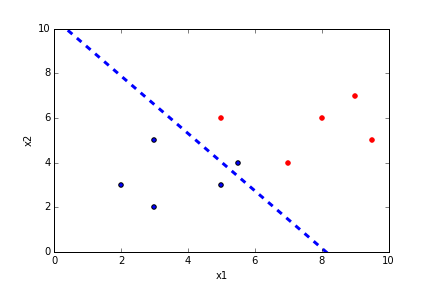
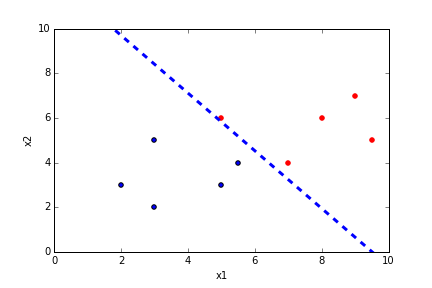
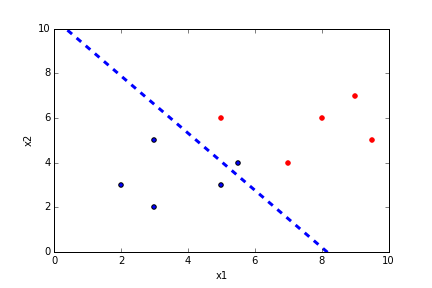
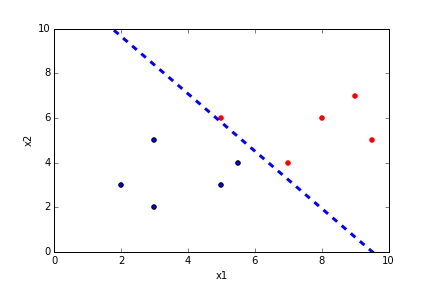
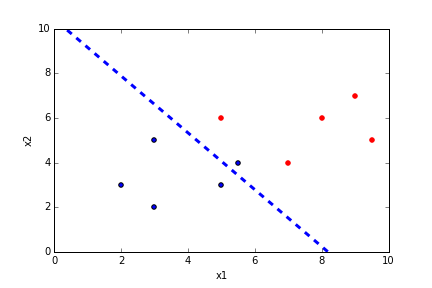
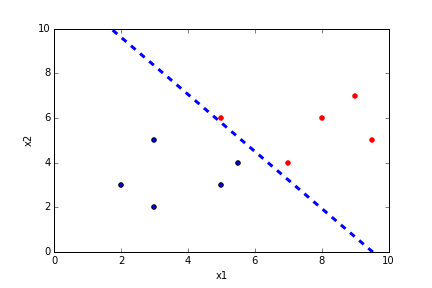
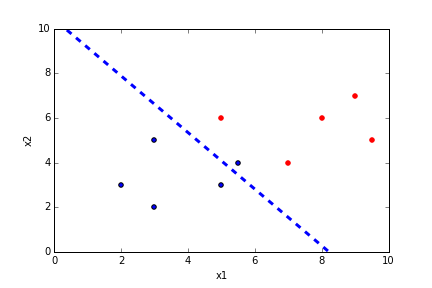
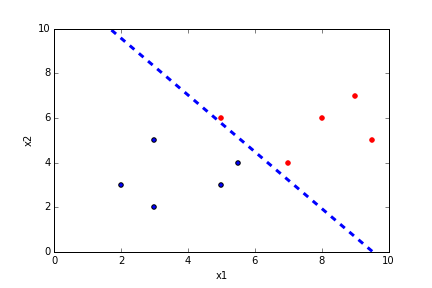
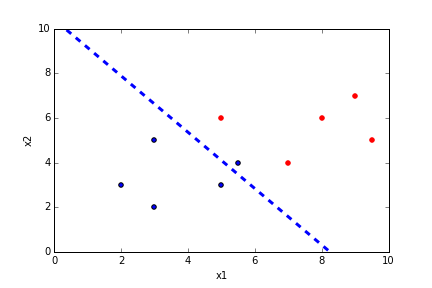
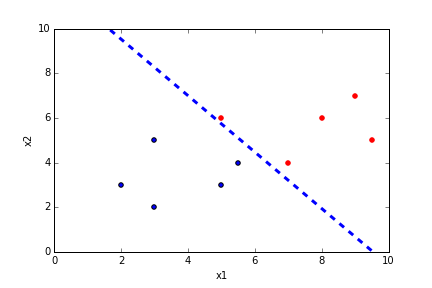
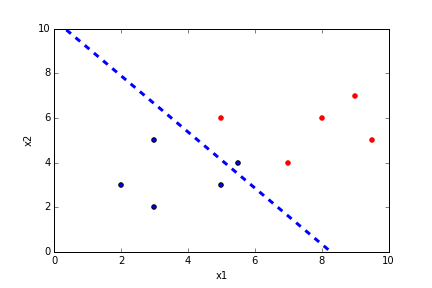
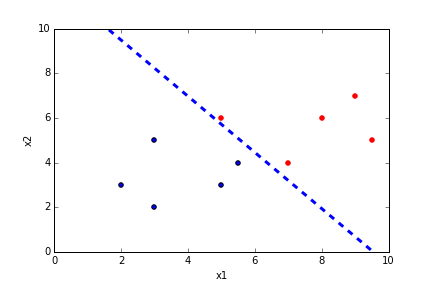
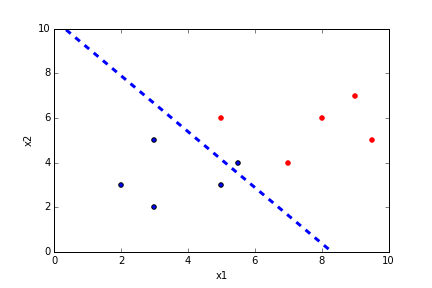
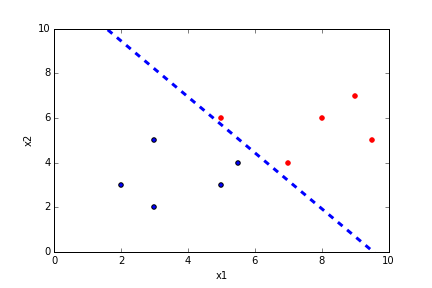
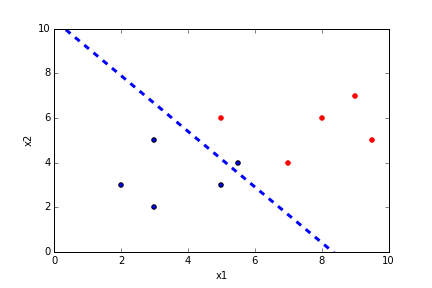
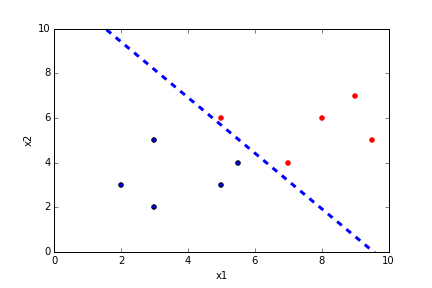
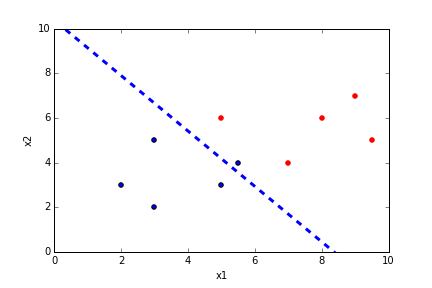
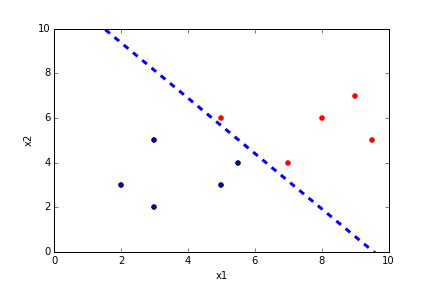
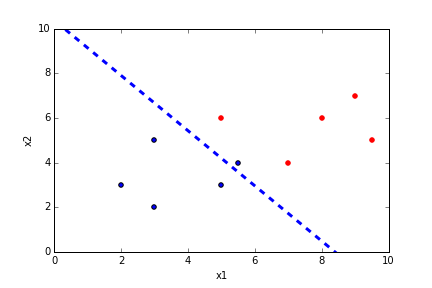
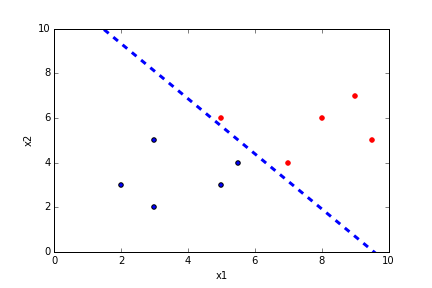
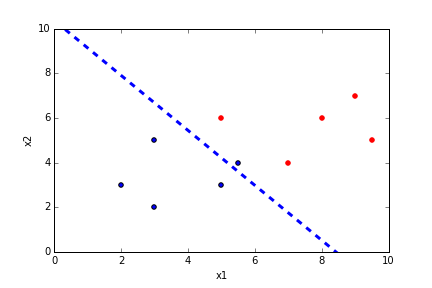
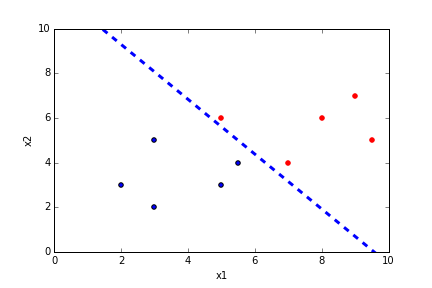
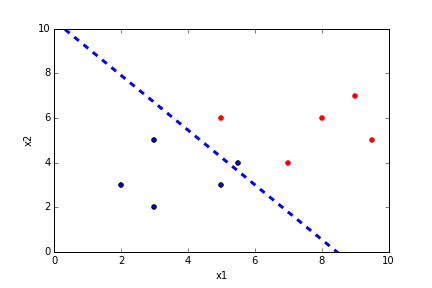
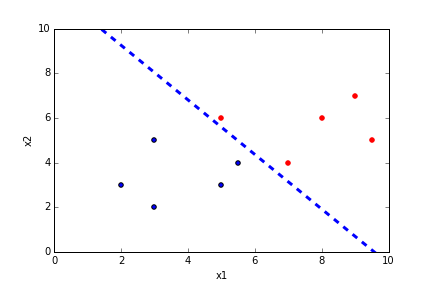
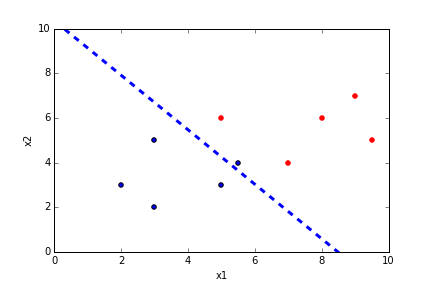
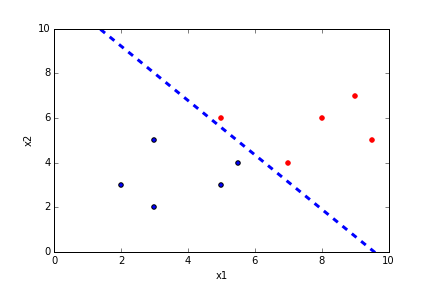
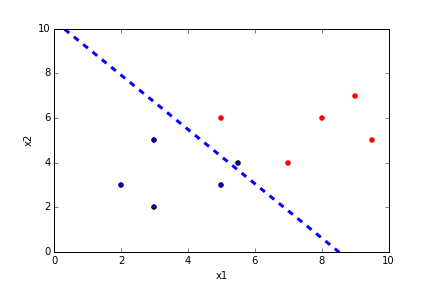
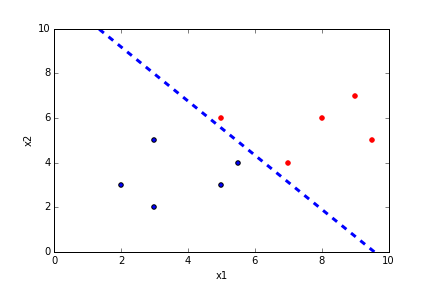
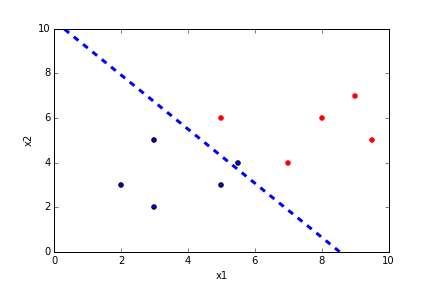
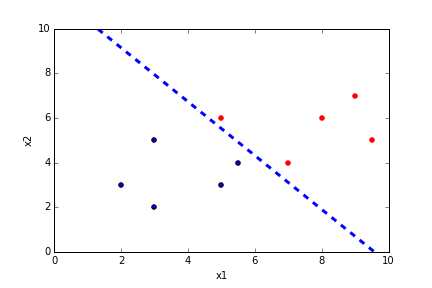
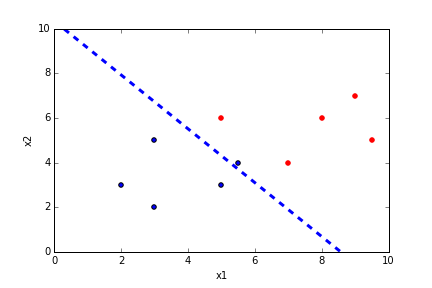
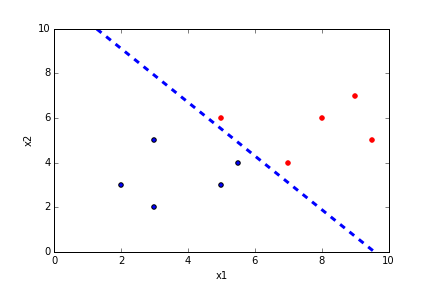
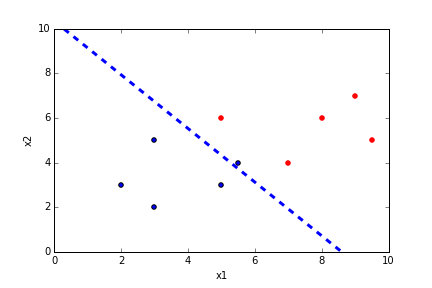
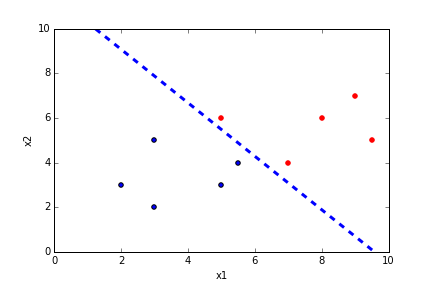
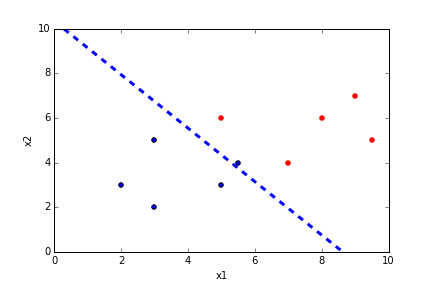
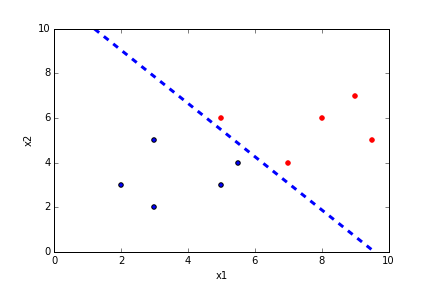
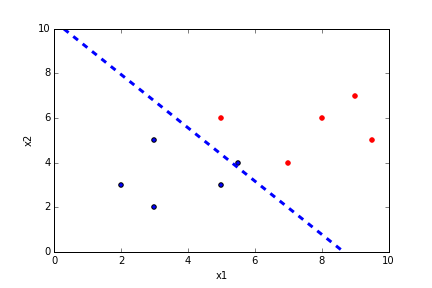
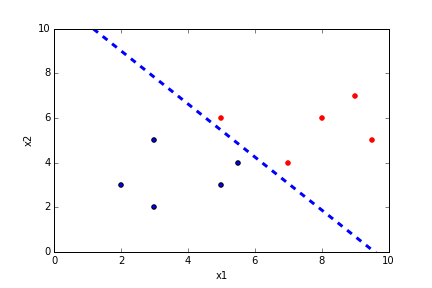
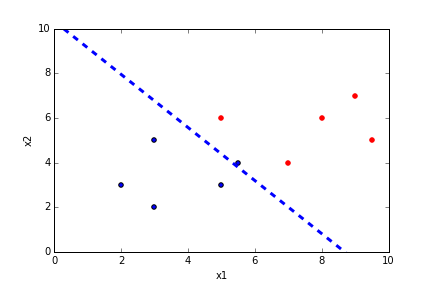
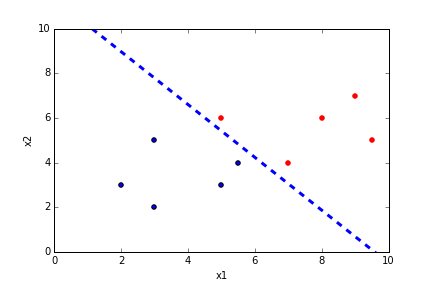
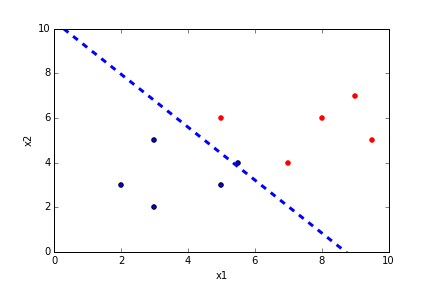
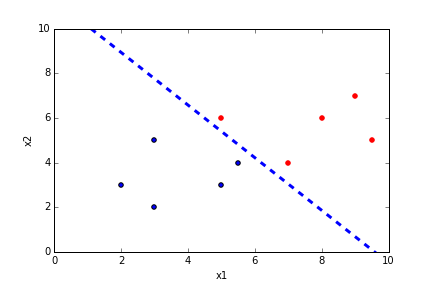
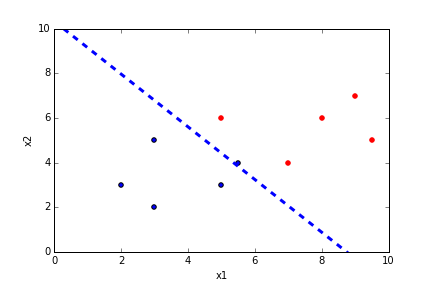
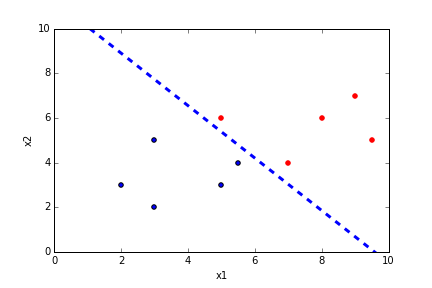
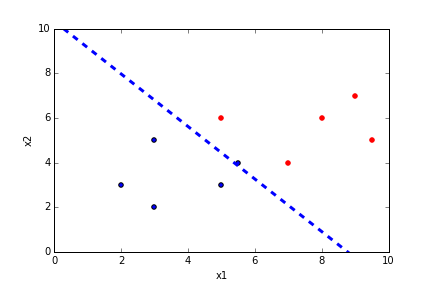
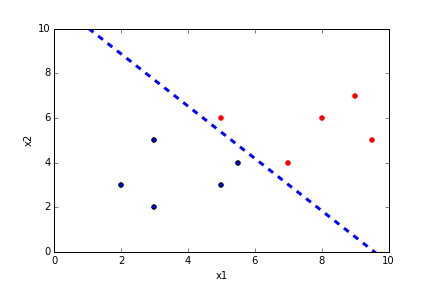
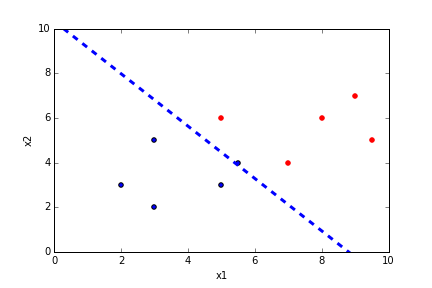
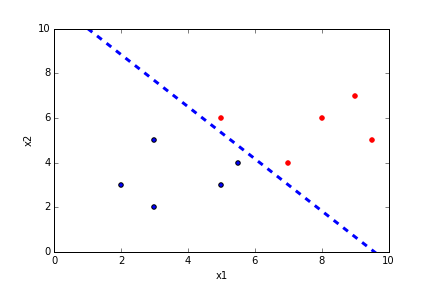
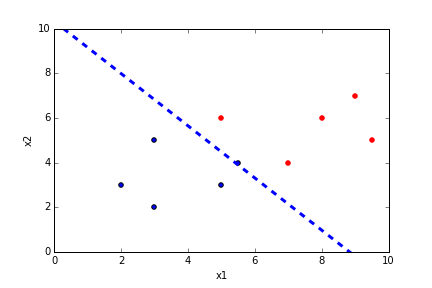
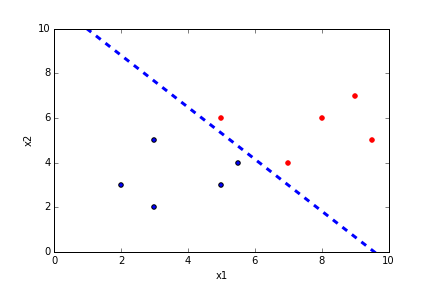
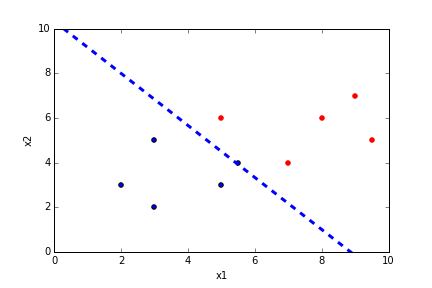
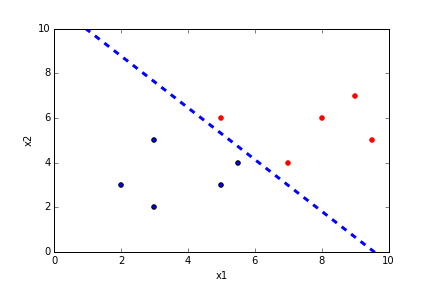
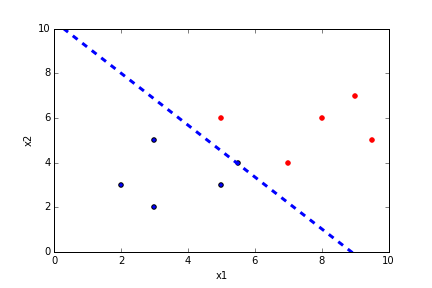
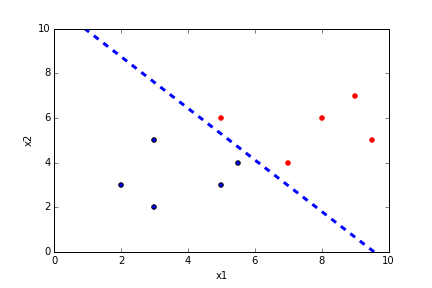
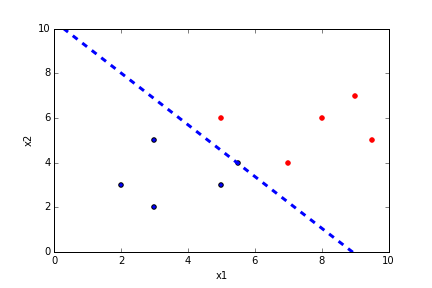
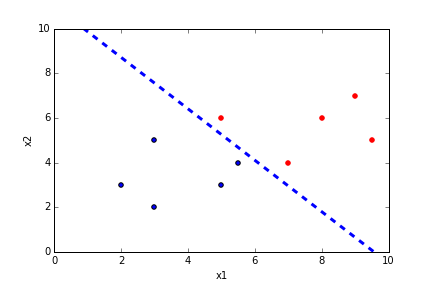
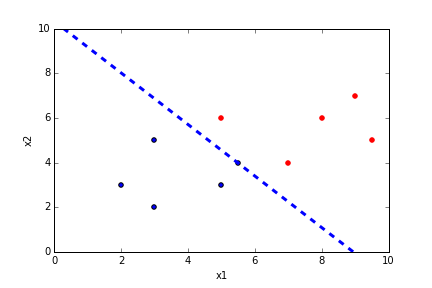
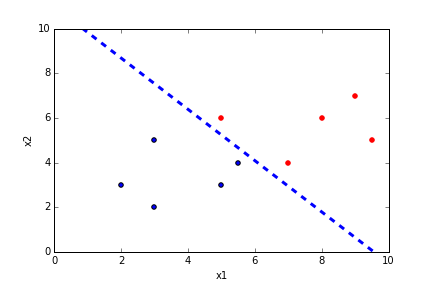
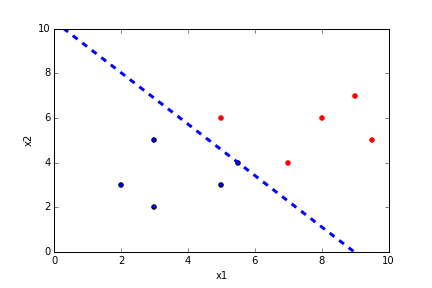
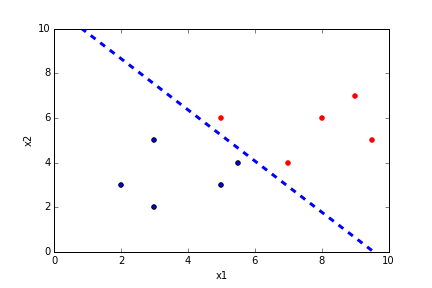
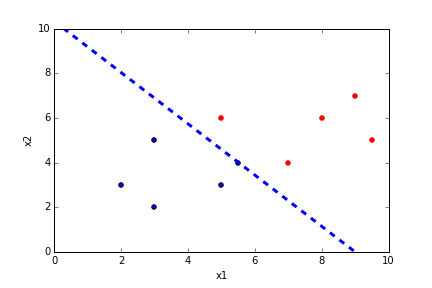
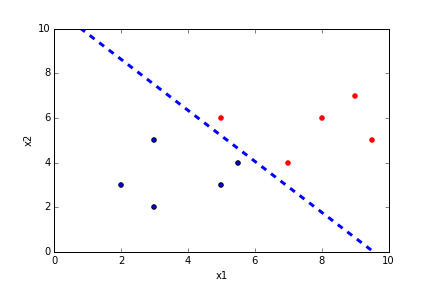
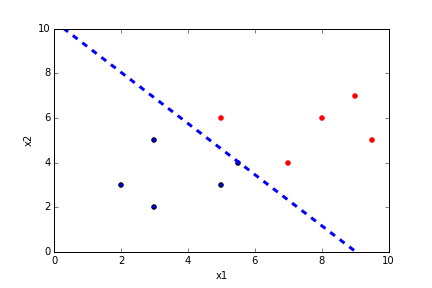
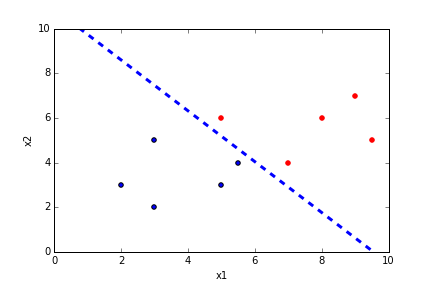
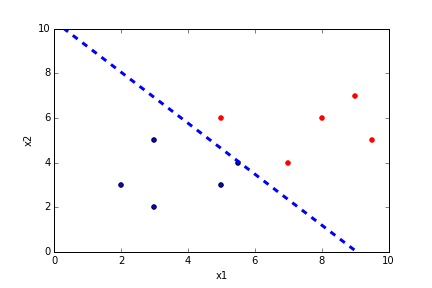
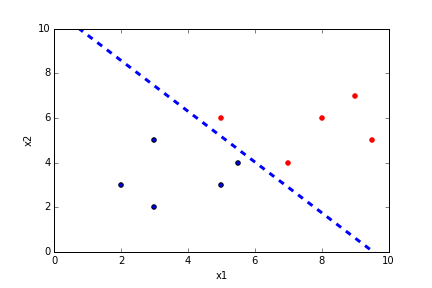
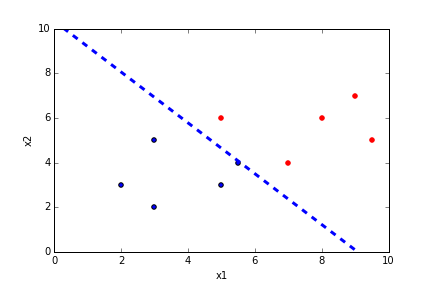
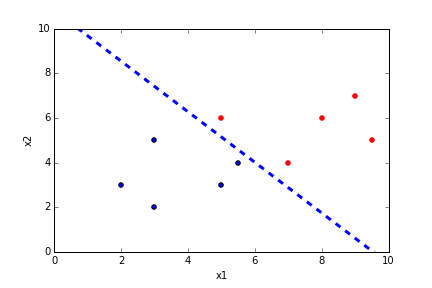
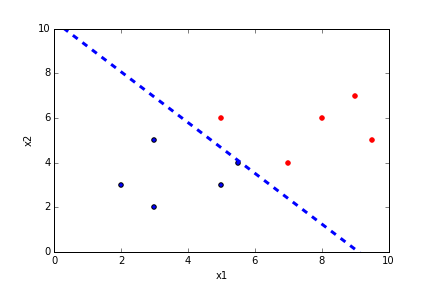
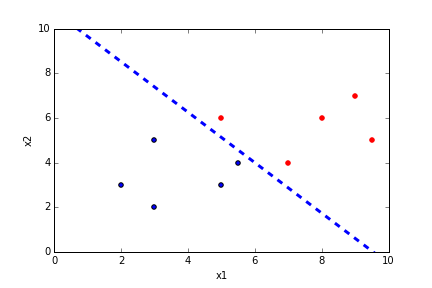
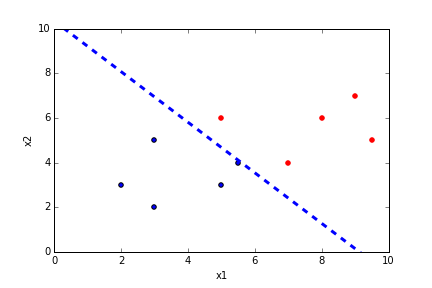
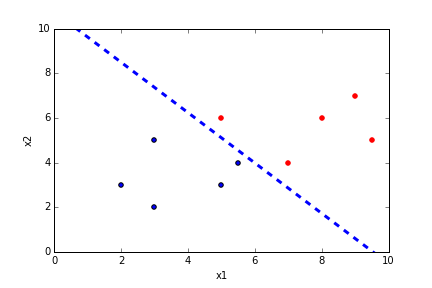
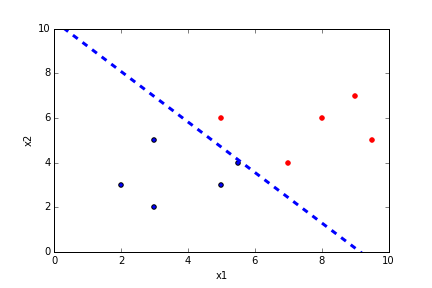
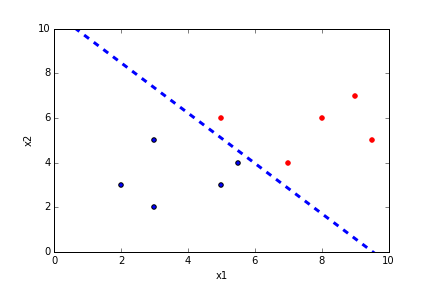
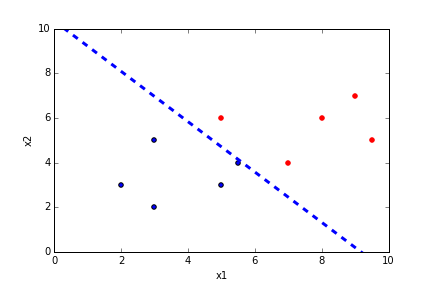
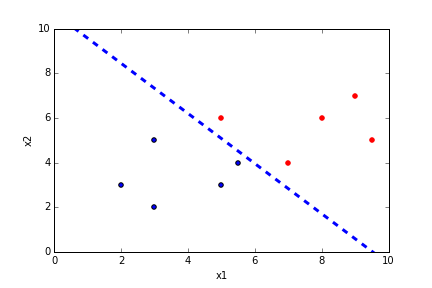
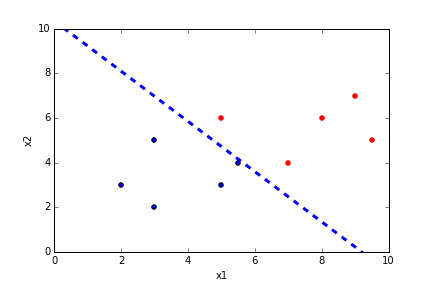
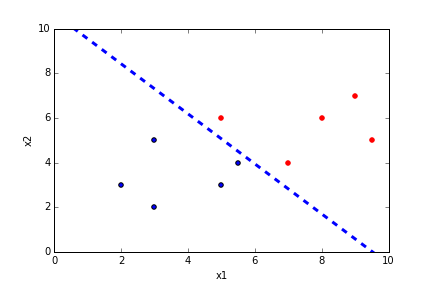
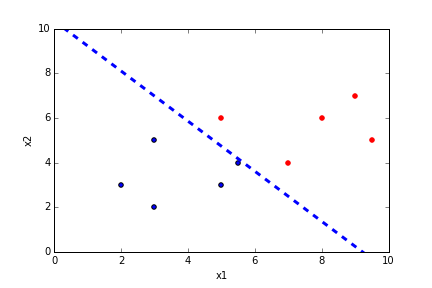
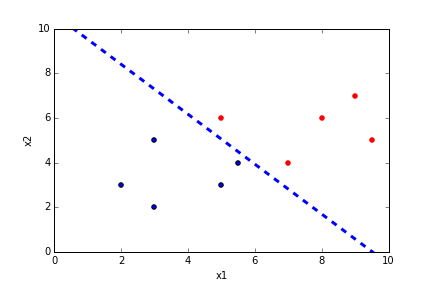
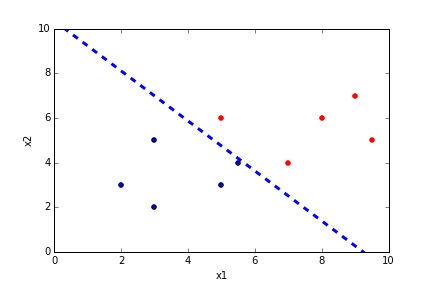
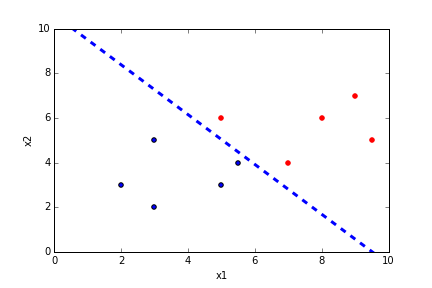
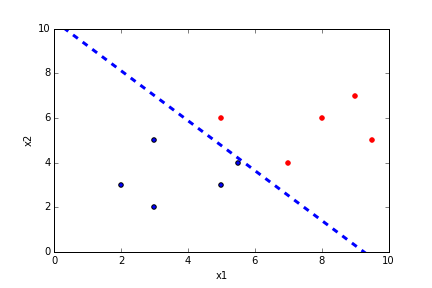
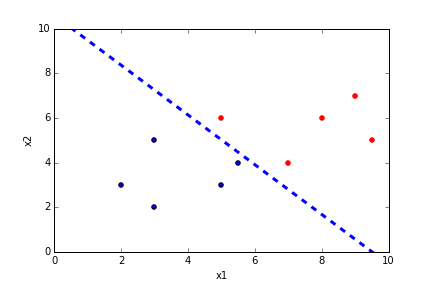
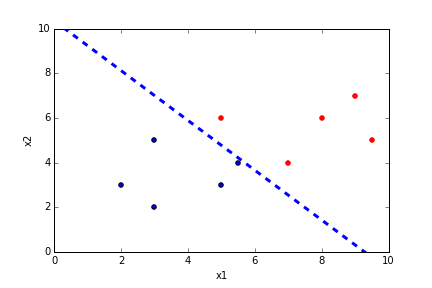
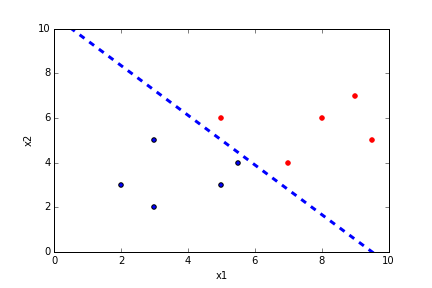
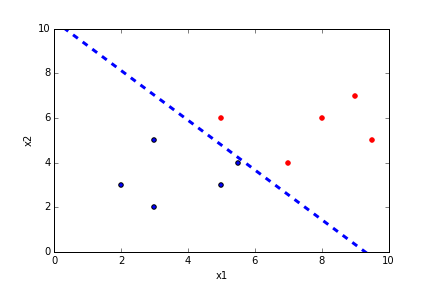
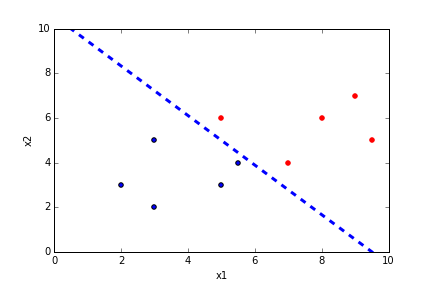
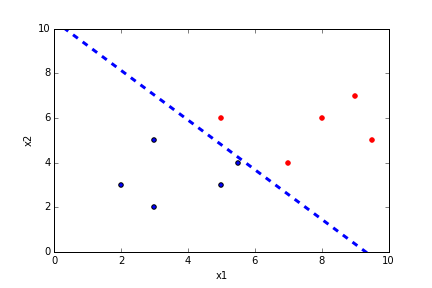
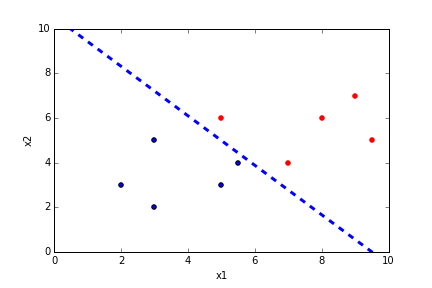
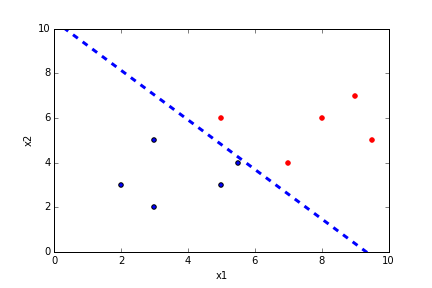
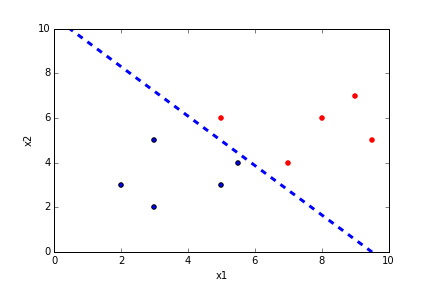
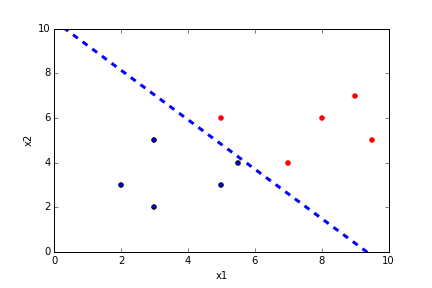
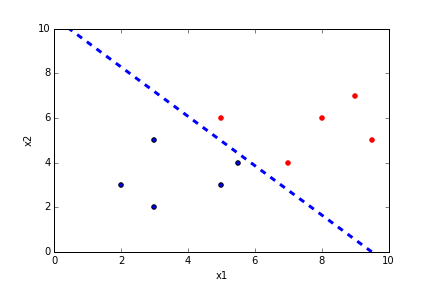
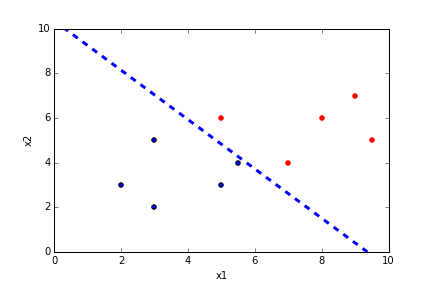
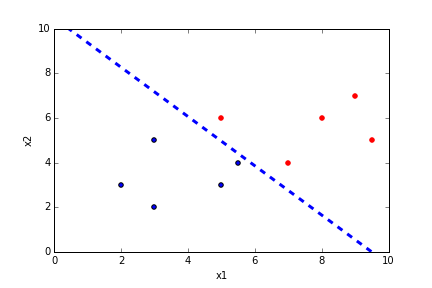
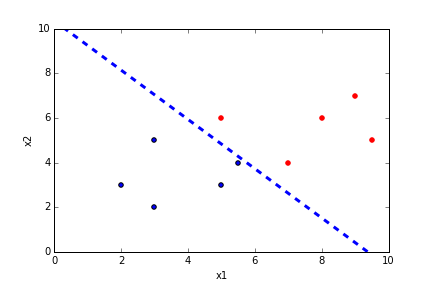
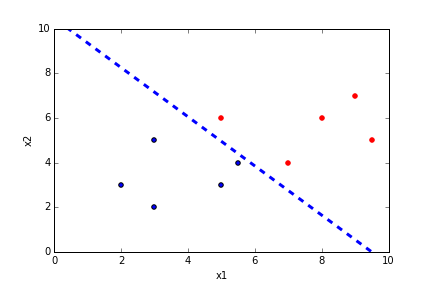
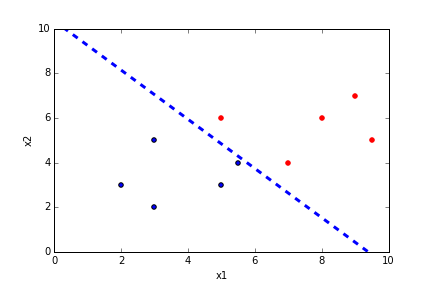
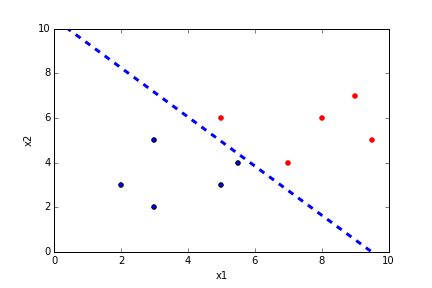
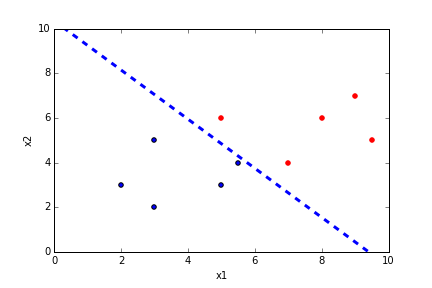
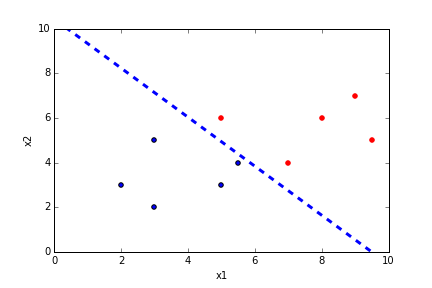
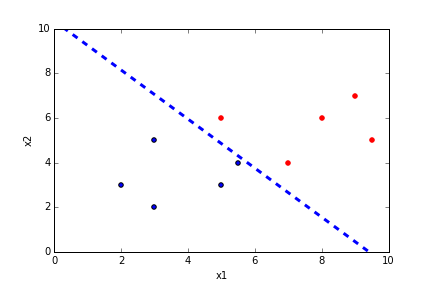
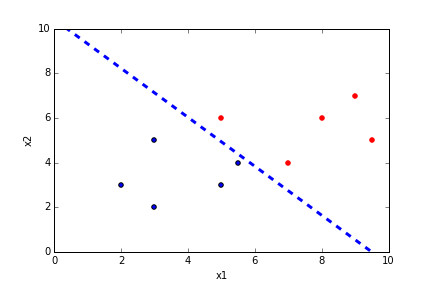
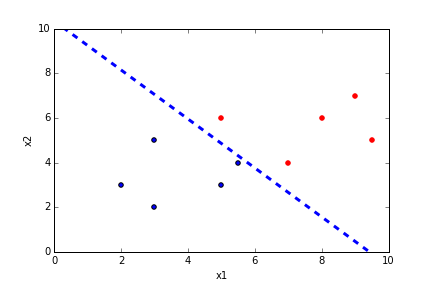
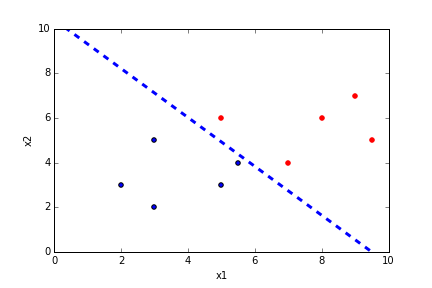
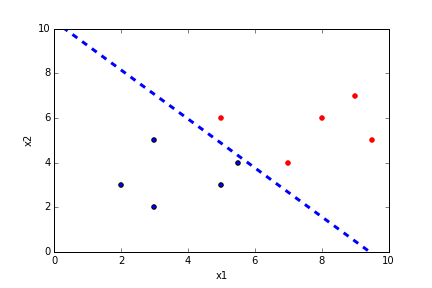
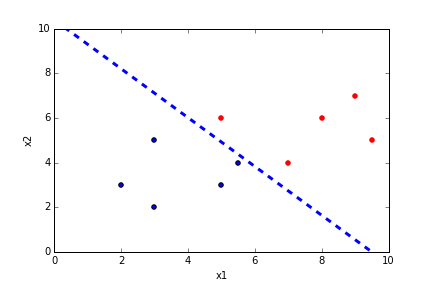
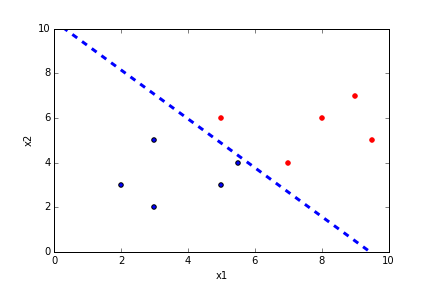
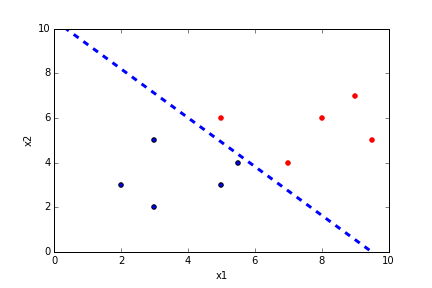
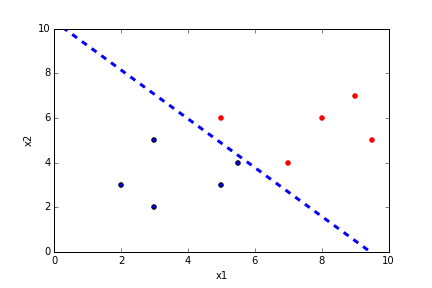
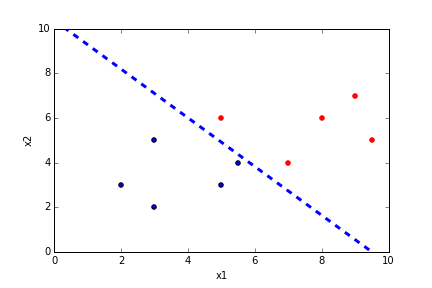
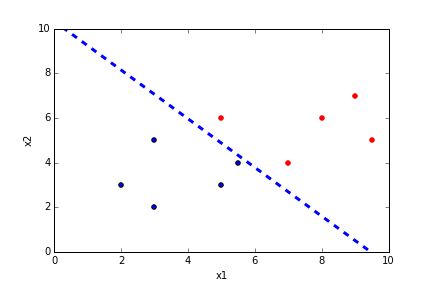
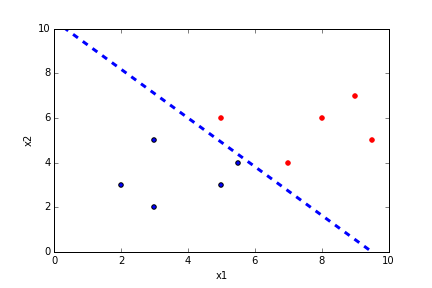
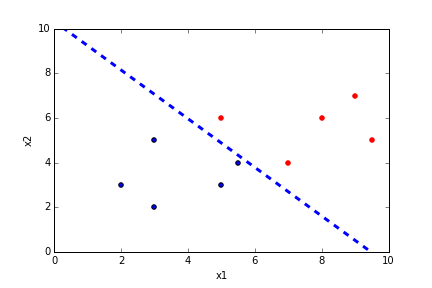
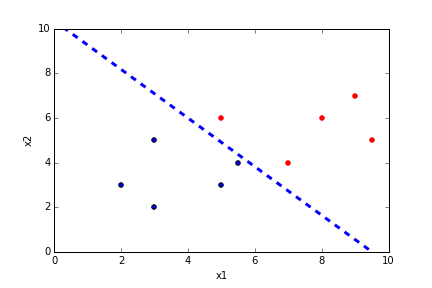
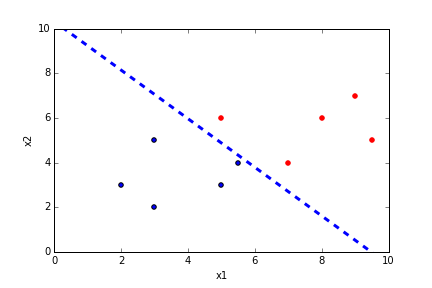
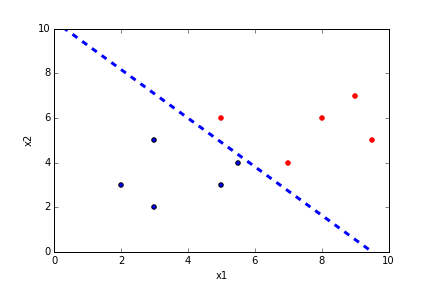
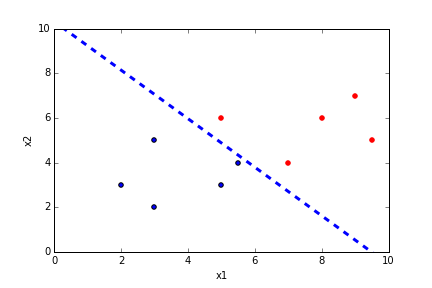

In [6]:
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure()
ax = pyplot.axes(xlim=(0, 10), ylim=(0, 10), xlabel='x1', ylabel='x2')
points, = ax.plot([], [], marker='', linestyle='--', lw=3)

ax.scatter(x[:5,1],x[:5,2]);
ax.scatter(x[5:,1],x[5:,2],color="red");
w = np.array([1.,1.,1.])

niter = 650
eta = 0.1
alpha = 1
def evolve(i):
    global x, w, t, x0, y0
    a = np.dot(x,w)       
    y = sigmoid(a)  
    yp = sigmoid_prime(a)        
    e = (t - y)*yp             
    g = -np.dot(np.transpose(x),e)
    w = w - eta*g
    
    y0 = np.array(plane(w,x0))
    points.set_data(x0,y0)
    return points

anim = animation.FuncAnimation(fig, evolve, frames = niter, interval=10)
display_animation(anim, default_mode='once')





### Overfitting and regularization

If the parameter $\eta$ is set to an appropriate value, the algorithm finds a setting of $w$ which correctly classifies as many of the examples as possible.
If the examples are in fact linearly separable then the neuron finds this linear separation and its weights diverge to ever-larger values as the simulation continues. This is an example of overfitting, where a model fits the data so well that its generalization performance is likely to be adversely affected. In other words, if we add a new data point to our dataset, the new solution may be pretty far from the previous one, with the consequent computational cost.

This behaviour may be viewed as undesirable. How can it be rectified?

An ad hoc solution to overfitting is to use early stopping, that is, use an algorithm originally intended to minimize the error function $G({\bf w})$, then prevent it from doing so by halting the algorithm at some point.
A more principled solution to overfitting makes use of regularization. Regularization involves modifying the objective function in such a way as to incorporate a bias against the sorts of solution ${\bf w}$ which we dislike. In the above example, what we dislike is the development of a very sharp decision boundary; this sharp boundary is associated with large weight values, so we use a regularizer that penalizes large weight values. We modify the objective function to:

$$M ({\bf w}) = G({\bf w}) + \alpha E_W (\bf{w}),$$ 

where the simplest choice of regularizer is the weight decay regularizer

$$E_W ({\bf w}) = \frac{1}{2}\sum_i   w_i^2.$$

The regularization constant $\alpha$ is called the weight decay rate. This additional term favours small values of ${\bf w}$ and decreases the tendency of a model to overfit fine details of the training data. The quantity $\alpha$ is known as a hyperparameter. Hyperparameters play a role in the learning algorithm but play no role in the activity rule of the network.





### Momentum
Further proposals include the momentum method. Gradient descent with momentum remembers the update $\Delta w$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update:


$$ w:=w-\eta \nabla E(w)+\alpha \Delta w$$
where the parameter $w$ which minimizes $E(w)$ is to be estimated, and $\eta$ is the learning rate.

The name momentum stems from an analogy to momentum in physics: the weight vector $w$, thought of as a particle traveling through parameter space, incurs acceleration from the gradient of the loss ("force"). Unlike in classical gradient descent, it tends to keep traveling in the same direction, preventing oscillations. 

### Other cost functions

Notice that any function that has a minimum at the same values of ${\bf w}$ could equally be considered a cost function. Particular attentiono has received the following one:

$$E({\bf w}) = -\sum_{n=1}^N t^{(n)} \ln{y({\bf x}^{(n)}; {\bf w})} + (1 − t^{(n)}) \ln{(1 − y({\bf x}^{(n)}; {\bf w})}) $$

Same as before, the objective function is bounded below by zero and only attains this value if $y({\bf x}^{(n)}; {\bf w}) = t^{(n)}$ for all $n$.
We now differentiate this objective function with respect to $\bf{w}$:

$$ e_j^{(n)} = \frac{\partial E}{\partial w_j} = −\sum_{n=1}^N (t^{(n)} − y^{(n)})x^{(n)}$$

Notice that the main difference is that the derivatives of $y$ do not appear. This makes it very appealing numerically since it has less computational cost.

This function has a interpretation in terms of information theory and entropy. However, we'll leave it there for now without digging too much.

### Challenge 14.1

Modify the previous code to train a single neuron by removing the derivative of the sigmoid function and compare results.